<a href="https://colab.research.google.com/github/Agustinsrivero/CursoCoder/blob/main/PreEntrega_Rivero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicción de ganancias de una distribuidora y cómo aumentarlas

## Abstract

**¿Cómo predecir las ganancias de un negocio?¿Qué factores son los más influyentes?**

Estas son algunas de las preguntas que motivaron a la realización de este proyecto.  
En el entorno empresarial actual, la capacidad de predecir las ganancias es fundamental para la toma de decisiones estratégicas y financieras. En este proyecto, se propone desarrollar un modelo de predicción de ganancias utilizando técnicas de aprendizaje automático. El objetivo principal es proporcionar a la empresa una herramienta precisa y confiable que le permita estimar las ganancias futuras en base a datos históricos y variables relevantes.  
En este caso la empresa para la que se llevará a cabo este análisis es una gran distribuidora de insumos de oficina en Estados Unidos.

***Motivación***. La razón para realizar este proyecto fue la de poder contribuir a una gran empresa para obtener información útil, que contribuya a la toma de decisiones y se vea reflejado en las ganancias de la misma.

***Audiencia***. Si bien el proyecto fue llevado a cabo con los datos de una distribuidora de insumos de oficina, los procesos pueden ser perfectamente adaptados a cualquier modelo de negocio. Por ende, este proyecto puede ser de interés para cualquier persona con ánimos de observar como se predicen ganancias de un negocio y cómo se obtiene información a partir de un análisis extenso de los datos.

***Problema Comercial***. La tarea consiste en crear un modelo de regresión para determinar las ganancias del año sguiente y, ya con esta información, poder detectar qué variables habría que buscar aumentar o evitar.

***Contexto Analítico***. Se proporciona un archivo CSV llamado "Sample - Superstore" (almacenado en la carpeta de datos ya creada) que contiene datos entre los años 2014 y 2017 sobre la cantidad de pedidos realizados, qué productos están involucrados en esos pedidos, los clientes con su respectiva ubicación, etc.  
Se realizarán las siguientes tareas con los datos:  
1. Leer, transformar y preparar los datos del archivo CSV para su visualización.
2. Realizar análisis y construir visualizaciones de los datos para encontrar insights en el conjunto de datos.
3. Crear un modelo de regresión.
4. Determinar las variables más y menos influyentes. 

## Preguntas a Responder

### ¿Cuáles serían las ganancias del año siguiente? ¿Cuánto más o menos se ganaría en comparación con este último año?  

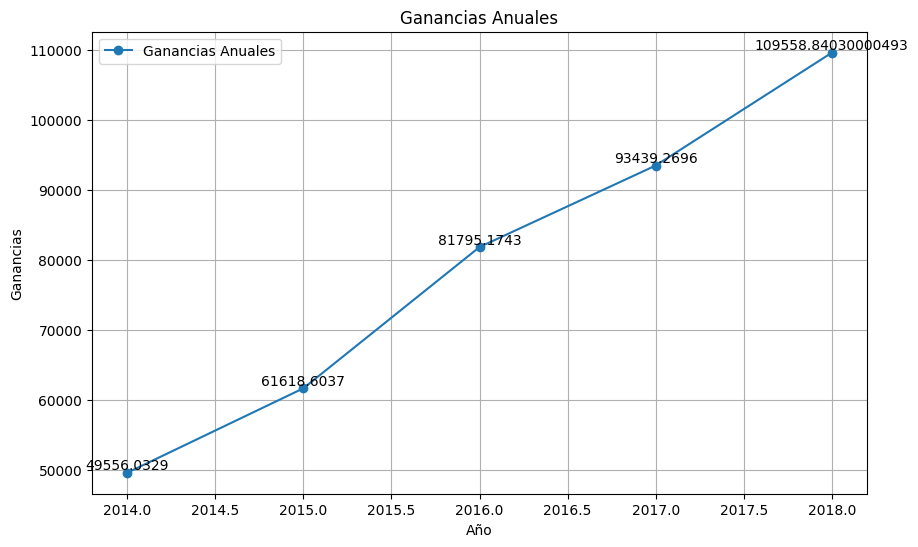

Como se observa en la gráfica, de acuerdo a la predicción realizada, en el año 2018 se ganarán $109558 aproximadamente. 


El valor predicho representa un incremento de $16119 respecto al año anterior.

### ¿Cuáles son las variables que más afectan a la hora de obtener las ganancias?

El dataset fue dividido en tres partes, de las cuáles dos de estas fueron trabajadas para comprender de qué variables depende la obtención de las ganancias.

La primera parte denominada "General" contiene aquellos datos que no tienen valores atípicos, es decir, comprende aquellas ventas regulares sin nada extraño. En este grupo las variables que mayor importancia tienen a la hora de determinar las ganancias mensuales son las siguientes:

---
**Feature - Importance**   
             Sales  -  0.650897  
    Sales Quantity  -  0.122227  
   Sub-Category  -  0.077885  
  Product Quantity  -  0.076402  
          Discount -   0.033294  
       Category  -  0.023146  
         Region  -  0.016148

---



La segunda parte llamada "Outliers" contiene aquellas ventas que generaron ventas con ganancias atípicas, es decir aquellas de las que se obtuvo un rédito económico superior al resto. Las variables que más influyeron a la hora de determinar las ganancias mensuales son las siguientes:

---
**Feature - Importance**   
Sales -               0.7387  
Discount -           (-0.0129)  
Sub-Category ft  - (-0.0071)  
Region ft   -        (-0.0052)  
Product Quantity  -  (-0.0151)  
Sales Quantity   -    0.0102  

---
Cabe destacar que las variables que tienen una importancia mayor son las que mayor contribución hicieron para que el algoritmo entienda el modelo de datos para ambos casos. 

### ¿Se generan pérdidas?

Como se explicó anteriormente, el dataset fue separado en tres grupos, el tercero de estos contiene aquellas ventas que generan un "Profit" negativo, es decir que generan pérdidas, este grupo se denominó como "Pérdidas". Por ende sí que hay ventas que están generando pérdidas. 

### ¿Cuáles son las variables que más afectan a la hora de producir pérdidas?

De acuerdo al análisis realizado sobre el conjunto de datos llamado "Pérdidas", estas son las variables más influyentes al momento de obtener pérdidas de las ventas:

---
**Feature - Importance**   
Sales  -  0.666426  
Discount -  0.333574  

---
Cabe destacar que las variables que tienen una importancia mayor son las que mayor contribución hicieron para que el algoritmo entienda el modelo de datos. 

## Análisis Exploratorio de los Datos (EDA)

### Preparación de Datos

In [ ]:
#Importación de Librerías
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime 
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from google.colab.data_table import DataTable
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import (LinearRegression, HuberRegressor,
                              	  RANSACRegressor, TheilSenRegressor)
from sklearn.feature_selection import SequentialFeatureSelector as SFS

In [ ]:
#Lectura de Dataset
url = 'https://raw.githubusercontent.com/Agustinsrivero/CursoCoder/main/Sample%20-%20Superstore.csv'
df = pd.read_csv(url, encoding="windows-1252", index_col=0)
df.head()

Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
Row ID                                                                       
1       CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
3       CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
4       US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
5       US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

          Customer Name    Segment        Country             City  \
Row ID                                                               
1           Claire Gute   Consumer  United States        Henderson   
2           Claire Gute   Consumer  United States        Henderson   
3       Darrin Van Huff  Corporate  United States      Los Angeles   
4        Sean O'Donnell   Consumer  United States  Fort Lauderdale   
5        Sean O'Donnell   Consumer  United States  Fort Lauderdale   

             State  Postal Code Region       Product ID         Category  \
Row ID                                                                     
1         Kentucky        42420  South  FUR-BO-10001798        Furniture   
2         Kentucky        42420  South  FUR-CH-10000454        Furniture   
3       California        90036   West  OFF-LA-10000240  Office Supplies   
4          Florida        33311  South  FUR-TA-10000577        Furniture   
5          Florida        33311  South  OFF-ST-10000760  Office Supplies   

       Sub-Category                                       Product Name  \
Row ID                                                                   
1         Bookcases                  Bush Somerset Collection Bookcase   
2            Chairs  Hon Deluxe Fabric Upholstered Stacking Chairs,...   
3            Labels  Self-Adhesive Address Labels for Typewriters b...   
4            Tables      Bretford CR4500 Series Slim Rectangular Table   
5           Storage                     Eldon Fold 'N Roll Cart System   

           Sales  Quantity  Discount    Profit  
Row ID                                          
1       261.9600         2      0.00   41.9136  
2       731.9400         3      0.00  219.5820  
3        14.6200         2      0.00    6.8714  
4       957.5775         5      0.45 -383.0310  
5        22.3680         2      0.20    2.5164

**Features del conjunto de datos**
- **Row ID** => ID único para cada fila.
- **Order ID** => ID de pedido único para cada cliente.
- **Order Date** => Fecha de pedido del producto.
- **Ship Date** => Fecha de envío del producto.
- **Ship Mode** => Modo de envío especificado por el cliente.
- **Customer ID** => ID único para identificar a cada Cliente.
- **Customer Name** => Nombre del Cliente.
- **Segment** => Segmento al que pertenece el cliente.
- **Country** => País de residencia del Cliente.
- **City** => Ciudad de residencia del cliente.
- **State** => Estado de residencia del cliente.
- **Postal Code** => Código postal de cada cliente.
- **Region** => Región a la que pertenece el cliente.
- **Product ID** => ID único del producto.
- **Category** => Categoría del producto solicitado.
- **Sub-Category** => Sub-Categoría del producto solicitado.
- **Product Name** => Nombre del producto.
- **Sales** => Ventas del producto (en dinero).
- **Quantity** => Cantidad del Producto.
- **Discount** => Descuento proporcionado.
- **Profit** => Beneficio/Pérdida obtenido.

### Análisis de Nulos

In [ ]:
#Copia del dataset
df_nul = df

Primero se observa si el dataset contiene algún registro con valor nulo.

In [ ]:
df_nul.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 1 to 9994
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Order Date     9994 non-null   object 
 2   Ship Date      9994 non-null   object 
 3   Ship Mode      9994 non-null   object 
 4   Customer ID    9994 non-null   object 
 5   Customer Name  9994 non-null   object 
 6   Segment        9994 non-null   object 
 7   Country        9994 non-null   object 
 8   City           9994 non-null   object 
 9   State          9994 non-null   object 
 10  Postal Code    9994 non-null   int64  
 11  Region         9994 non-null   object 
 12  Product ID     9994 non-null   object 
 13  Category       9994 non-null   object 
 14  Sub-Category   9994 non-null   object 
 15  Product Name   9994 non-null   object 
 16  Sales          9994 non-null   float64
 17  Quantity       9994 non-null   int64  
 18  Discount

No se observa ningún valor nulo, ahora se hará un nuevo análisis para ver si hay algún valor que carezca de sentido como por ejemplo que **"Quantity"** sea igual a 0.

In [ ]:
df.describe()

Postal Code         Sales     Quantity     Discount       Profit
count   9994.000000   9994.000000  9994.000000  9994.000000  9994.000000
mean   55190.379428    229.858001     3.789574     0.156203    28.656896
std    32063.693350    623.245101     2.225110     0.206452   234.260108
min     1040.000000      0.444000     1.000000     0.000000 -6599.978000
25%    23223.000000     17.280000     2.000000     0.000000     1.728750
50%    56430.500000     54.490000     3.000000     0.200000     8.666500
75%    90008.000000    209.940000     5.000000     0.200000    29.364000
max    99301.000000  22638.480000    14.000000     0.800000  8399.976000

El único valor raro es el registro que contiene la variable **"Profit"** con valor ***-6599.978***. Pareciera ser un outlier, ahora se analizará eso en el siguiente inciso. 

### Análisis de Repetidos

In [ ]:
#Copia del dataset
df_rep = df_nul

Ahora debe corroborarse que no haya registros repetidos.

In [ ]:
#Cantidad de registros duplicados
len(df_rep[df_rep.duplicated()])

1

Se observa que hay un registro repetido, así que se procede a eliminarlo.

In [ ]:
#Eliminación de registros repetidos
df_rep = df_rep.drop_duplicates()

Finalmente, se corrobora que se haya eliminado correctamente.

In [ ]:
#Cantidad de registros duplicados
len(df_rep[df_rep.duplicated()])

0

Ahora el Dataset no contiene ningún registro repetido.

### Análisis gráfico

A continuación se van graficar las variables categóricas más representativas del dataset obtenido con respecto a la variable objetivo que es "Profit", también se hará un conteo de los datos de cada variable. Luego se hará un análisis numérico y se obtendrá una interpretación de estos datos.

In [ ]:
#Copia del Dataframe
df_graf = df_rep

#### Año

##### Gráfico

In [ ]:
#Creación Dataframe con la información deseada
df_graf["Año"] = pd.DatetimeIndex(pd.to_datetime(df_graf['Order Date'])).to_period('Y')

<ipython-input-793-f982d84c1f80>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_graf["Año"] = pd.DatetimeIndex(pd.to_datetime(df_graf['Order Date'])).to_period('Y')


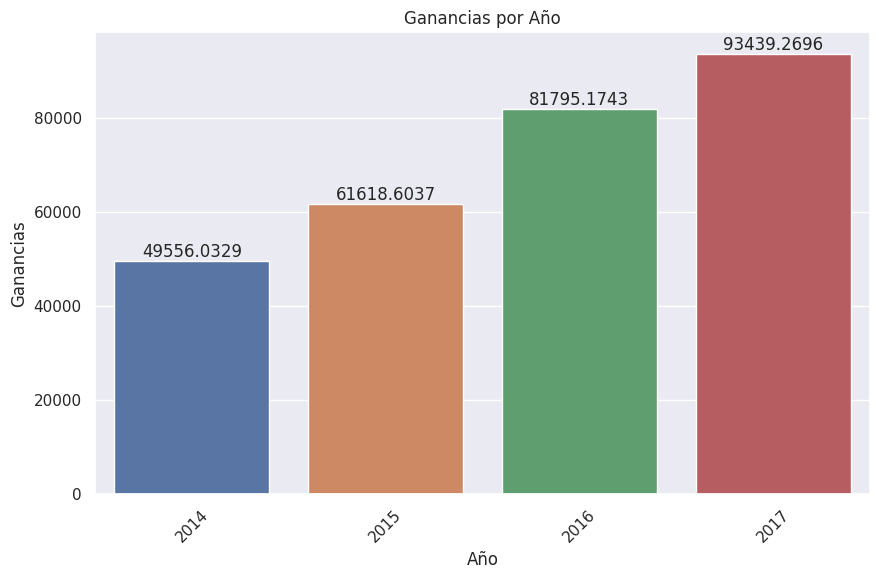

In [ ]:
# Calcular las ganancias por año
ganancias_por_año = df_graf.groupby("Año")["Profit"].sum()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=ganancias_por_año.index, y=ganancias_por_año.values)
ax.set(xlabel='Año', ylabel='Ganancias')
ax.set_title('Ganancias por Año')

# Agregar los valores exactos en cada barra
for i, v in enumerate(ganancias_por_año.values):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Rotar las etiquetas del eje x si es necesario
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

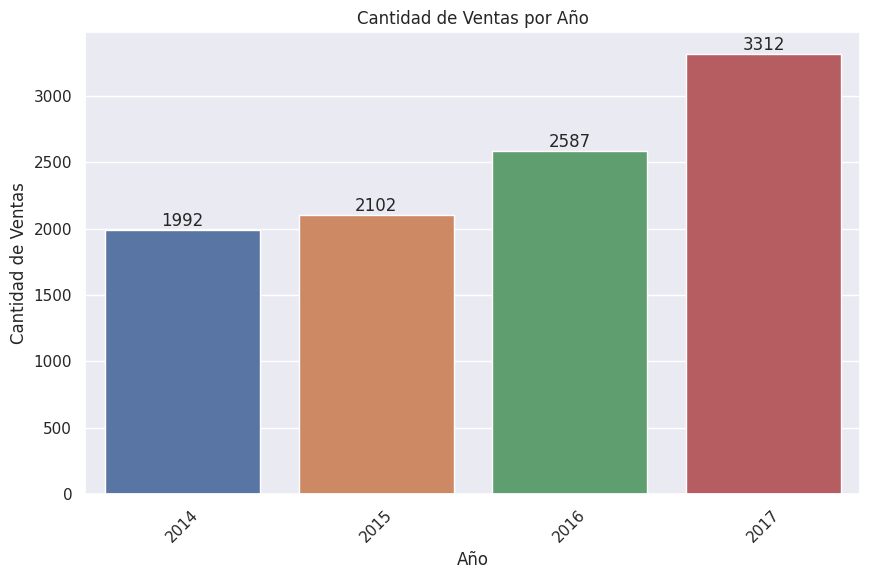

In [ ]:
# Obtener el recuento de ventas por año y ordenar los resultados
conteo_ventas = df_graf["Año"].value_counts().sort_index()

# Graficar el recuento de ventas por año
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=conteo_ventas.index, y=conteo_ventas.values, order=conteo_ventas.index)
ax.set(xlabel='Año', ylabel='Cantidad de Ventas')
ax.set_title('Cantidad de Ventas por Año')

# Mostrar el valor exacto de cada grupo en la gráfica
for i, v in enumerate(conteo_ventas.values):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Rotar las etiquetas del eje x si es necesario
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

##### Análisis Numérico

In [ ]:
#Resumen Numérico
muestra_año = df_graf.groupby('Año')['Profit'].sum()
muestra_año.describe()

count        4.000000
mean     71602.270125
std      19718.519321
min      49556.032900
25%      58602.961000
50%      71706.889000
75%      84706.198125
max      93439.269600
Name: Profit, dtype: float64

##### Insights

* La cantidad de ventas como las ganancias crecieron con el correr de los años de manera progresiva, sobretodo en el último año.

#### Mes

##### Gráfico

In [ ]:
#Creación de la columna "Mes"
df_graf = df_graf.assign(Mes=" ")

In [ ]:
#Asignación a la columna "Mes" correspondiente a cada fila del DataFrame
long = len(df_graf["Order Date"])
ind_col_fecha = df_graf.columns.get_loc("Order Date")
ind_col_mes = df_graf.columns.get_loc("Mes")
for i in range(long):
  fecha_dt = datetime.strptime(df_graf.iloc[i,ind_col_fecha], '%m/%d/%Y')
  df_graf.iloc[i,ind_col_mes] = fecha_dt.month

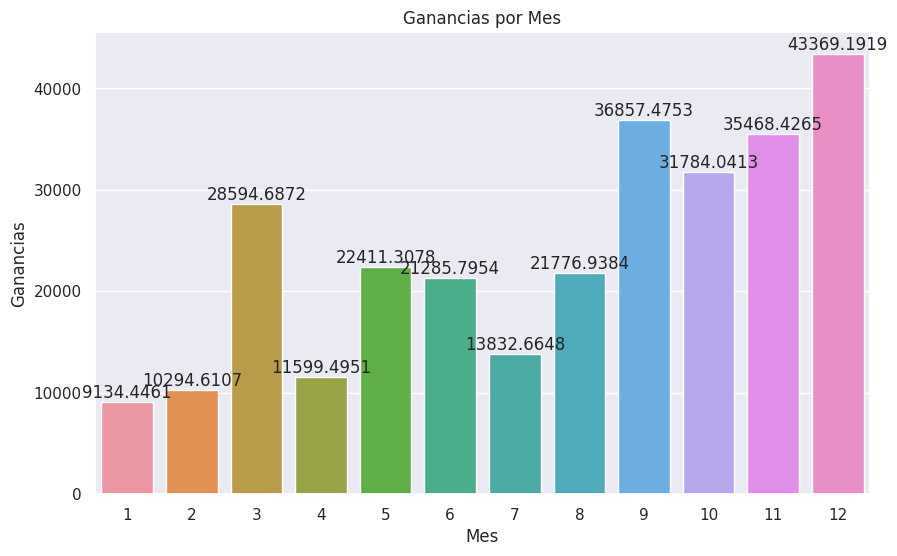

In [ ]:
# Calcular las ganancias por Mes
ganancias_por_mes = df_graf.groupby("Mes")["Profit"].sum()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=ganancias_por_mes.index, y=ganancias_por_mes.values)
ax.set(xlabel='Mes', ylabel='Ganancias')
ax.set_title('Ganancias por Mes')

# Agregar los valores exactos en cada barra
for i, v in enumerate(ganancias_por_mes.values):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Mostrar el gráfico
plt.show()

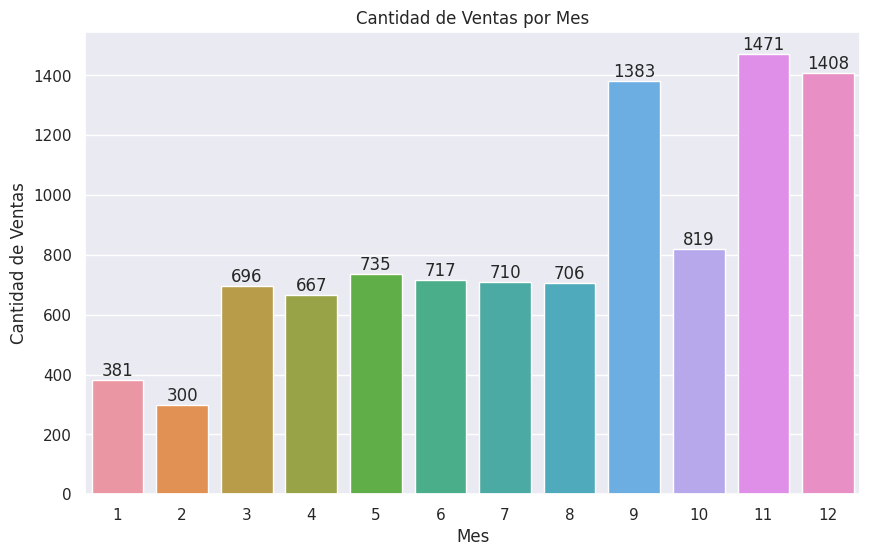

In [ ]:
# Obtener el recuento de ventas por año y ordenar los resultados
conteo_ventas_mes = df_graf["Mes"].value_counts().sort_index()

# Graficar el recuento de ventas por año
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=conteo_ventas_mes.index, y=conteo_ventas_mes.values, order=conteo_ventas_mes.index)
ax.set(xlabel='Mes', ylabel='Cantidad de Ventas')
ax.set_title('Cantidad de Ventas por Mes')

# Mostrar el valor exacto de cada grupo en la gráfica
for i, v in enumerate(conteo_ventas_mes.values):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Mostrar el gráfico
plt.show()

##### Análisis Numérico

In [ ]:
#Resumen Numérico
muestra_mes = df_graf.groupby('Mes')['Profit'].sum().reset_index()
muestra_mes.describe()

Mes        Profit
count  12.000000     12.000000
mean    6.500000  23867.423375
std     3.605551  11418.880183
min     1.000000   9134.446100
25%     3.750000  13274.372375
50%     6.500000  22094.123100
75%     9.250000  32705.137600
max    12.000000  43369.191900

##### Insights

* Los meses en los que mayor cantidad de ventas se generan y, a su vez, mayor cantidad de ganancias se generan son:
** Septiembre
** Noviembre
** Diciembre

* En Marzo y Octubre se observan grandes ganancias en comparación con la cantidad de ventas generadas en esos respectivos meses.

#### Category

##### Gráfico

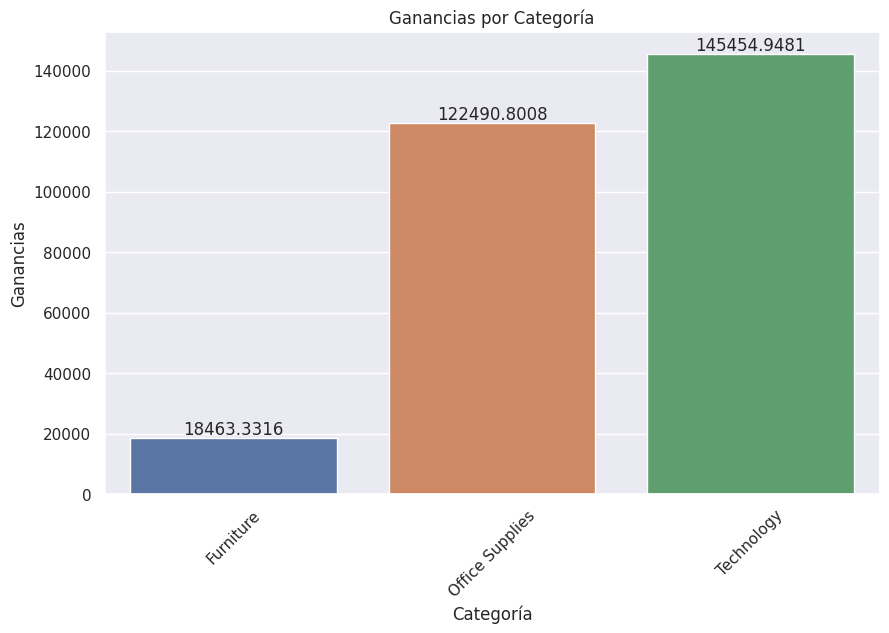

In [ ]:
# Calcular las ganancias por Categoría
ganancias_por_cat = df_graf.groupby("Category")["Profit"].sum()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=ganancias_por_cat.index, y=ganancias_por_cat.values)
ax.set(xlabel='Categoría', ylabel='Ganancias')
ax.set_title('Ganancias por Categoría')

# Agregar los valores exactos en cada barra
for i, v in enumerate(ganancias_por_cat.values):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Rotar las etiquetas del eje x si es necesario
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

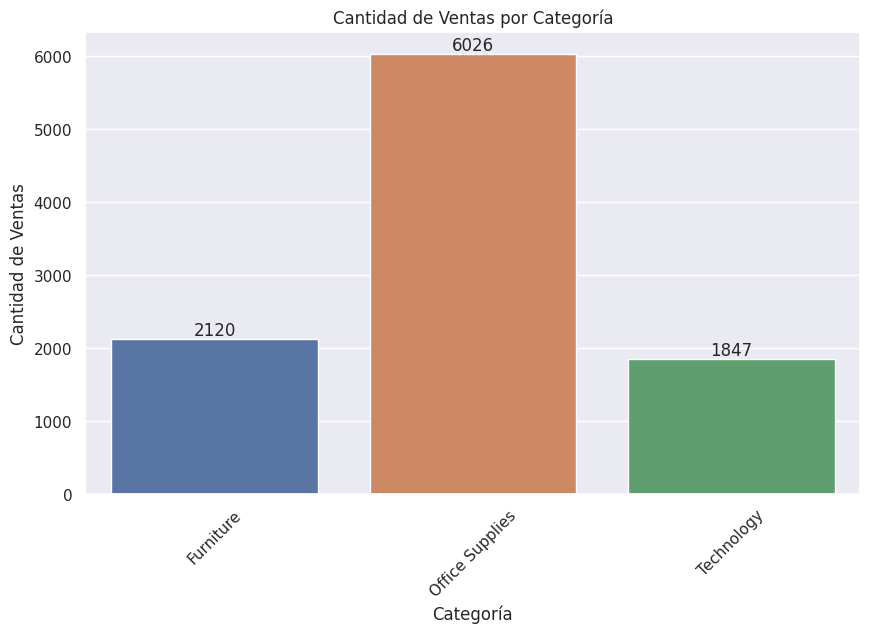

In [ ]:
# Calcular la cantidad de ventas por Categoría
conteo_ventas_por_cat = df_graf["Category"].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=conteo_ventas_por_cat.index, y=conteo_ventas_por_cat.values)
ax.set(xlabel='Categoría', ylabel='Cantidad de Ventas')
ax.set_title('Cantidad de Ventas por Categoría')

# Agregar los valores exactos en cada barra
for i, v in enumerate(conteo_ventas_por_cat.values):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Rotar las etiquetas del eje x si es necesario
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

##### Análisis Numérico

In [ ]:
#Resumen Numérico
muestra_category = df_graf.groupby('Category')['Profit'].sum().reset_index()
muestra_category.describe()

Profit
count       3.000000
mean    95469.693500
std     67670.694138
min     18463.331600
25%     70477.066200
50%    122490.800800
75%    133972.874450
max    145454.948100

##### Insights

* Los productos que más ganancias generan son los que pertenecen a la categoría de "Technology" a pesar de ser los productos menos vendidos. 
* Los productos más vendidos por mucho son los de la categoría "Office Supplies" generando gran porcentaje de las ganancias.
* Los productos de la categoría "Furniture" generan muy pocas ganancias en comparación a la cantidad que se vende. 


#### Sub Category

##### Gráfico

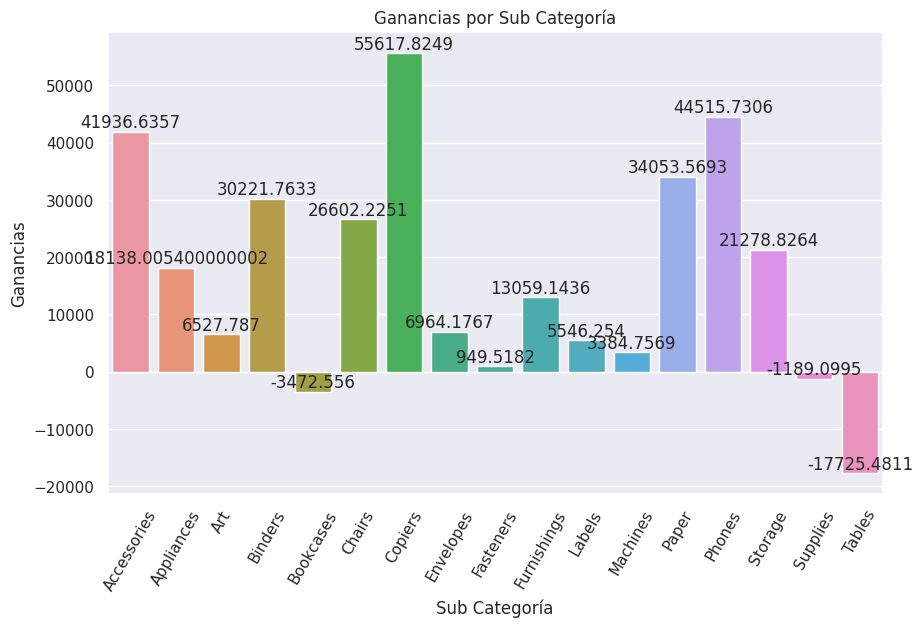

In [ ]:
# Calcular las ganancias por Sub Categoría
ganancias_por_subcat = df_graf.groupby("Sub-Category")["Profit"].sum()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=ganancias_por_subcat.index, y=ganancias_por_subcat.values)
ax.set(xlabel='Sub Categoría', ylabel='Ganancias')
ax.set_title('Ganancias por Sub Categoría')

# Agregar los valores exactos en cada barra
for i, v in enumerate(ganancias_por_subcat.values):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Rotar las etiquetas del eje x si es necesario
plt.xticks(rotation=60)

# Mostrar el gráfico
plt.show()

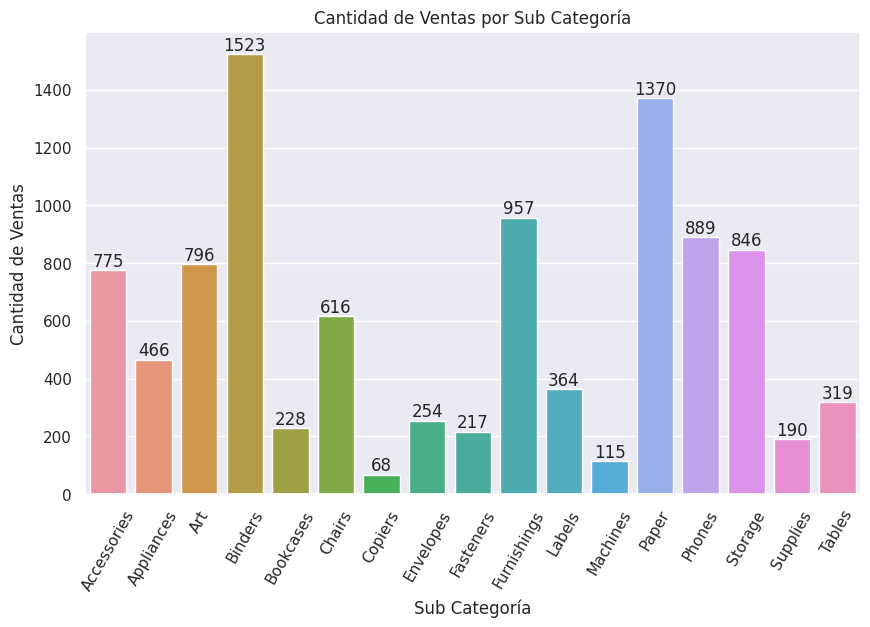

In [ ]:
# Calcular las cantidad de ventas por Sub Categoría
conteo_ventas_por_subcat = df_graf["Sub-Category"].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=conteo_ventas_por_subcat.index, y=conteo_ventas_por_subcat.values)
ax.set(xlabel='Sub Categoría', ylabel='Cantidad de Ventas')
ax.set_title('Cantidad de Ventas por Sub Categoría')

# Agregar los valores exactos en cada barra
for i, v in enumerate(conteo_ventas_por_subcat.values):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Rotar las etiquetas del eje x si es necesario
plt.xticks(rotation=60)

# Mostrar el gráfico
plt.show()

##### Análisis Numérico

In [ ]:
#Resumen Numérico
muestra_scategory = df_graf.groupby('Sub-Category')['Profit'].sum().reset_index()
muestra_scategory.describe()

Profit
count     17.000000
mean   16847.592971
std    19690.198267
min   -17725.481100
25%     3384.756900
50%    13059.143600
75%    30221.763300
max    55617.824900

##### Insights

* Los productos de las Sub Categorías "Copiers", "Accesories" y "Phones" son los que más ganancias generan.
* Se destaca que los productos de la Sub Categoría "Copiers" son lo que menos se venden pero son los que generan mayor cantidad de ganancias.
* Los productos de las Sub Categorías "Tables", "Supplies" y "Bookcases" generan pérdidas estando entre algunas de las menos vendidas.
* Los productos de las Sub Categorías "Binders" y "Paper" son los más vendidos con diferencia aunque no son los que mayor ganancias generan, aunque están entre los más destacados.

#### Ship Mode

##### Gráfico

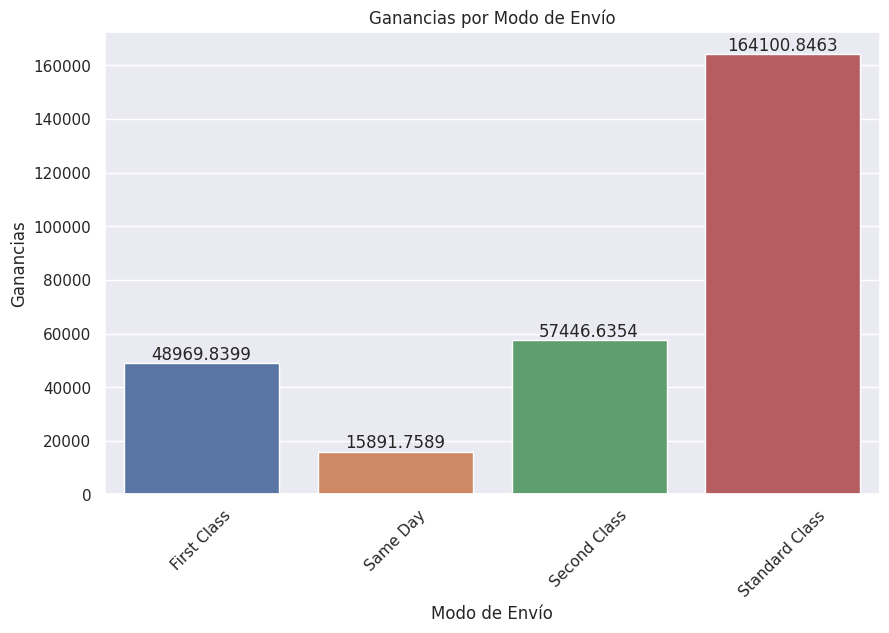

In [ ]:
# Calcular las ganancias por Modo de Envío
ganancias_por_modo = df_graf.groupby("Ship Mode")["Profit"].sum()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=ganancias_por_modo.index, y=ganancias_por_modo.values)
ax.set(xlabel='Modo de Envío', ylabel='Ganancias')
ax.set_title('Ganancias por Modo de Envío')

# Agregar los valores exactos en cada barra
for i, v in enumerate(ganancias_por_modo.values):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Rotar las etiquetas del eje x si es necesario
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

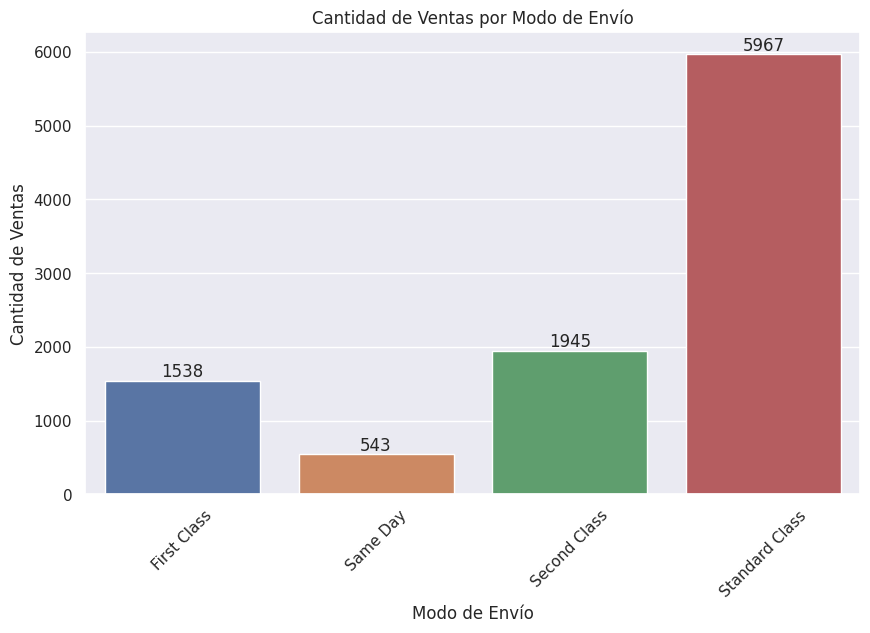

In [ ]:
# Calcular la Cantidad de Ventas por Modo de Envío
conteo_ventas_por_modo = df_graf["Ship Mode"].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=conteo_ventas_por_modo.index, y=conteo_ventas_por_modo.values)
ax.set(xlabel='Modo de Envío', ylabel='Cantidad de Ventas')
ax.set_title('Cantidad de Ventas por Modo de Envío')

# Agregar los valores exactos en cada barra
for i, v in enumerate(conteo_ventas_por_modo.values):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Rotar las etiquetas del eje x si es necesario
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

##### Análisis Numérico

In [ ]:
#Resumen Numérico
muestra_modo = df_graf.groupby('Ship Mode')['Profit'].sum().reset_index()
muestra_modo.describe()

Profit
count       4.000000
mean    71602.270125
std     64219.043250
min     15891.758900
25%     40700.319650
50%     53208.237650
75%     84110.188125
max    164100.846300

##### Insights

* El modo de envío "Standard Class" es el más común y el que más ganancias genera por mucho.

#### Segment

##### Gráfico

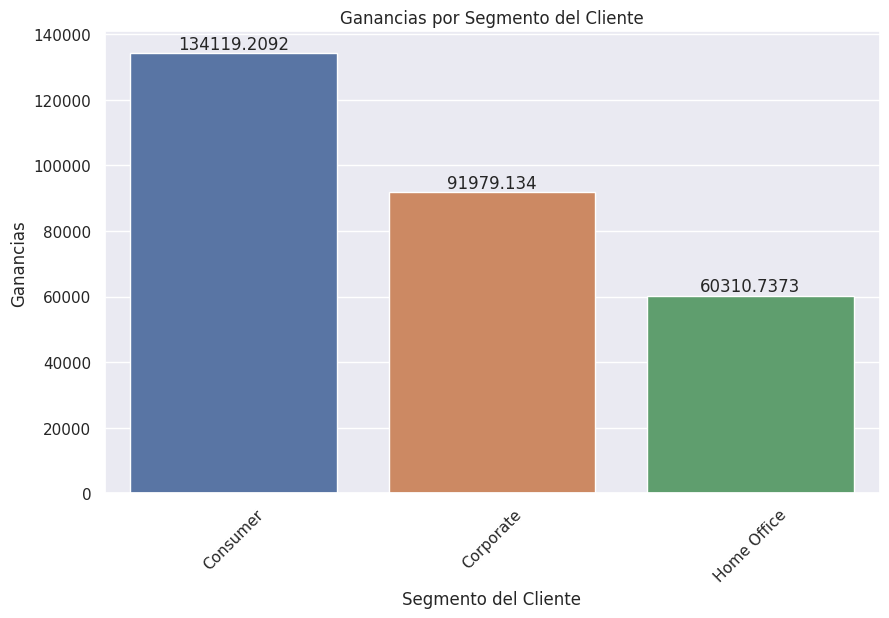

In [ ]:
# Calcular las Ganancias por Segmento del cliente
ganancias_por_seg = df_graf.groupby("Segment")["Profit"].sum()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=ganancias_por_seg.index, y=ganancias_por_seg.values)
ax.set(xlabel='Segmento del Cliente', ylabel='Ganancias')
ax.set_title('Ganancias por Segmento del Cliente')

# Agregar los valores exactos en cada barra
for i, v in enumerate(ganancias_por_seg.values):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Rotar las etiquetas del eje x si es necesario
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

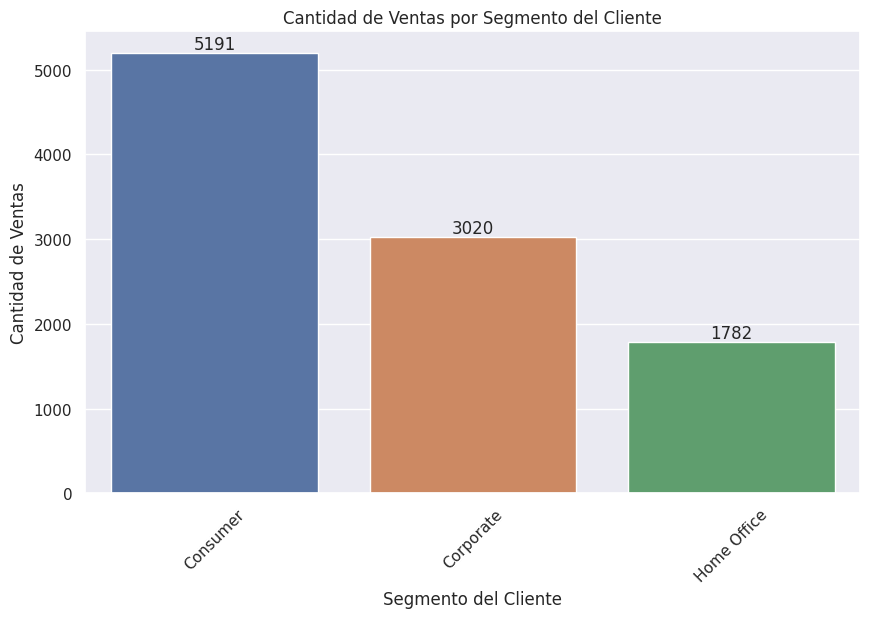

In [ ]:
# Calcular la Cantidad de Ventas por Segmento del cliente
conteo_ventas_por_seg = df_graf["Segment"].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=conteo_ventas_por_seg.index, y=conteo_ventas_por_seg.values)
ax.set(xlabel='Segmento del Cliente', ylabel='Cantidad de Ventas')
ax.set_title('Cantidad de Ventas por Segmento del Cliente')

# Agregar los valores exactos en cada barra
for i, v in enumerate(conteo_ventas_por_seg.values):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Rotar las etiquetas del eje x si es necesario
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

##### Análisis Numérico

In [ ]:
#Resumen Numérico
muestra_segmento = df_graf.groupby('Segment')['Profit'].sum().reset_index()
muestra_segmento.describe()

Profit
count       3.000000
mean    95469.693500
std     37027.835952
min     60310.737300
25%     76144.935650
50%     91979.134000
75%    113049.171600
max    134119.209200

##### Insights

* El Segmento de Clientes que más ventas y ganancias genera es el de "Consumer".

#### Region

##### Gráfico

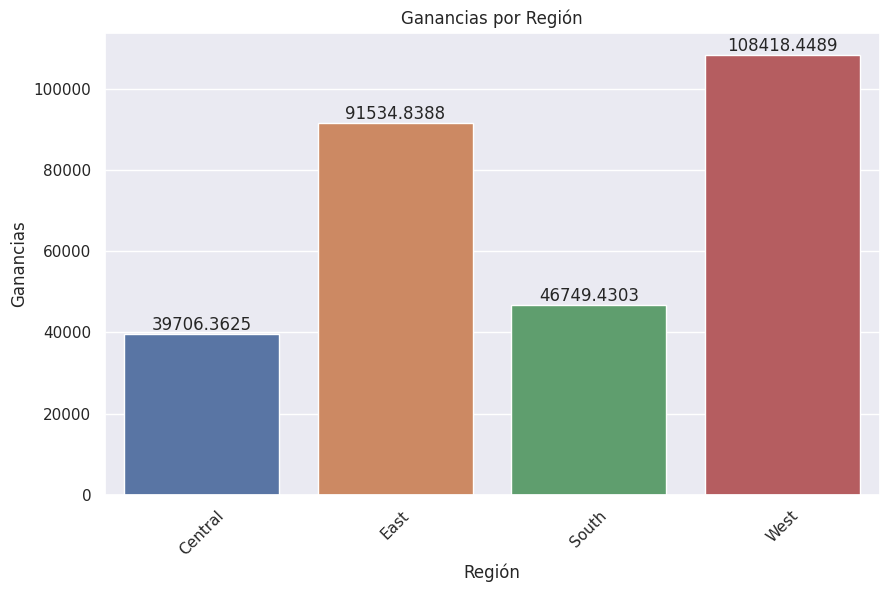

In [ ]:
# Calcular las Ganancias por Región
ganancias_por_region = df_graf.groupby("Region")["Profit"].sum()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=ganancias_por_region.index, y=ganancias_por_region.values)
ax.set(xlabel='Región', ylabel='Ganancias')
ax.set_title('Ganancias por Región')

# Agregar los valores exactos en cada barra
for i, v in enumerate(ganancias_por_region.values):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Rotar las etiquetas del eje x si es necesario
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

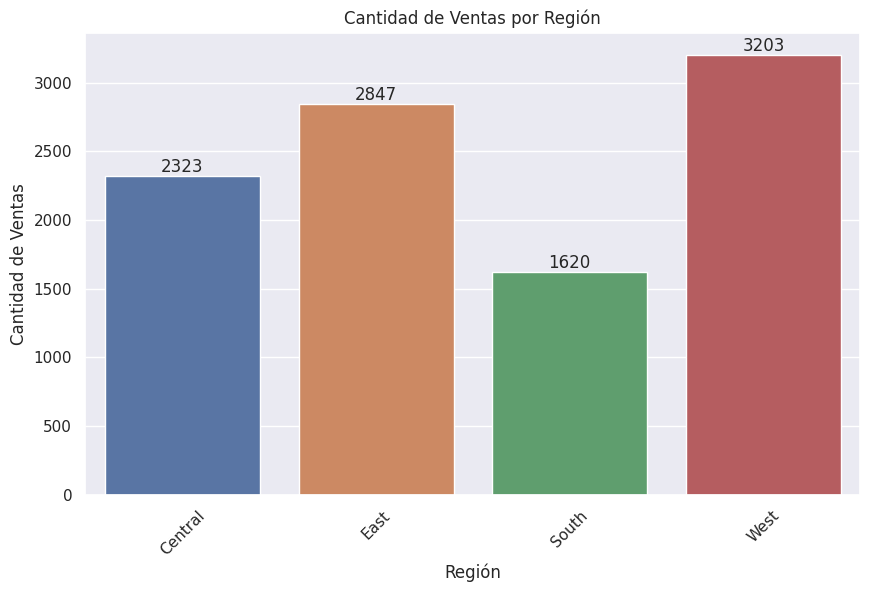

In [ ]:
# Calcular la Cantidad de Ventas por Región
conteo_ventas_por_region = df_graf["Region"].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=conteo_ventas_por_region.index, y=conteo_ventas_por_region.values)
ax.set(xlabel='Región', ylabel='Cantidad de Ventas')
ax.set_title('Cantidad de Ventas por Región')

# Agregar los valores exactos en cada barra
for i, v in enumerate(conteo_ventas_por_region.values):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Rotar las etiquetas del eje x si es necesario
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

##### Análisis Numérico

In [ ]:
#Resumen Numérico
muestra_region = df_graf.groupby('Region')['Profit'].sum().reset_index()
muestra_region.describe()

Profit
count       4.000000
mean    71602.270125
std     33604.319584
min     39706.362500
25%     44988.663350
50%     69142.134550
75%     95755.741325
max    108418.448900

##### Insights

* La región que más ganancias genera es la región oeste. Si bien también es la región con mayor cantidad de ventas, lo es por muy poco con respecto a la región este.
* La región central genera pocas ganancias en comparación la cantidad de ventas que genera.


### Análisis de Correlaciones

In [ ]:
#Copia del dataset
df_corr = df_rep

Se debe realizar un análisis de Correlación entre las variables cuantitativas para poder ver si alguna está estrechamente correlacionada a otra.

<Axes: >

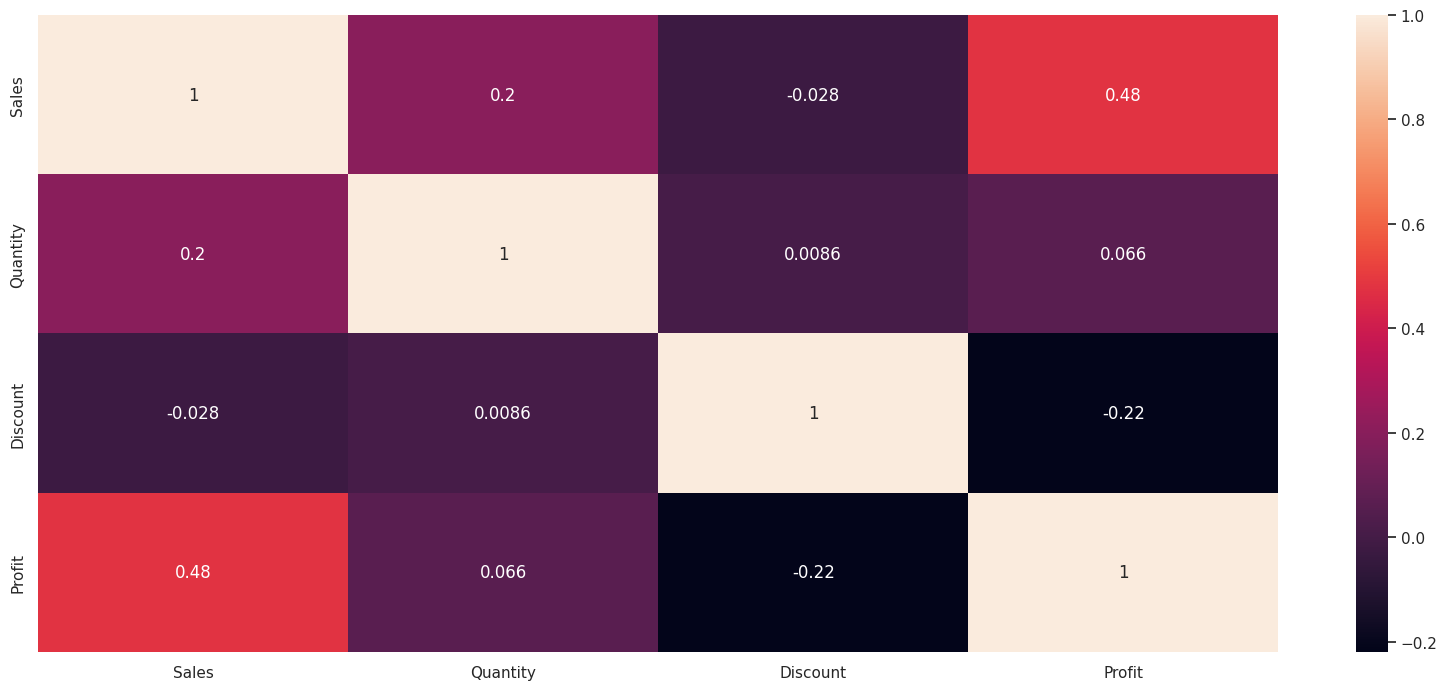

In [ ]:
#Correlación entre variables cuantitativas
sns.heatmap(df.filter(["Sales", "Quantity","Discount", "Profit"],axis=1).corr(), annot =True)

Se observa que hay una correlación medianamente fuerte entre "Profit" y "Sales". Más adelante se decidirá si se realiza alguna acción o no.

### Análisis de Outliers

In [ ]:
df_outlier = df_corr

En esta sección se analizan aquellos valores atípicos, cuál es su naturaleza y que se debe hacer con ellos. Para esto se va a realizar el análisis sobre las variables cuantitativas disponibles en el dataset. 

In [ ]:
# Se filtran únicamente las variables cuantitativas
df_outlier = df_outlier.filter(["Sales", "Quantity", "Discount", "Profit"], axis=1)
df_outlier

Sales  Quantity  Discount    Profit
Row ID                                        
1       261.9600         2      0.00   41.9136
2       731.9400         3      0.00  219.5820
3        14.6200         2      0.00    6.8714
4       957.5775         5      0.45 -383.0310
5        22.3680         2      0.20    2.5164
...          ...       ...       ...       ...
9990     25.2480         3      0.20    4.1028
9991     91.9600         2      0.00   15.6332
9992    258.5760         2      0.20   19.3932
9993     29.6000         4      0.00   13.3200
9994    243.1600         2      0.00   72.9480

[9993 rows x 4 columns]

Una vez filtradas las variables deseadas, se procede a visualizar los outliers.

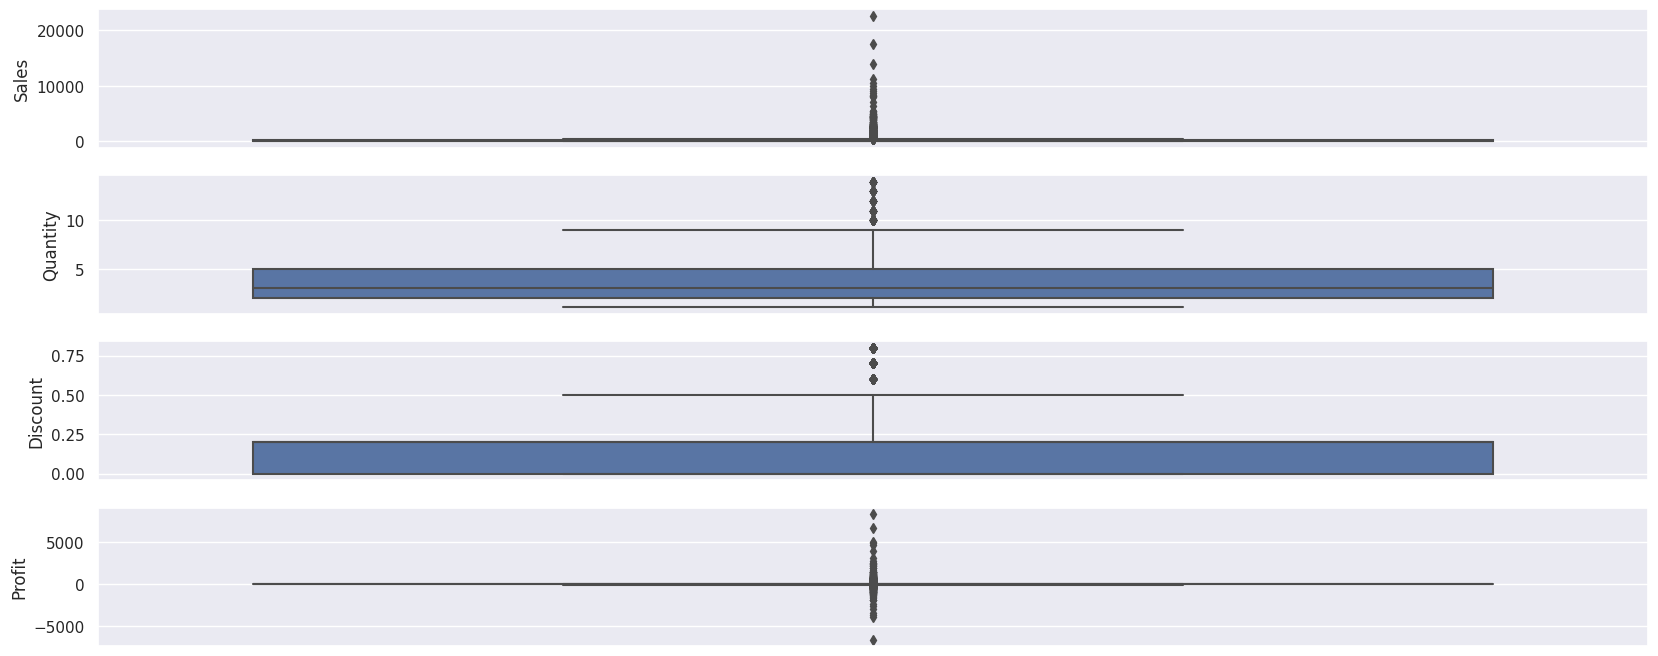

In [ ]:
# Gráfico que muestra los outliers
for i in range(len(df_outlier.columns)):
  plt.subplot(4,1,i+1)
  sns.boxplot(data=df_outlier, y=df_outlier.iloc[:,i])

Observando el gráfico se ve que hay muchos outliers así que se va a analizar la naturaleza de acuerdo a cada variable más detalladamente.

#### Profit

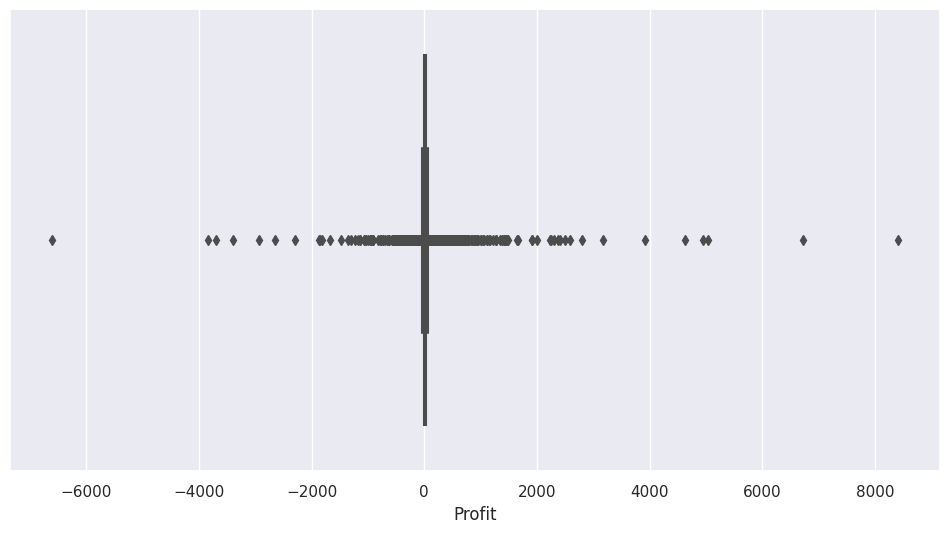

In [ ]:
#Boxplot de la variable "Profit"
plt.figure(figsize=(12,6))
sns.boxplot(data=df_outlier, x='Profit')
plt.show()

Lo que se pensaba en el inciso de "Análisis de Nulos" que era un valor erróneo aislado negativo resultaron ser muchos valores negativos. 
Se van a obtener los valores de los "bigotes" del boxplot para más adelante poder tratar estos outliers.

In [ ]:
#Obtención de las métricas de la variable "Profit"
metricas_prof = df_outlier["Profit"].describe().reset_index()
metricas_prof

index       Profit
0  count  9993.000000
1   mean    28.660971
2    std   234.271476
3    min -6599.978000
4    25%     1.731000
5    50%     8.671000
6    75%    29.364000
7    max  8399.976000

In [ ]:
#Obtención de los límites del Boxplot
IQR_prof = metricas_prof.iloc[6][1] - metricas_prof.iloc[4][1] 
LS_prof = metricas_prof.iloc[6][1] + 1.5*IQR_prof
LI_prof = metricas_prof.iloc[4][1] - 1.5*IQR_prof
print("Limite superior: {:.2f}".format(LS_prof))
print("Limite inferior: {:.2f}".format(LI_prof))

Limite superior: 70.81
Limite inferior: -39.72


#### Discount

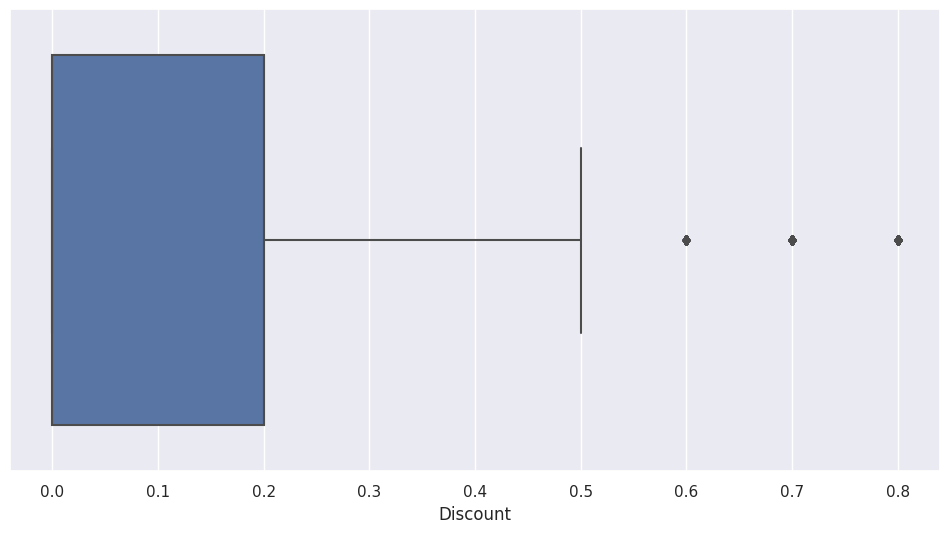

In [ ]:
#BoxPlot de la variable "Discount"
plt.figure(figsize=(12,6))
sns.boxplot(data=df_outlier, x='Discount')
plt.show()

Se observan outliers, así que se van a obtener los valores de los "bigotes" de del boxplot para más adelante poder tratar estos outliers.

In [ ]:
#Obtención de las métricas de la variable "Discount"
metricas_disc = df_outlier["Discount"].describe().reset_index()
metricas_disc

index     Discount
0  count  9993.000000
1   mean     0.156188
2    std     0.206457
3    min     0.000000
4    25%     0.000000
5    50%     0.200000
6    75%     0.200000
7    max     0.800000

In [ ]:
#Obtención de los límites del Boxplot
IQR_disc = metricas_disc.iloc[6][1] - metricas_disc.iloc[4][1] 
LS_disc = metricas_disc.iloc[6][1] + 1.5*IQR_disc
LI_disc = metricas_disc.iloc[4][1] - 1.5*IQR_disc
print("Limite superior: {:.2f}".format(LS_disc))
print("Limite inferior: {:.2f}".format(LI_disc))

Limite superior: 0.50
Limite inferior: -0.30


#### Sales

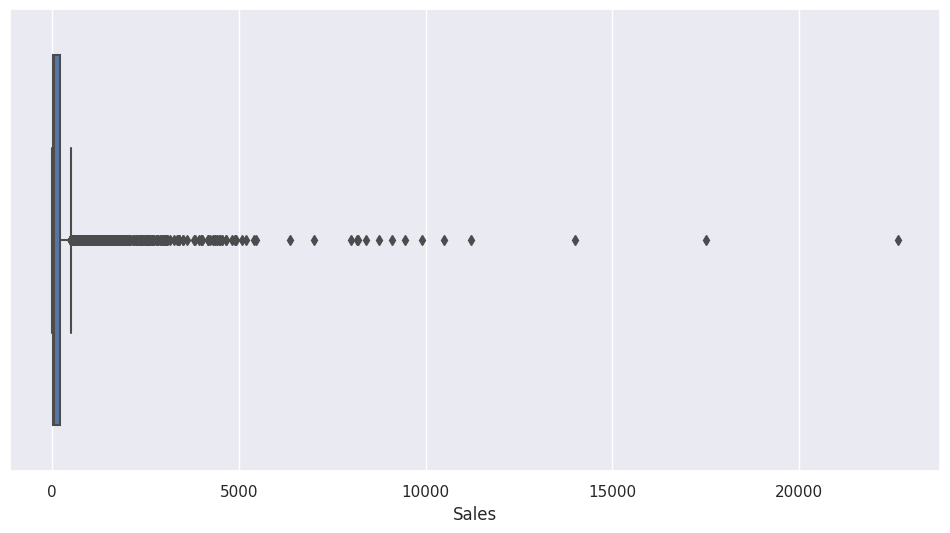

In [ ]:
#BoxPlot de la variable "Sales"
plt.figure(figsize=(12,6))
sns.boxplot(data=df_outlier, x='Sales')
plt.show()

Se observa una gran cantidad de outliers, por lo que se van a obtener los valores de los "bigotes" del boxplot para más adelante poder tratar estos outliers.

In [ ]:
#Métricas de la variable "Sales"
metricas_sales = df_outlier["Sales"].describe().reset_index()
metricas_sales

index         Sales
0  count   9993.000000
1   mean    229.852846
2    std    623.276074
3    min      0.444000
4    25%     17.280000
5    50%     54.480000
6    75%    209.940000
7    max  22638.480000

In [ ]:
#Obtención de los límites del Boxplot
IQR_sales = metricas_sales.iloc[6][1] - metricas_sales.iloc[4][1] 
LS_sales = metricas_sales.iloc[6][1] + 1.5*IQR_sales
LI_sales = metricas_sales.iloc[4][1] - 1.5*IQR_sales
print("Limite superior: {:.2f}".format(LS_sales))
print("Limite inferior: {:.2f}".format(LI_sales))

Limite superior: 498.93
Limite inferior: -271.71


#### Quantity

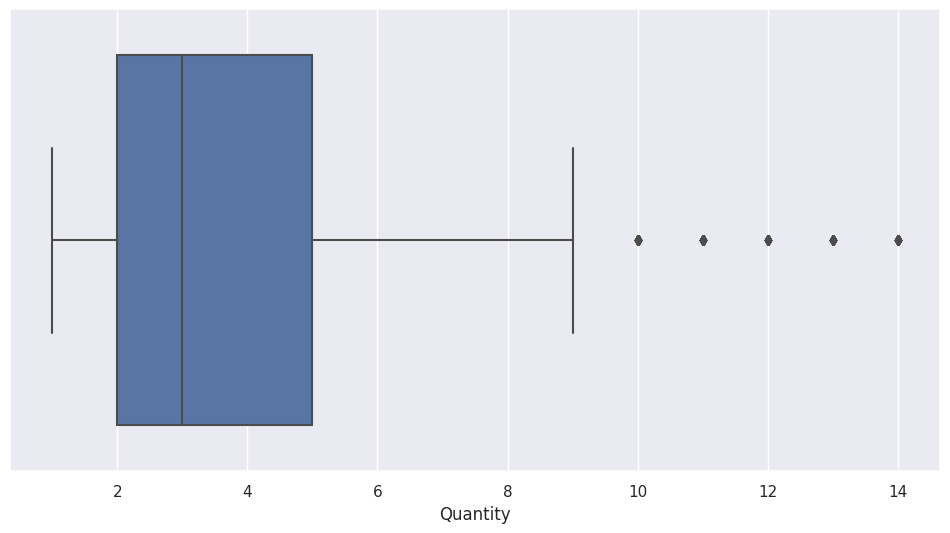

In [ ]:
#BoxPlot de la variable "Quantity"
plt.figure(figsize=(12,6))
sns.boxplot(data=df_outlier, x='Quantity')
plt.show()

Hay algunos valores atípicos, se van a obtener los valores de los "bigotes" del boxplot para más adelante poder tratar estos outliers.

In [ ]:
#Métricas de la variable "Quantity"
metricas_quant = df_outlier["Quantity"].describe().reset_index()
metricas_quant

index     Quantity
0  count  9993.000000
1   mean     3.789753
2    std     2.225149
3    min     1.000000
4    25%     2.000000
5    50%     3.000000
6    75%     5.000000
7    max    14.000000

In [ ]:
#Obtención de los límites del Boxplot
IQR_quant = metricas_quant.iloc[6][1] - metricas_quant.iloc[4][1] 
LS_quant = metricas_quant.iloc[6][1] + 1.5*IQR_quant
LI_quant = metricas_quant.iloc[4][1] - 1.5*IQR_quant
print("Limite superior: {:.2f}".format(LS_quant))
print("Limite inferior: {:.2f}".format(LI_quant))

Limite superior: 9.50
Limite inferior: -2.50


#### División del Dataset

Como se pudo observar, hay una gran cantidad de outliers en todas las variables cuantitativas del dataset. Al haber tantas se va a llevar a cabo una división del conjunto de datos para analizar cada conjunto por separado y poder hacer un análisis más preciso del dataset completo.

El primer grupo consistirá en aquellos datos considerados "normales", es decir que no contengan ni outliers ni "Profit" negativos, este será llamado "General".

In [ ]:
#Procedimiento para obtener los datos sin "Profit" negativos ni Outliers

drop = []

ind_col_profit = df_outlier.columns.get_loc("Profit")
ind_col_discount = df_outlier.columns.get_loc("Discount")
ind_col_sales = df_outlier.columns.get_loc("Sales")
ind_col_quantity = df_outlier.columns.get_loc("Quantity")

for i in range(len(df_outlier["Profit"])):
 if (df_outlier.iloc[i,ind_col_profit] < 0) or (df_outlier.iloc[i,ind_col_profit] > LS_prof) or (df_outlier.iloc[i,ind_col_quantity] > LS_quant)\
   or (df_outlier.iloc[i,ind_col_sales] > LS_sales) or (df_outlier.iloc[i,ind_col_discount] > LS_disc):
   drop.append(i) 
df_general = df_corr.drop(df_corr.index[drop]) 

In [ ]:
df_general

Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
Row ID                                                                       
1       CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
3       CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
5       US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
6       CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   
7       CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   
...                ...         ...         ...             ...         ...   
9989    CA-2017-163629  11/17/2017  11/21/2017  Standard Class    RA-19885   
9990    CA-2014-110422   1/21/2014   1/23/2014    Second Class    TB-21400   
9991    CA-2017-121258   2/26/2017    3/3/2017  Standard Class    DB-13060   
9992    CA-2017-121258   2/26/2017    3/3/2017  Standard Class    DB-13060   
9993    CA-2017-121258   2/26/2017    3/3/2017  Standard Class    DB-13060   

           Customer Name    Segment        Country             City  \
Row ID                                                                
1            Claire Gute   Consumer  United States        Henderson   
3        Darrin Van Huff  Corporate  United States      Los Angeles   
5         Sean O'Donnell   Consumer  United States  Fort Lauderdale   
6        Brosina Hoffman   Consumer  United States      Los Angeles   
7        Brosina Hoffman   Consumer  United States      Los Angeles   
...                  ...        ...            ...              ...   
9989        Ruben Ausman  Corporate  United States           Athens   
9990    Tom Boeckenhauer   Consumer  United States            Miami   
9991         Dave Brooks   Consumer  United States       Costa Mesa   
9992         Dave Brooks   Consumer  United States       Costa Mesa   
9993         Dave Brooks   Consumer  United States       Costa Mesa   

             State  ...  Region       Product ID         Category  \
Row ID              ...                                             
1         Kentucky  ...   South  FUR-BO-10001798        Furniture   
3       California  ...    West  OFF-LA-10000240  Office Supplies   
5          Florida  ...   South  OFF-ST-10000760  Office Supplies   
6       California  ...    West  FUR-FU-10001487        Furniture   
7       California  ...    West  OFF-AR-10002833  Office Supplies   
...            ...  ...     ...              ...              ...   
9989       Georgia  ...   South  TEC-PH-10004006       Technology   
9990       Florida  ...   South  FUR-FU-10001889        Furniture   
9991    California  ...    West  FUR-FU-10000747        Furniture   
9992    California  ...    West  TEC-PH-10003645       Technology   
9993    California  ...    West  OFF-PA-10004041  Office Supplies   

       Sub-Category                                       Product Name  \
Row ID                                                                   
1         Bookcases                  Bush Somerset Collection Bookcase   
3            Labels  Self-Adhesive Address Labels for Typewriters b...   
5           Storage                     Eldon Fold 'N Roll Cart System   
6       Furnishings  Eldon Expressions Wood and Plastic Desk Access...   
7               Art                                         Newell 322   
...             ...                                                ...   
9989         Phones                    Panasonic KX - TS880B Telephone   
9990    Furnishings                             Ultra Door Pull Handle   
9991    Furnishings  Tenex B1-RE Series Chair Mats for Low Pile Car...   
9992         Phones                              Aastra 57i VoIP phone   
9993          Paper  It's Hot Message Books with Stickers, 2 3/4" x 5"   

          Sales  Quantity  Discount   Profit   Año  
Row ID                                              
1       261.960         2       0.0  41.9136  2016  
3        14.620         2       0.0   6.8714  2016  
5 

Se observa que el grupo "General" contiene 6584 datos, correspondiente al 65,88% del total de datos.

El siguiente grupo contiene todos los registros que tengan un "Profit" negativo. Este será llamado "Pérdidas".

In [ ]:
# Registros con "Profit" negativo y/o Outliers
df_neg_out = df_corr[df_corr.index.isin(drop)]

In [ ]:
# Registros con "Profit" negativo
df_perdidas = df_neg_out[df_neg_out["Profit"] < 0]
df_perdidas

Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
Row ID                                                                       
15      US-2015-118983  11/22/2015  11/26/2015  Standard Class    HP-14815   
16      US-2015-118983  11/22/2015  11/26/2015  Standard Class    HP-14815   
24      US-2017-156909   7/16/2017   7/18/2017    Second Class    SF-20065   
28      US-2015-150630   9/17/2015   9/21/2015  Standard Class    TB-21520   
39      CA-2015-117415  12/27/2015  12/31/2015  Standard Class    SN-20710   
...                ...         ...         ...             ...         ...   
9807    CA-2016-136322  10/21/2016  10/26/2016  Standard Class    AP-10720   
9832    CA-2014-113257  12/16/2014  12/18/2014    Second Class    SC-20305   
9877    US-2017-166324   4/20/2017   4/21/2017     First Class    BE-11455   
9878    US-2017-166324   4/20/2017   4/21/2017     First Class    BE-11455   
9920    CA-2016-149272   3/15/2016   3/19/2016  Standard Class    MY-18295   

           Customer Name      Segment        Country             City  \
Row ID                                                                  
15         Harold Pawlan  Home Office  United States       Fort Worth   
16         Harold Pawlan  Home Office  United States       Fort Worth   
24       Sandra Flanagan     Consumer  United States     Philadelphia   
28       Tracy Blumstein     Consumer  United States     Philadelphia   
39          Steve Nguyen  Home Office  United States          Houston   
...                  ...          ...            ...              ...   
9807          Anne Pryor  Home Office  United States  Fort Lauderdale   
9832    Sean Christensen     Consumer  United States         Beaumont   
9877          Brad Eason  Home Office  United States        Cleveland   
9878          Brad Eason  Home Office  United States        Cleveland   
9920     Muhammed Yedwab    Corporate  United States            Bryan   

               State  ...   Region       Product ID         Category  \
Row ID                ...                                              
15             Texas  ...  Central  OFF-AP-10002311  Office Supplies   
16             Texas  ...  Central  OFF-BI-10000756  Office Supplies   
24      Pennsylvania  ...     East  FUR-CH-10002774        Furniture   
28      Pennsylvania  ...     East  FUR-BO-10004834        Furniture   
39             Texas  ...  Central  FUR-BO-10002545        Furniture   
...              ...  ...      ...              ...              ...   
9807         Florida  ...    South  OFF-BI-10004817  Office Supplies   
9832           Texas  ...  Central  FUR-FU-10001706        Furniture   
9877            Ohio  ...     East  OFF-ST-10000078  Office Supplies   
9878            Ohio  ...     East  OFF-BI-10000174  Office Supplies   
9920           Texas  ...  Central  FUR-CH-10000863        Furniture   

       Sub-Category                                       Product Name  \
Row ID                                                                   
15       Appliances  Holmes Replacement Filter for HEPA Air Cleaner...   
16          Binders   Storex DuraTech Recycled Plastic Frosted Binders   
24           Chairs                 Global Deluxe Stacking Chair, Gray   
28        Bookcases  Riverside Palais Royal Lawyers Bookcase, Royal...   
39        Bookcases  Atlantic Metals Mobile 3-Shelf Bookcases, Cust...   
...             ...                                                ...   
9807        Binders                       GBC Personal VeloBind Strips   
9832    Furnishings                       Longer-Life Soft White Bulbs   
9877        Storage              Tennsco 6- and 18-Compartment Lockers   
9878        Binders  Wilson Jones Clip & Carry Folder Binder Tool f...   
9920         Chairs                   Novimex Swivel Fabric Task Chair   

            Sales  Quantity  Discount     Profit   Año  
Row ID                                                  
15        68.8100         5      0.

Se puede apreciar que es un grupo menor que contiene 748 registros, correpondientes al 7,48% del dataset total.

El último grupo corresponde a aquellos valores que contengan outliers superiores en "Profit", es decir que tengan un valor superior al Límite Superior de la variable "Profit". Este se llamará "Outliers".

In [ ]:
# Registros con Outliers
df_outliers = df_neg_out[df_neg_out["Profit"] >= 0]
df_outliers

Order ID Order Date   Ship Date       Ship Mode Customer ID  \
Row ID                                                                      
1       CA-2016-152156  11/8/2016  11/11/2016    Second Class    CG-12520   
3       CA-2016-138688  6/12/2016   6/16/2016    Second Class    DV-13045   
7       CA-2014-115812   6/9/2014   6/14/2014  Standard Class    BH-11710   
10      CA-2014-115812   6/9/2014   6/14/2014  Standard Class    BH-11710   
11      CA-2014-115812   6/9/2014   6/14/2014  Standard Class    BH-11710   
...                ...        ...         ...             ...         ...   
9961    CA-2017-141446  9/16/2017   9/18/2017    Second Class    CL-12700   
9967    CA-2016-146374  12/5/2016  12/10/2016    Second Class    HE-14800   
9978    US-2016-103674  12/6/2016  12/10/2016  Standard Class    AP-10720   
9983    US-2016-157728  9/22/2016   9/28/2016  Standard Class    RC-19960   
9992    CA-2017-121258  2/26/2017    3/3/2017  Standard Class    DB-13060   

          Customer Name      Segment        Country          City       State  \
Row ID                                                                          
1           Claire Gute     Consumer  United States     Henderson    Kentucky   
3       Darrin Van Huff    Corporate  United States   Los Angeles  California   
7       Brosina Hoffman     Consumer  United States   Los Angeles  California   
10      Brosina Hoffman     Consumer  United States   Los Angeles  California   
11      Brosina Hoffman     Consumer  United States   Los Angeles  California   
...                 ...          ...            ...           ...         ...   
9961       Craig Leslie  Home Office  United States      Florence    Kentucky   
9967       Harold Engle    Corporate  United States        Newark    Delaware   
9978         Anne Pryor  Home Office  United States   Los Angeles  California   
9983         Ryan Crowe     Consumer  United States  Grand Rapids    Michigan   
9992        Dave Brooks     Consumer  United States    Costa Mesa  California   

        ...   Region       Product ID         Category Sub-Category  \
Row ID  ...                                                           
1       ...    South  FUR-BO-10001798        Furniture    Bookcases   
3       ...     West  OFF-LA-10000240  Office Supplies       Labels   
7       ...     West  OFF-AR-10002833  Office Supplies          Art   
10      ...     West  OFF-AP-10002892  Office Supplies   Appliances   
11      ...     West  FUR-TA-10001539        Furniture       Tables   
...     ...      ...              ...              ...          ...   
9961    ...    South  TEC-AC-10002305       Technology  Accessories   
9967    ...     East  OFF-EN-10004483  Office Supplies    Envelopes   
9978    ...     West  OFF-FA-10003467  Office Supplies    Fasteners   
9983    ...  Central  OFF-PA-10002195  Office Supplies        Paper   
9992    ...     West  TEC-PH-10003645       Technology       Phones   

                                             Product Name     Sales  Quantity  \
Row ID                                                                          
1                       Bush Somerset Collection Bookcase   261.960         2   
3       Self-Adhesive Address Labels for Typewriters b...    14.620         2   
7                                              Newell 322     7.280         4   
10                       Belkin F5C206VTEL 6 Outlet Surge   114.900         5   
11               Chromcraft Rectangular Conference Tables  1706.184         9   
...                                                   ...       ...       ...   
9961                KeyTronic E03601U1 - Keyboard - Beige    18.000         1   
9967           #10 White Business Envelopes,4 1/8 x 9 1/2   109.690         7   
9978             Alliance Big Bands Rubber Bands, 12/Pack    13.860         7   
9983    RSVP Cards & Envelopes, Blank White, 8-1/2" X ...    35.560         7   
9992                                Aastra 57i VoIP phone   25

Se observa que es un conjunto de datos con 2661 registros, correspondientes a un 26,62% del dataset completo.

Una vez dividido el dataset se hará un análisis sobre cada grupo por separado, para luego obtener conclusiones específicas y poder describir más detalladamente el comportamiento de este conjunto de datos y de la información que se desea obtener del mismo.

## Predicción de ganancias del año siguiente

In [ ]:
# Copia del dataset
df_ganancias = df_corr

A continuación, se hará una predicción de las ganancias del año siguiente, en este caso el año 2018.  
Lo primero consiste en agregar la columna "Año" al dataset, obtenida de la variable "Order Date".

In [ ]:
# Convierte la columna "Order Date" al formato de fecha
df_ganancias['Order Date'] = pd.to_datetime(df_ganancias['Order Date'])

# Extrae el año de la columna "Order Date" y crea una nueva columna "Año"
df_ganancias['Año'] = df_ganancias['Order Date'].dt.year

<ipython-input-840-8113224af42d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ganancias['Order Date'] = pd.to_datetime(df_ganancias['Order Date'])
<ipython-input-840-8113224af42d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ganancias['Año'] = df_ganancias['Order Date'].dt.year


Se obtiene un nuevo dataframe obtenido con los datos agrupados por año.

In [ ]:
# Agrupa los datos por año y calcula las ganancias anuales
grouped_df = df_ganancias.groupby('Año')['Profit'].sum().reset_index()

Ahora, se realiza un modelo de regresión para poder predecir el valor deseado.

In [ ]:
# Prepara los datos para el modelo de regresión
X = grouped_df['Año'].values.reshape(-1, 1)
y = grouped_df['Profit'].values

# Crea el modelo de regresión lineal
model = LinearRegression()

# Ajusta el modelo con los datos de entrenamiento
model.fit(X, y)

# Predecir las ganancias del año siguiente
next_year = grouped_df['Año'].max() + 1
predicted_profit = model.predict([[next_year]])

# Agrega la predicción del próximo año al DataFrame
predicted_df = pd.DataFrame({'Año': [next_year], 'Profit': predicted_profit})
grouped_df = pd.concat([grouped_df, predicted_df], ignore_index=True)

Por último se grafican los datos.

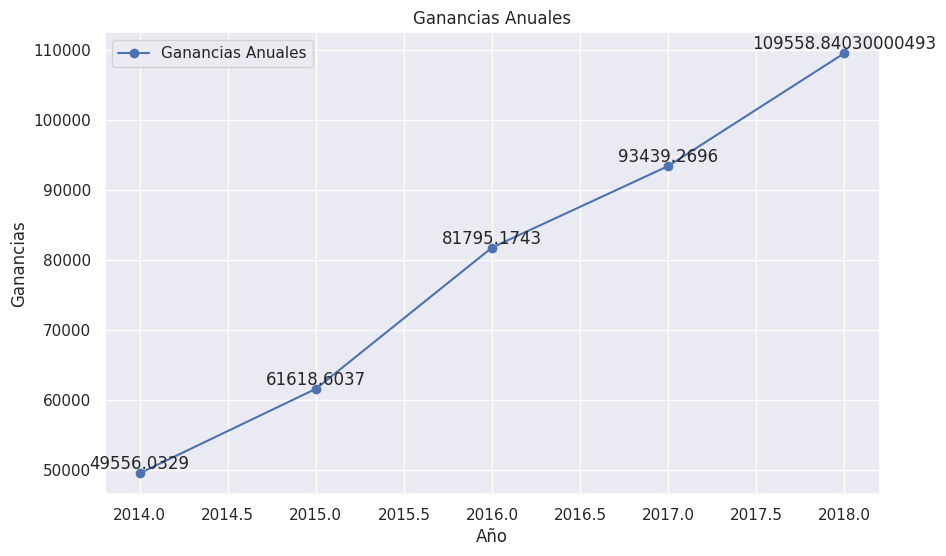

In [ ]:
# Graficar las ganancias anuales
plt.figure(figsize=(10, 6))
plt.plot(grouped_df['Año'], grouped_df['Profit'], marker='o', label='Ganancias Anuales')
for i, profit in enumerate(grouped_df['Profit']):
    plt.text(grouped_df['Año'][i], profit, str(profit), ha='center', va='bottom')
plt.xlabel('Año')
plt.ylabel('Ganancias')
plt.title('Ganancias Anuales')
plt.grid(True)
plt.legend()
plt.show()

Como se observa en el gráfico el valor predicho para el año 2018 será de $109558 aproximadamente.

En la siguiente etapa del proyecto se determinará cuáles son los factores que influyen, ya sea positiva o negativamente en las ganancias anuales.  
Para esto se hará un análisis por cada grupo obtenido del dataset.

## Datos Generales

### Agrupamiento de Datos

Actualmente por el formato de los datos, no es posible responder las preguntar ni cumplir con los objetivos planteados.  
Para tratar esta situación se agruparan los datos para poder cumplir con los objetivos. Más adelante se muestra el proceso mostrando sobre qué criterios se agrupan los datos.

In [ ]:
#Lectura del DataFrame
df_agrup_general = df_general

Lo primero consiste en tratar los datos actuales para que tengan el formato óptimo para llevar a cabo todo este proceso.  
Se procede a separar la columna "Order Date" en años y meses, ignorando los días.

In [ ]:
#Creación de la columna "Anio" a partir de "Order Date"
df_agrup_general.insert(loc = 2,
          column = 'Anio',
          value = pd.DatetimeIndex(pd.to_datetime(df_agrup_general['Order Date'])).to_period('Y'))

In [ ]:
#Creación de la columna Mes en DataFrame
df_agrup_general.insert(loc = 3,
          column = 'Mes',
          value = 0)

In [ ]:
#Asignación de valores a la columna "Mes" a partir de los datos en "Order Date"
long = len(df_agrup_general["Order Date"])
ind_col_fecha = df_agrup_general.columns.get_loc("Order Date")
ind_col_mes = df_agrup_general.columns.get_loc("Mes")
for i in range(long):
  fecha_dt = datetime.strptime(df_agrup_general.iloc[i,ind_col_fecha], '%m/%d/%Y')
  df_agrup_general.iloc[i,ind_col_mes] = fecha_dt.month
df_agrup_general

Order ID  Order Date  Anio  Mes   Ship Date       Ship Mode  \
Row ID                                                                      
1       CA-2016-152156   11/8/2016  2016   11  11/11/2016    Second Class   
3       CA-2016-138688   6/12/2016  2016    6   6/16/2016    Second Class   
5       US-2015-108966  10/11/2015  2015   10  10/18/2015  Standard Class   
6       CA-2014-115812    6/9/2014  2014    6   6/14/2014  Standard Class   
7       CA-2014-115812    6/9/2014  2014    6   6/14/2014  Standard Class   
...                ...         ...   ...  ...         ...             ...   
9989    CA-2017-163629  11/17/2017  2017   11  11/21/2017  Standard Class   
9990    CA-2014-110422   1/21/2014  2014    1   1/23/2014    Second Class   
9991    CA-2017-121258   2/26/2017  2017    2    3/3/2017  Standard Class   
9992    CA-2017-121258   2/26/2017  2017    2    3/3/2017  Standard Class   
9993    CA-2017-121258   2/26/2017  2017    2    3/3/2017  Standard Class   

       Customer ID     Customer Name    Segment        Country  ... Region  \
Row ID                                                          ...          
1         CG-12520       Claire Gute   Consumer  United States  ...  South   
3         DV-13045   Darrin Van Huff  Corporate  United States  ...   West   
5         SO-20335    Sean O'Donnell   Consumer  United States  ...  South   
6         BH-11710   Brosina Hoffman   Consumer  United States  ...   West   
7         BH-11710   Brosina Hoffman   Consumer  United States  ...   West   
...            ...               ...        ...            ...  ...    ...   
9989      RA-19885      Ruben Ausman  Corporate  United States  ...  South   
9990      TB-21400  Tom Boeckenhauer   Consumer  United States  ...  South   
9991      DB-13060       Dave Brooks   Consumer  United States  ...   West   
9992      DB-13060       Dave Brooks   Consumer  United States  ...   West   
9993      DB-13060       Dave Brooks   Consumer  United States  ...   West   

             Product ID         Category Sub-Category  \
Row ID                                                  
1       FUR-BO-10001798        Furniture    Bookcases   
3       OFF-LA-10000240  Office Supplies       Labels   
5       OFF-ST-10000760  Office Supplies      Storage   
6       FUR-FU-10001487        Furniture  Furnishings   
7       OFF-AR-10002833  Office Supplies          Art   
...                 ...              ...          ...   
9989    TEC-PH-10004006       Technology       Phones   
9990    FUR-FU-10001889        Furniture  Furnishings   
9991    FUR-FU-10000747        Furniture  Furnishings   
9992    TEC-PH-10003645       Technology       Phones   
9993    OFF-PA-10004041  Office Supplies        Paper   

                                             Product Name    Sales Quantity  \
Row ID                                                                        
1                       Bush Somerset Collection Bookcase  261.960        2   
3       Self-Adhesive Address Labels for Typewriters b...   14.620        2   
5                          Eldon Fold 'N Roll Cart System   22.368        2   
6       Eldon Expressions Wood and Plastic Desk Access...   48.860        7   
7                                              Newell 322    7.280        4   
...                                                   ...      ...      ...   
9989                      Panasonic KX - TS880B Telephone  206.100        5   
9990                               Ultra Door Pull Handle   25.248        3   
9991    Tenex B1-RE Series Chair Mats for Low Pile Car...   91.960        2   
9992                                Aastra 57i VoIP phone  258.576        2   
9993    It's Hot Message Books with Stickers, 2 3/4" x 5"   29.600        4   

       Discount   Profit   Año  
Row ID                          
1           0.0  41.9136  2016  
3           0.0   6.8714  2016  
5           0.2   2.5164  2015  
6           0.0  14.1694  2014  
7           0.0   1.9656  201

Se cambia el nombre de la variable "Quantity" a "Product Quantity" para destacar que la cantidad mostrada es la cantidad de productos que se vendieron en cada venta.

In [ ]:
#Renombramiento de columna "Quantity" a "Product Quantity"
df_agrup_general = df_agrup_general.rename(columns={"Quantity":"Product Quantity"})

Se crea una columna llamada "Sales Quantity" con valor igual a 1 en todos los casos, para más adelante poder agrupar dichas ventas con varios criterios y conocer la cantidad de ventas incluidas en cada grupo.

In [ ]:
#Creación de la columna "Sales Quantity"
df_agrup_general.insert(loc = 20,
          column = 'Sales Quantity',
          value = 1)

Una vez creadas las columnas deseadas faltantes, se procede a eliminar aquellas columnas que no interesan para la creación del modelo de regresión por lo siguiente:
* Order ID: es un id, no aporta información relevante.
* Customer Name: no es posible incluir en el agrupamiento el nombre de cada cliente.  
* Customer ID: es un id, no aporta información relevante.
* Order Date: de este campo se obtuvo el año y el mes de cada venta, ya no es necesario conservar esta variable.
* Ship Date: la fecha de envío no es tan importante como la fecha de pedido, por lo que solo se utilizará esa fecha.
* Country: todos los registros tienen como valor "United States" por lo que no aporta valor al análisis. 
* City: si se quieren agregar las ciudades al agrupamiento la cantidad de datos se expandiría de manera desproporcionada y no se considera tan importante analizar un valor tan puntual. En su lugar se eligió la variable "Region" que es más abarcativa e igual de descriptiva de una manera menos puntual.
* State: al igual que en la variable "City", se prefiere un dato más abarcativo como "Region".
* Postal Code: es un id, no aporta información relevante.
* Product ID: es un id, no aporta información relevante.
* Product name: si se desea agregar esta variable al modelo, la cantidad de datos se incrementaría de manera desproporcionada y no se considera tan importante analizar un valor tan puntual y poco abarcativa. En su lugar se tomaron las variables "Category" y "Sub-Category". Esta variable será utilizada más adelante para hacer un análisis más puntual.

In [ ]:
#Eliminación de Columnas
df_agrup_general = df_agrup_general.drop(["Order ID", "Customer Name", "Customer ID", "Order Date", "Ship Date", "Country", "City", "State", "Postal Code", "Product ID", "Product Name"], axis=1)
df_agrup_general.head()

Anio  Mes       Ship Mode    Segment Region         Category  \
Row ID                                                                 
1       2016   11    Second Class   Consumer  South        Furniture   
3       2016    6    Second Class  Corporate   West  Office Supplies   
5       2015   10  Standard Class   Consumer  South  Office Supplies   
6       2014    6  Standard Class   Consumer   West        Furniture   
7       2014    6  Standard Class   Consumer   West  Office Supplies   

       Sub-Category    Sales  Product Quantity  Sales Quantity  Discount  \
Row ID                                                                     
1         Bookcases  261.960                 2               1       0.0   
3            Labels   14.620                 2               1       0.0   
5           Storage   22.368                 2               1       0.2   
6       Furnishings   48.860                 7               1       0.0   
7               Art    7.280                 4               1       0.0   

         Profit   Año  
Row ID                 
1       41.9136  2016  
3        6.8714  2016  
5        2.5164  2015  
6       14.1694  2014  
7        1.9656  2014

Ahora, se agrupan los datos de acuerdo al año, mes, categoría, sub categoría, modo de envío, segmento de cliente y región del cliente. Esto para obtener la cantidad de productos, cantidad de ventas, precio de las ventas, descuentos otorgados y ganancias obtenidas de acuerdo a dichos agrupamientos.

In [ ]:
#Agrupamiento de Datos
discount = df_agrup_general.groupby(["Anio","Mes","Category", "Sub-Category", "Ship Mode", "Segment", "Region"]).median().reset_index()
discount = discount["Discount"]
df_agrup_general = df_agrup_general.drop(["Discount"], axis=1)
df_agrup_general = df_agrup_general.groupby(["Anio","Mes","Category", "Sub-Category", "Ship Mode", "Segment", "Region"]).sum().reset_index()
df_agrup_general.insert(loc = 10,
          column = 'Discount',
          value = discount)
df_agrup_general.head(10)

<ipython-input-308-cf27894215d2>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  discount = df_agrup_general.groupby(["Anio","Mes","Category", "Sub-Category", "Ship Mode", "Segment", "Region"]).median().reset_index()
<ipython-input-308-cf27894215d2>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_agrup_general = df_agrup_general.groupby(["Anio","Mes","Category", "Sub-Category", "Ship Mode", "Segment", "Region"]).sum().reset_index()


Anio  Mes   Category Sub-Category       Ship Mode    Segment   Region  \
0  2014    1  Furniture    Bookcases     First Class   Consumer     West   
1  2014    1  Furniture    Bookcases     First Class  Corporate  Central   
2  2014    1  Furniture    Bookcases  Standard Class   Consumer     West   
3  2014    1  Furniture  Furnishings     First Class   Consumer     East   
4  2014    1  Furniture  Furnishings    Second Class   Consumer     East   
5  2014    1  Furniture  Furnishings    Second Class   Consumer    South   
6  2014    1  Furniture  Furnishings  Standard Class   Consumer  Central   
7  2014    1  Furniture  Furnishings  Standard Class   Consumer    South   
8  2014    1  Furniture  Furnishings  Standard Class   Consumer     West   
9  2014    1  Furniture  Furnishings  Standard Class  Corporate    South   

     Sales  Product Quantity  Sales Quantity  Discount   Profit  
0  290.666                 2               1      0.15   3.4196  
1  141.960                 2               1      0.00  39.7488  
2  333.999                 3               1      0.15   3.9294  
3    9.940                 2               1      0.00   3.0814  
4  127.104                 6               1      0.20  28.5984  
5   25.248                 3               1      0.20   4.1028  
6  287.670                 6               2      0.00  34.8843  
7   38.600                 4               1      0.00  11.5800  
8   19.300                 2               1      0.00   5.7900  
9   51.940                 1               1      0.00  21.2954

### Visualizaciones - Análisis Numérico - Interpretación

A continuación se van graficar todas las variables del nuevo dataset obtenido con respecto a la variable objetivo que es "Profit", también se hará un conteo de los datos de cada variable. Luego se hará un análisis numérico y se obtendrá una interpretación de estos datos.

In [ ]:
#Copia del Dataframe
df_graf_general = df_agrup_general

#### Año

##### Gráfico

In [ ]:
#Creación Dataframe con la información deseada
muestra_año = df_graf_general.groupby('Anio')['Profit'].sum().reset_index()
muestra_año

Anio      Profit
0  2014  19412.8208
1  2015  21886.6650
2  2016  25658.8761
3  2017  33770.8239

<Axes: xlabel='Anio', ylabel='Profit'>

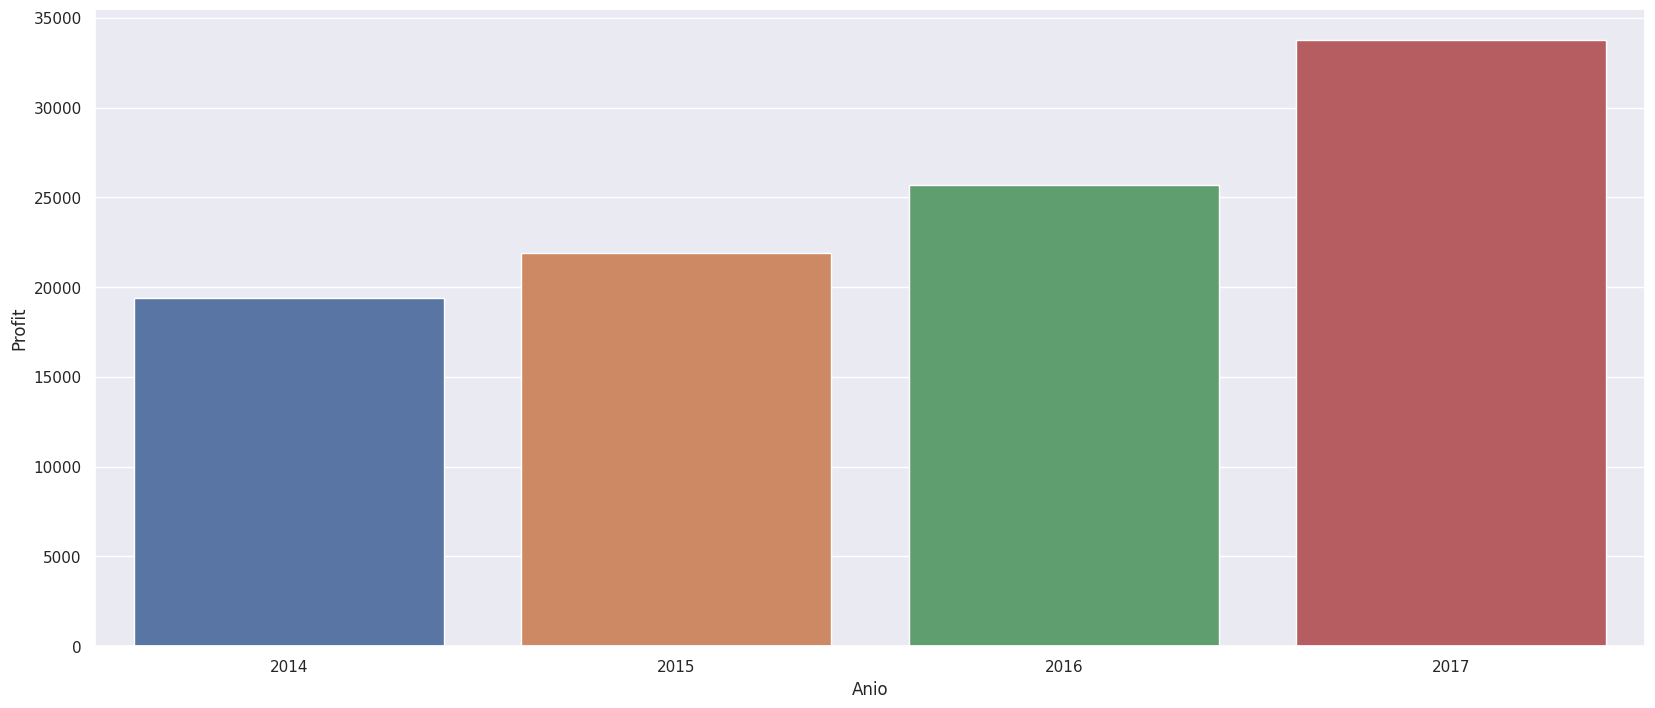

In [ ]:
#Gráfico comparando la variable con "Profit"
sns.set(rc={'figure.figsize':(20,8.27)})
sns.barplot(data=muestra_año, x="Anio", y= "Profit")

<Axes: xlabel='Anio', ylabel='count'>

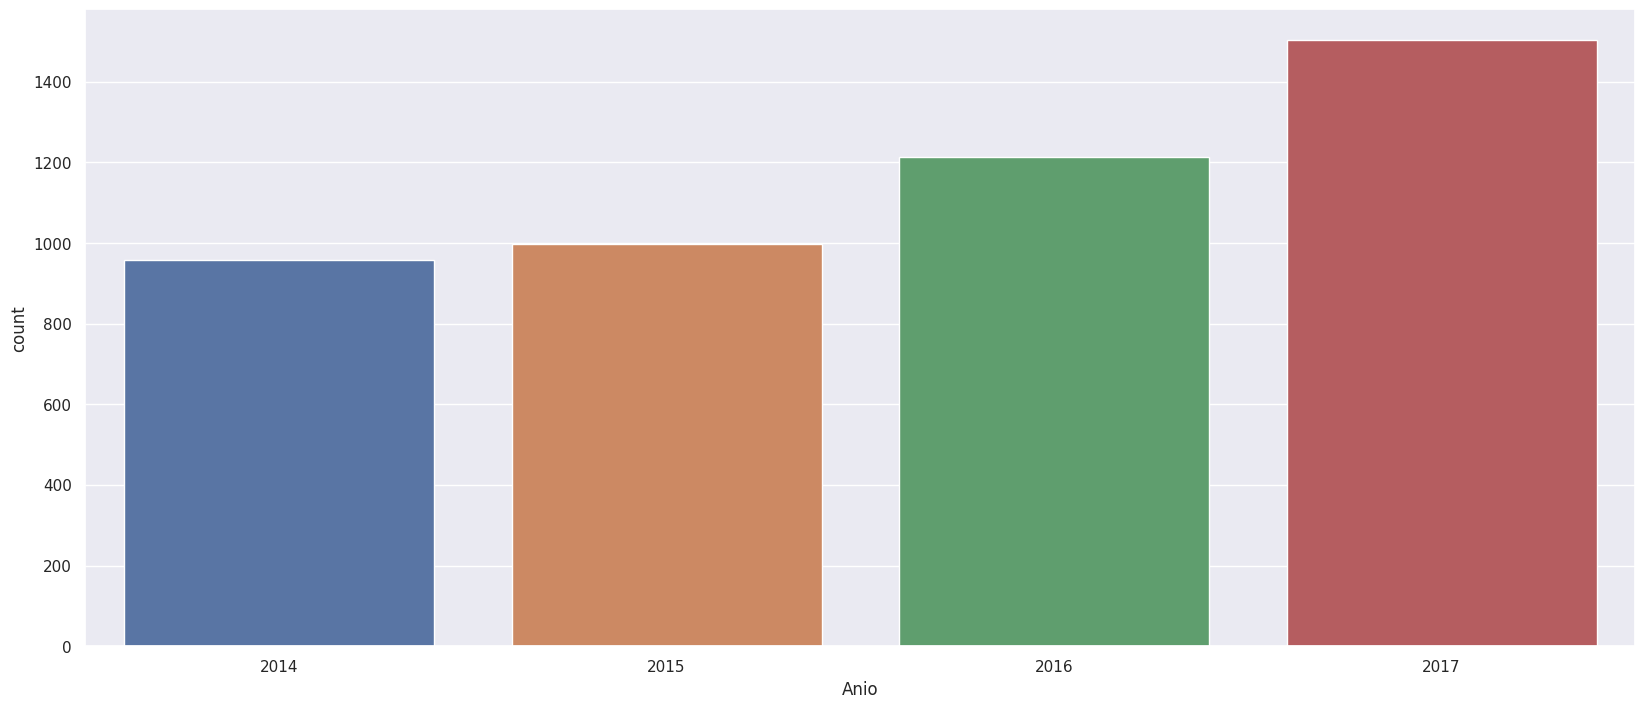

In [ ]:
#Gráfico de conteo de la variable
sns.countplot(data=df_graf_general, x="Anio")

##### Análisis Numérico

In [ ]:
#Resumen Numérico
muestra_año.describe()

Profit
count      4.000000
mean   25182.296450
std     6275.294624
min    19412.820800
25%    21268.203950
50%    23772.770550
75%    27686.863050
max    33770.823900

##### Insights

* La cantidad de ventas como las ganancias crecieron con el correr de los años de manera progresiva, sobretodo en el último año.

#### Mes

##### Gráfico

In [ ]:
#Creación Dataframe con la información deseada
muestra_mes = df_graf_general.groupby('Mes')['Profit'].sum().reset_index()
muestra_mes

Mes      Profit
0     1   3633.1355
1     2   3342.9049
2     3   7112.0396
3     4   6135.9827
4     5   7443.2965
5     6   7194.4734
6     7   7545.4164
7     8   7522.7751
8     9  13663.5414
9    10   7780.0966
10   11  14637.3702
11   12  14718.1535

<Axes: xlabel='Mes', ylabel='Profit'>

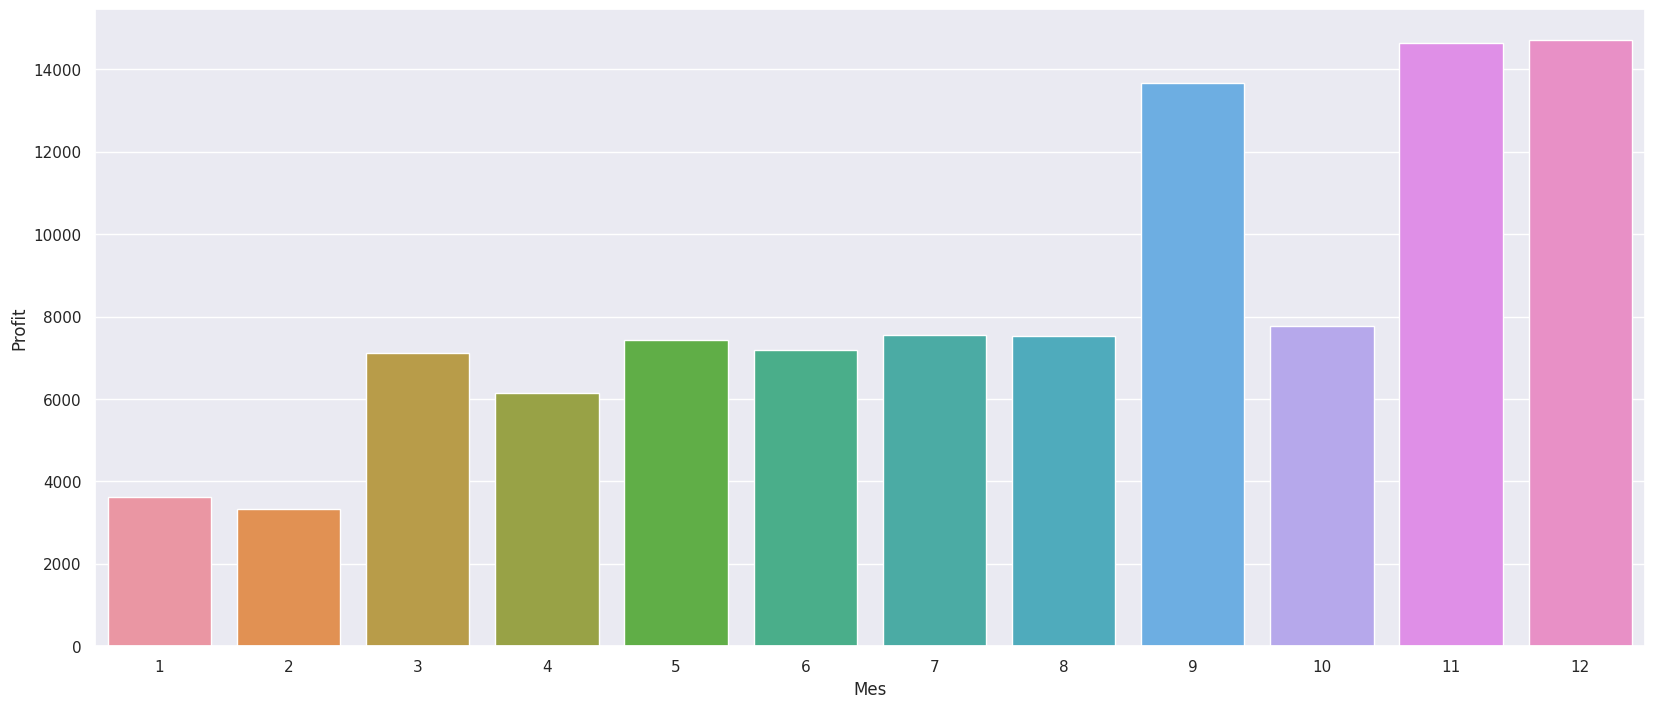

In [ ]:
#Gráfico comparando la variable con "Profit"
sns.set(rc={'figure.figsize':(20,8.27)})
sns.barplot(data=muestra_mes, x="Mes", y= "Profit")

<Axes: xlabel='Mes', ylabel='count'>

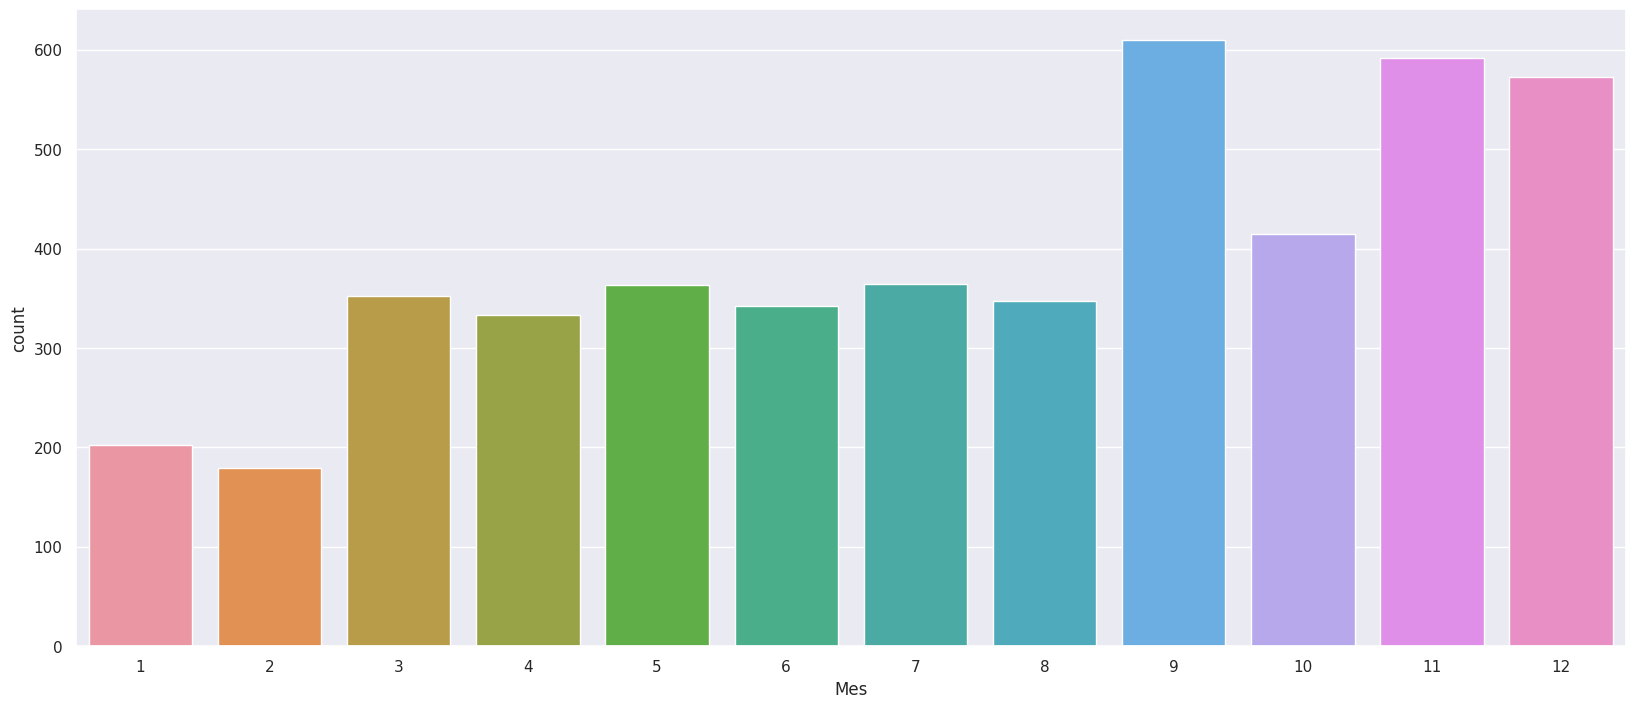

In [ ]:
#Gráfico de conteo de la variable
sns.countplot(data=df_graf_general, x="Mes")

##### Análisis Numérico

In [ ]:
#Resumen Numérico
muestra_mes.describe()

Mes        Profit
count  12.000000     12.000000
mean    6.500000   8394.098817
std     3.605551   3883.096445
min     1.000000   3342.904900
25%     3.750000   6868.025375
50%     6.500000   7483.035800
75%     9.250000   9250.957800
max    12.000000  14718.153500

##### Insights

Se observa claramente que los meses en los que mayor cantidad de ventas se generan y, a su vez, mayor cantidad de ganancias se generan son:
* Septiembre
* Noviembre
* Diciembre

#### Category

##### Gráfico

In [ ]:
#Creación Dataframe con la información deseada
muestra_category = df_graf_general.groupby('Category')['Profit'].sum().reset_index()
muestra_category

Category      Profit
0        Furniture  18507.2580
1  Office Supplies  59357.7168
2       Technology  22864.2110

<Axes: xlabel='Category', ylabel='Profit'>

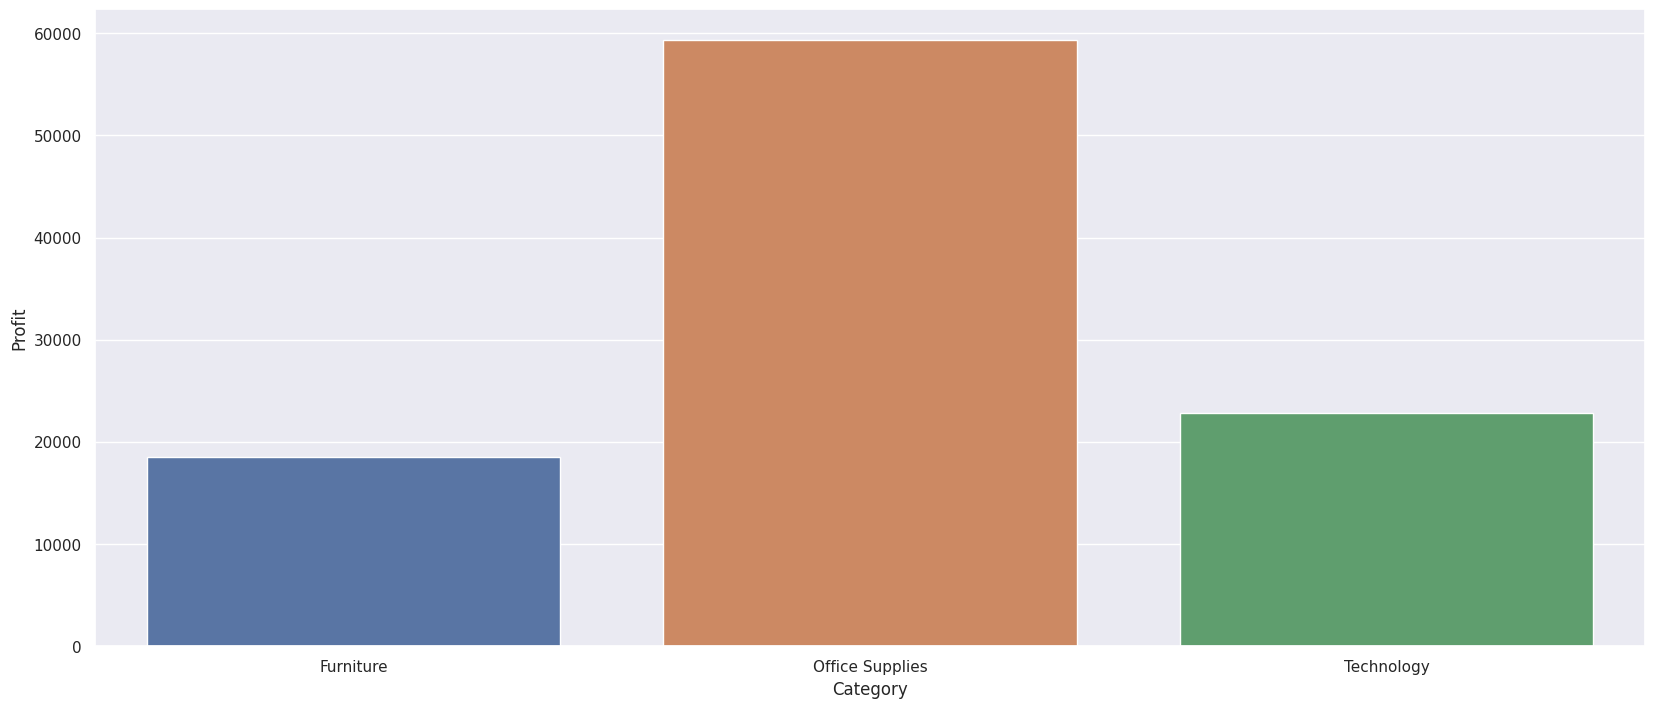

In [ ]:
#Gráfico comparando la variable con "Profit"
sns.set(rc={'figure.figsize':(20,8.27)})
sns.barplot(data=muestra_category, x="Category", y= "Profit")

<Axes: xlabel='Category', ylabel='count'>

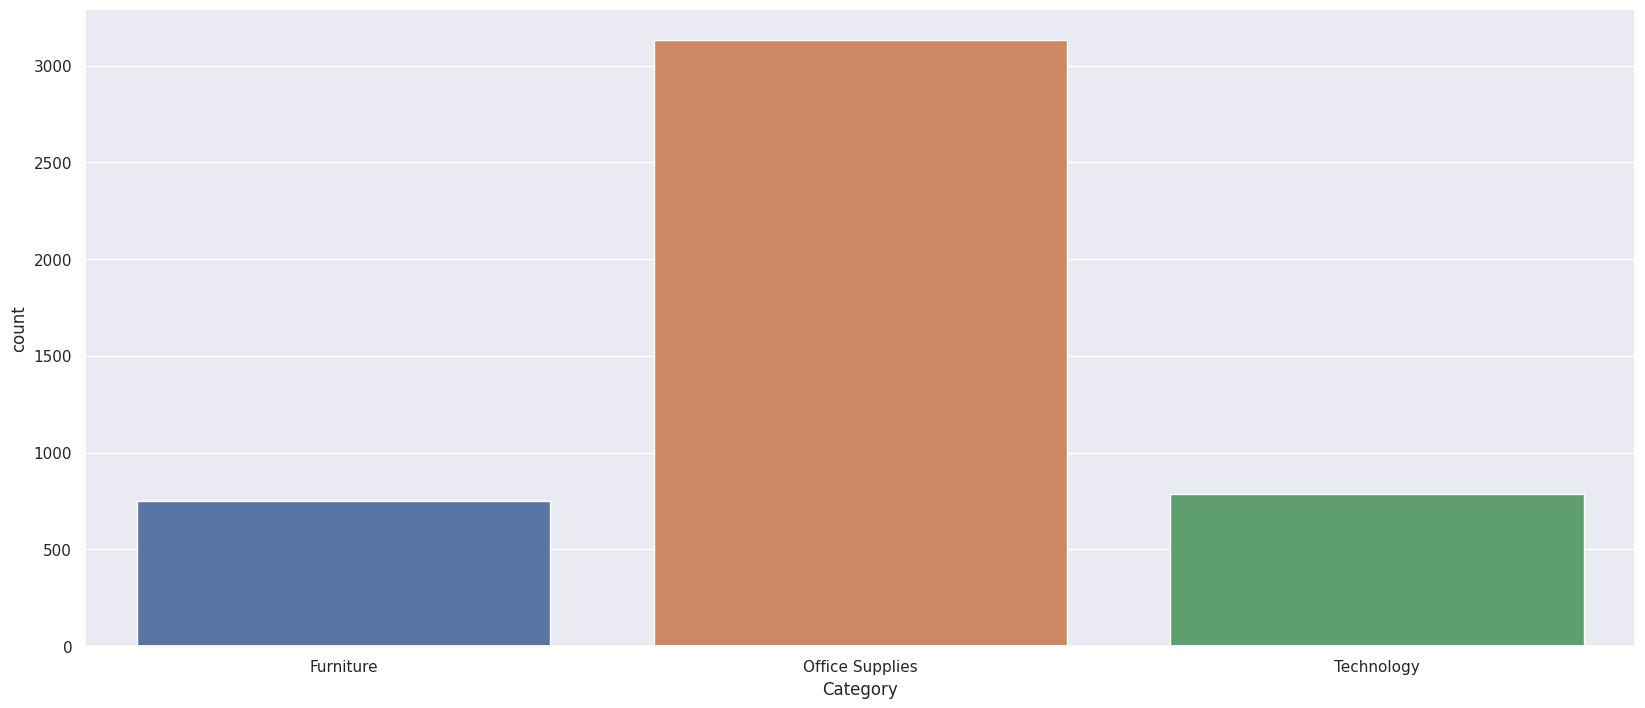

In [ ]:
#Gráfico de conteo de la variable
sns.countplot(data=df_graf_general, x="Category")

##### Análisis Numérico

In [ ]:
#Resumen Numérico
muestra_category.describe()

Profit
count      3.000000
mean   33576.395267
std    22433.304814
min    18507.258000
25%    20685.734500
50%    22864.211000
75%    41110.963900
max    59357.716800

##### Insights

* Los suplementos de oficina son los productos que más se venden y mayor ganancia generan por mucho.  

#### Sub Category

##### Gráfico

In [ ]:
#Creación Dataframe con la información deseada
muestra_scategory = df_graf_general.groupby('Sub-Category')['Profit'].sum().reset_index()
muestra_scategory

Sub-Category      Profit
0   Accessories  11717.9921
1    Appliances   6111.5979
2           Art   5579.6470
3       Binders  12019.9719
4     Bookcases   1794.1806
5        Chairs   4521.1851
6       Copiers    179.9940
7     Envelopes   3816.8839
8     Fasteners    910.6942
9   Furnishings  11018.4907
10       Labels   3497.3243
11     Machines    462.3857
12        Paper  19509.8733
13       Phones  10503.8392
14      Storage   6916.1103
15     Supplies    995.6140
16       Tables   1173.4016

<Axes: xlabel='Sub-Category', ylabel='Profit'>

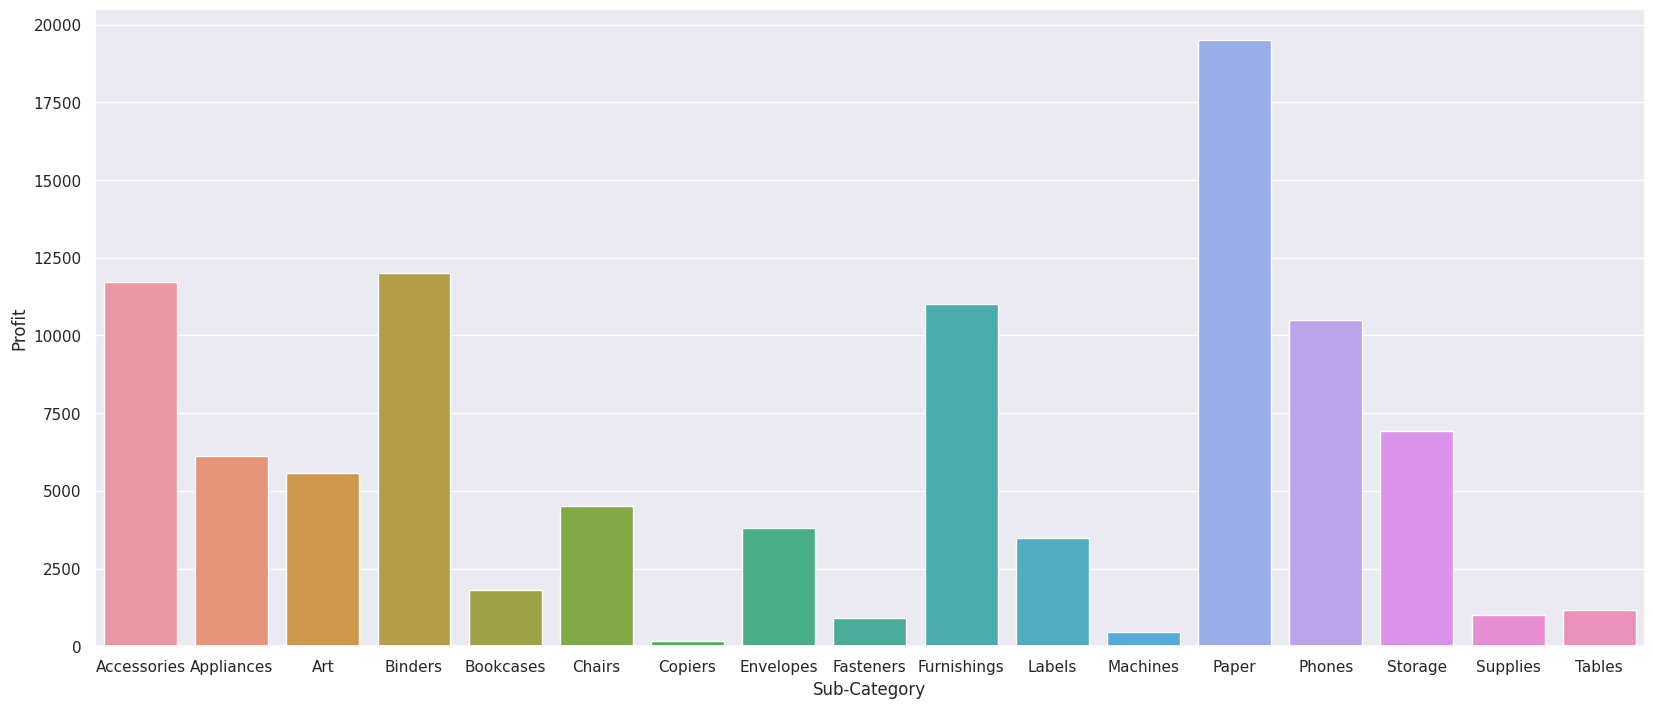

In [ ]:
#Gráfico comparando la variable con "Profit"
sns.set(rc={'figure.figsize':(20,8.27)})
sns.barplot(data=muestra_scategory, x="Sub-Category", y= "Profit")

<Axes: xlabel='Sub-Category', ylabel='count'>

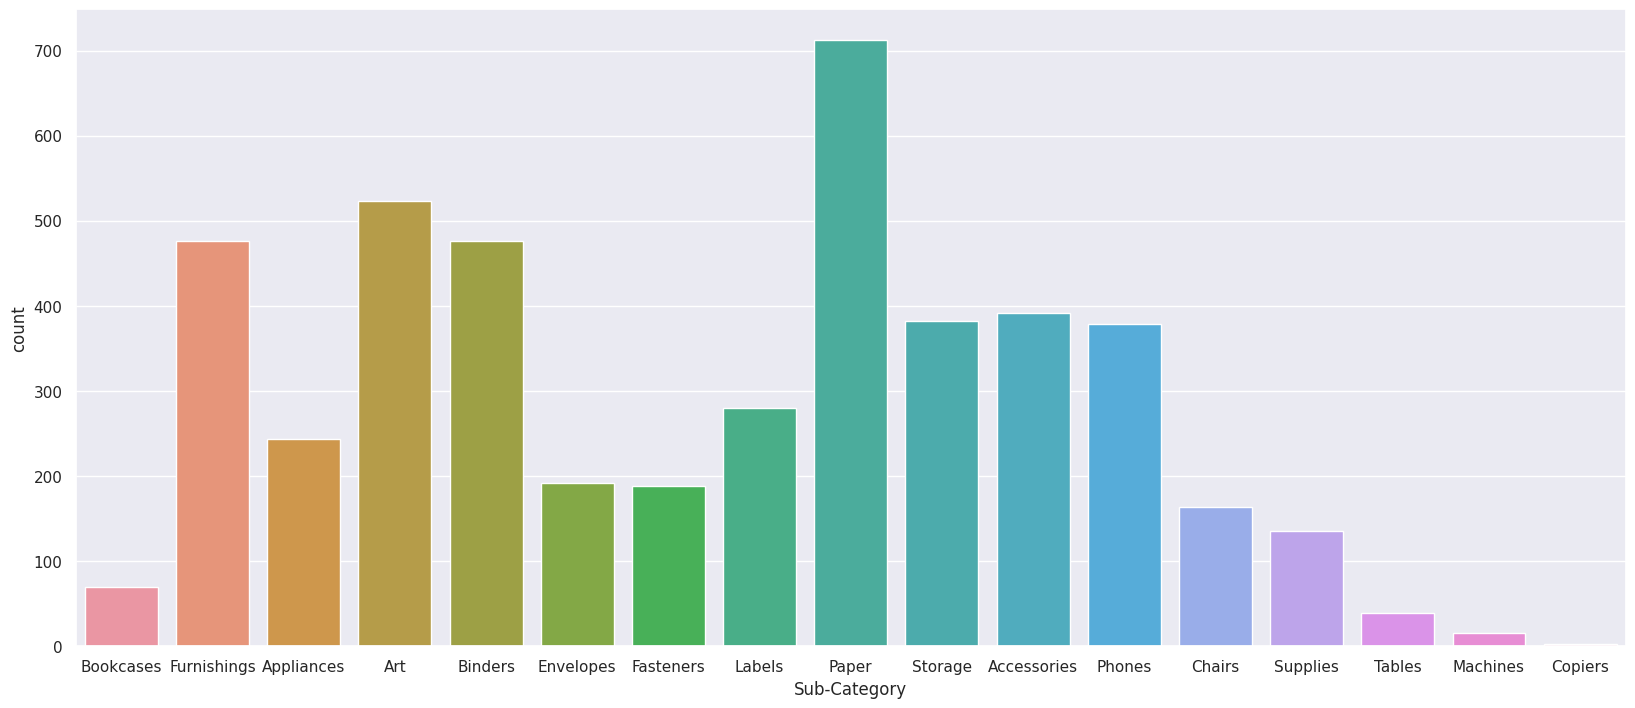

In [ ]:
#Gráfico de conteo de la variable
sns.countplot(data=df_graf_general, x="Sub-Category")

##### Análisis Numérico

In [ ]:
#Resumen Numérico
muestra_scategory.describe()

Profit
count     17.000000
mean    5925.246224
std     5405.663684
min      179.994000
25%     1173.401600
50%     4521.185100
75%    10503.839200
max    19509.873300

##### Insights

* La Sub Categoría que más ganancias genera es la de "Paper". 
* En un segundo escalón de los productos que más ganancias generan se encuentran las Sub Categorías de "Furnishings", "Accesories", "Binders", "Phones".
* Los productos más vendidos son de las Sub Categorías de "Paper" por mucho, y en un segundo escalón, "Binders", "Art" y "Furnishings".

#### Ship Mode

##### Gráfico

In [ ]:
#Creación Dataframe con la información deseada
muestra_modo = df_graf_general.groupby('Ship Mode')['Profit'].sum().reset_index()
muestra_modo

Ship Mode      Profit
0     First Class  15811.7090
1        Same Day   5065.8099
2    Second Class  19530.7607
3  Standard Class  60320.9062

<Axes: xlabel='Ship Mode', ylabel='Profit'>

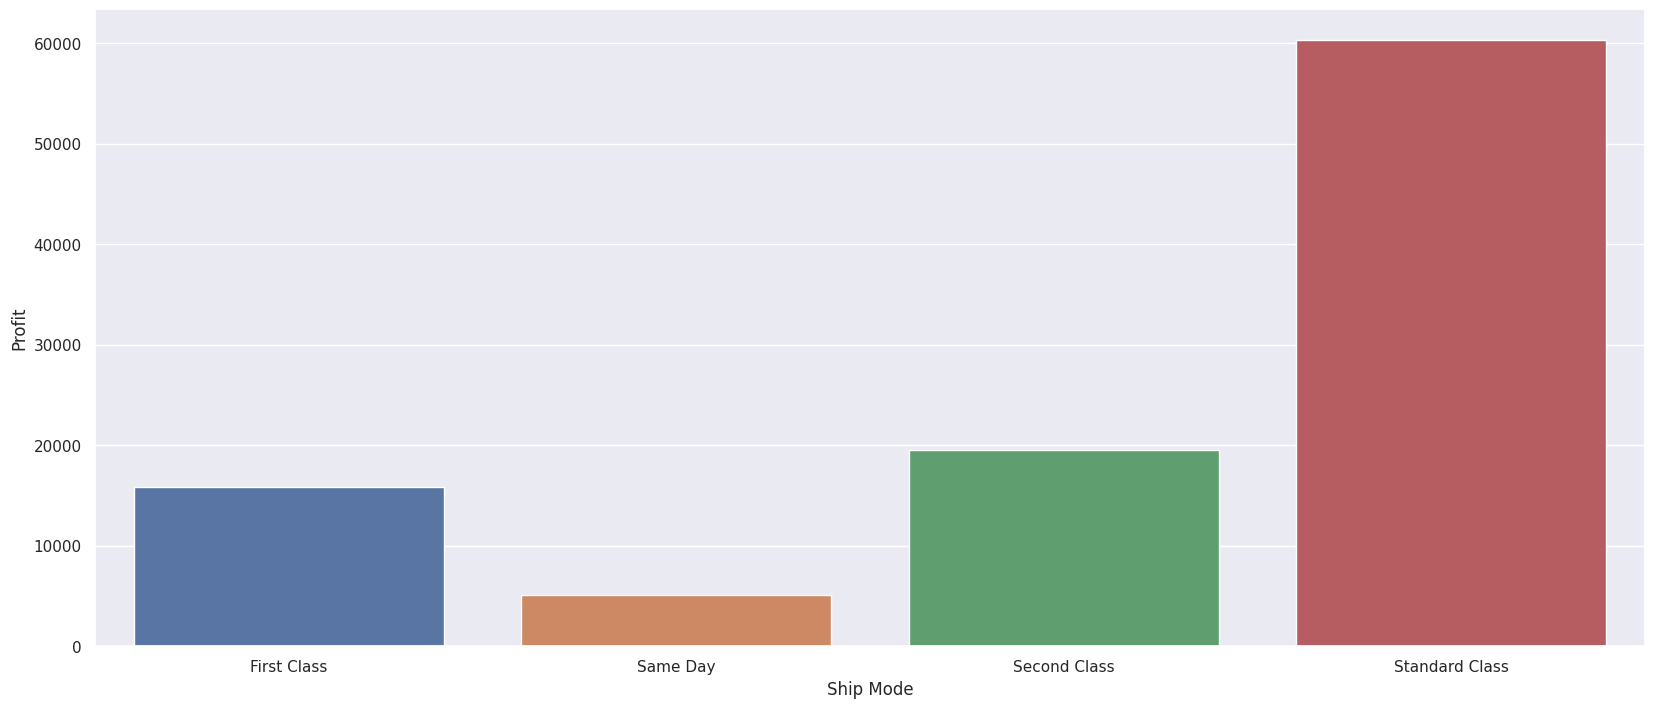

In [ ]:
#Gráfico comparando la variable con "Profit"
sns.set(rc={'figure.figsize':(20,8.27)})
sns.barplot(data=muestra_modo, x="Ship Mode", y= "Profit")

<Axes: xlabel='Ship Mode', ylabel='count'>

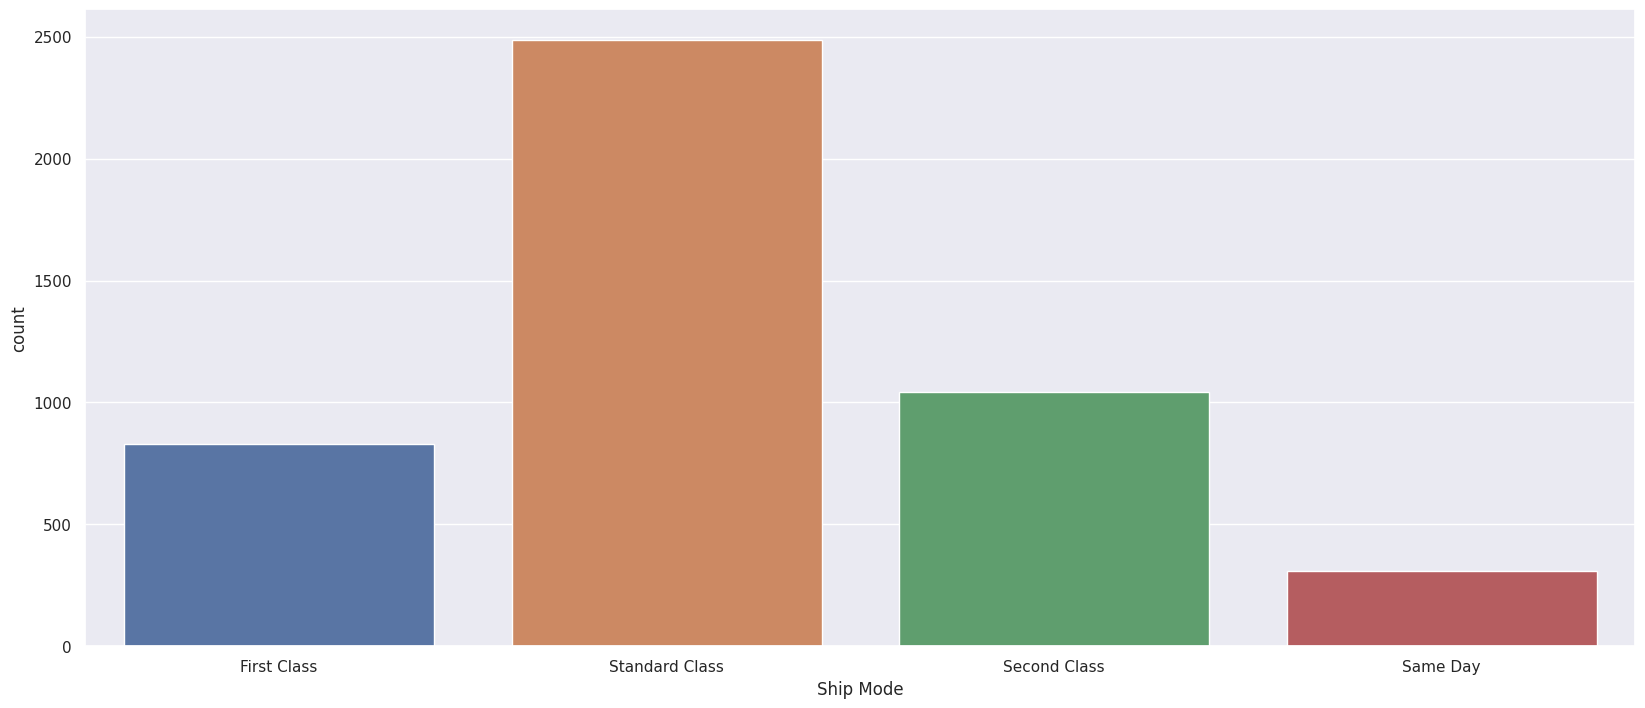

In [ ]:
#Gráfico de conteo de la variable
sns.countplot(data=df_graf_general, x="Ship Mode")

##### Análisis Numérico

In [ ]:
#Resumen Numérico
muestra_modo.describe()

Profit
count      4.000000
mean   25182.296450
std    24215.302956
min     5065.809900
25%    13125.234225
50%    17671.234850
75%    29728.297075
max    60320.906200

##### Insights

* El Modo de Envío "Standard Class" es el más común y el que más ganancias genera por mucho.
* El Modo de Envío "Same Day" es el menos frecuente y el que menos ganancias genera por mucho.

#### Segment

##### Gráfico

In [ ]:
#Creación Dataframe con la información deseada
muestra_segmento = df_graf_general.groupby('Segment')['Profit'].sum().reset_index()
muestra_segmento

Segment      Profit
0     Consumer  52416.0177
1    Corporate  30117.2039
2  Home Office  18195.9642

<Axes: xlabel='Segment', ylabel='Profit'>

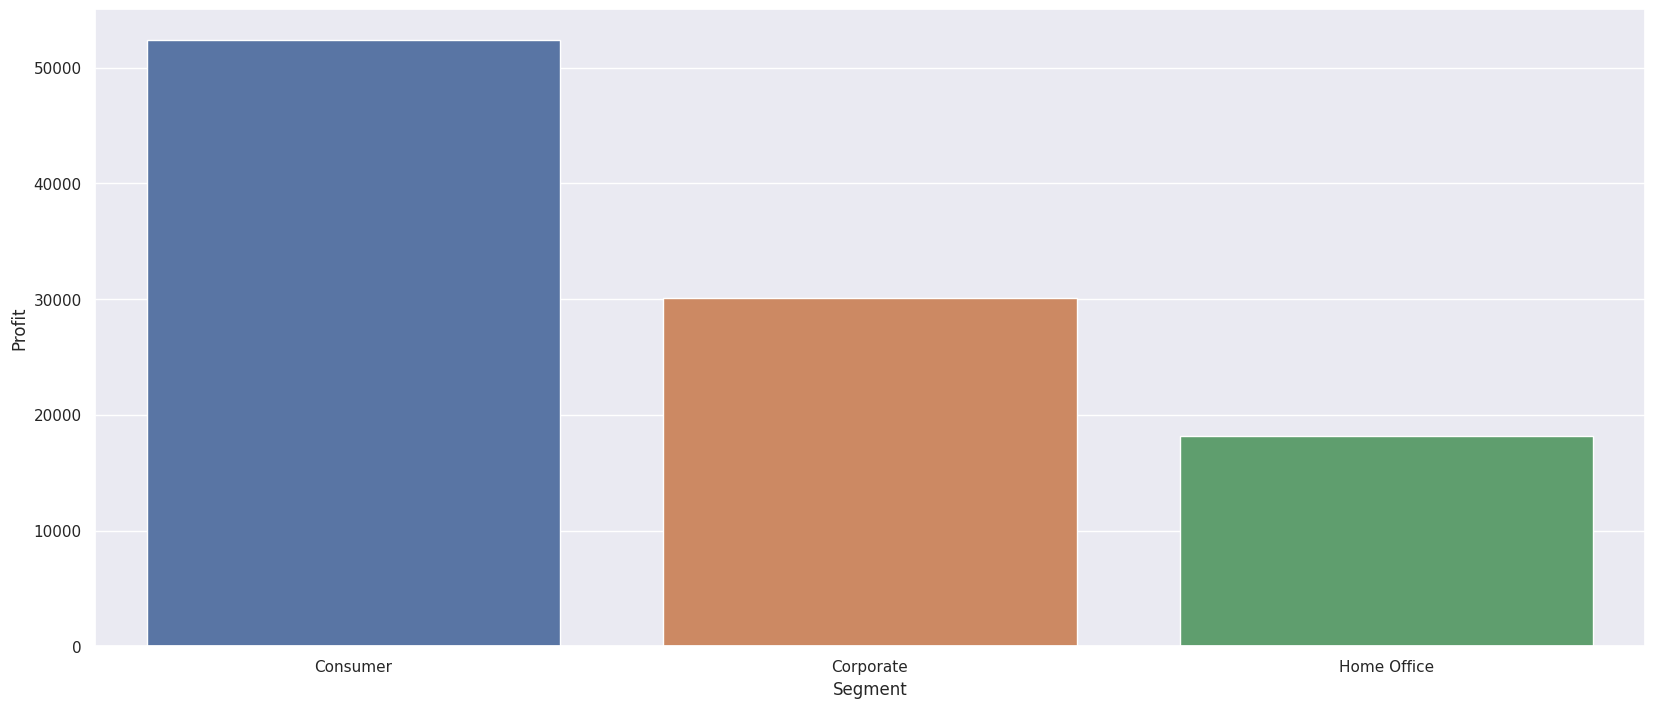

In [ ]:
#Gráfico comparando la variable con "Profit"
sns.set(rc={'figure.figsize':(20,8.27)})
sns.barplot(data=muestra_segmento, x="Segment", y= "Profit")

<Axes: xlabel='Segment', ylabel='count'>

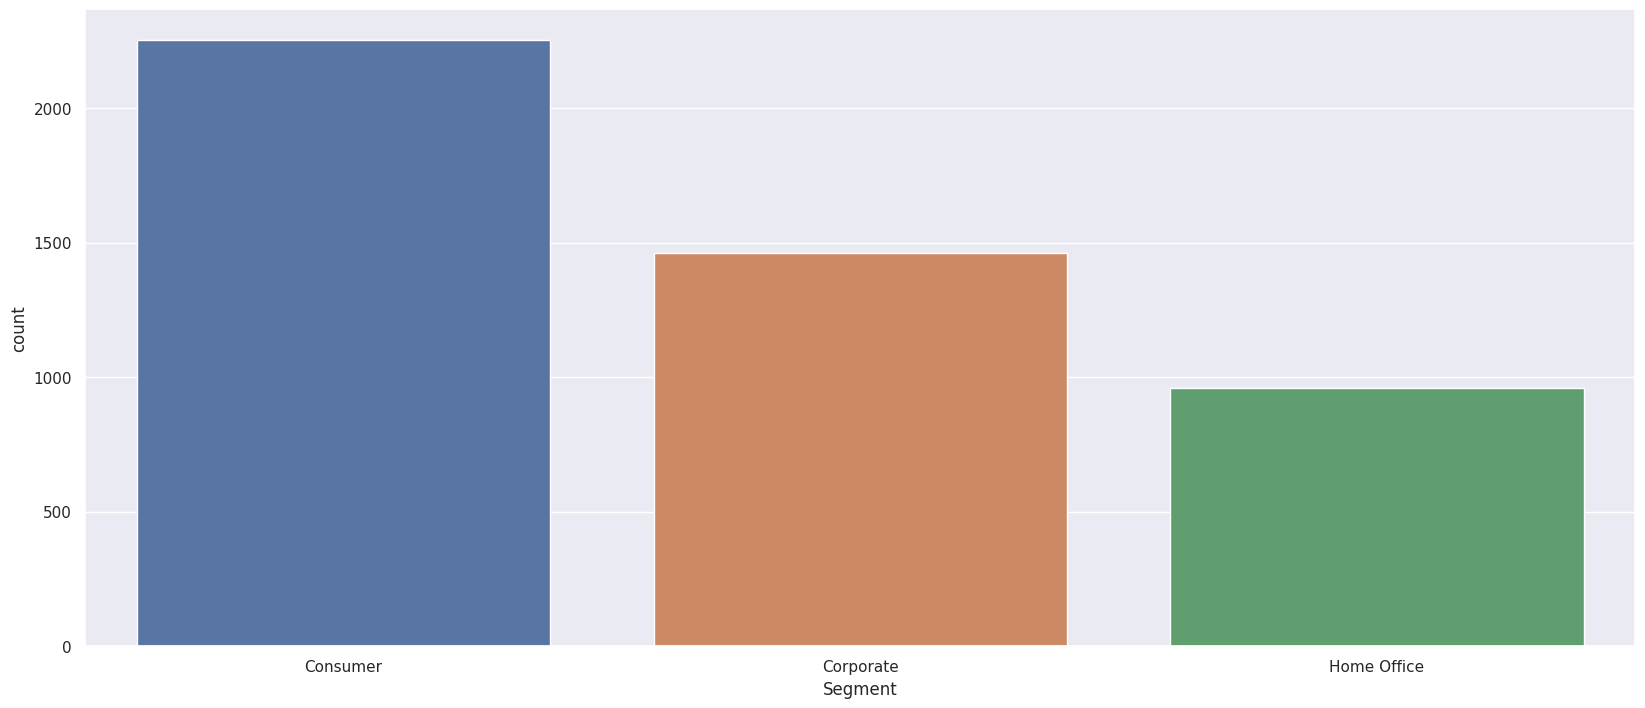

In [ ]:
#Gráfico de conteo de la variable
sns.countplot(data=df_graf_general, x="Segment")

##### Análisis Numérico

In [ ]:
#Resumen Numérico
muestra_segmento.describe()

Profit
count      3.000000
mean   33576.395267
std    17370.305670
min    18195.964200
25%    24156.584050
50%    30117.203900
75%    41266.610800
max    52416.017700

##### Insights

* El Segmento de Clientes que más ventas y ganancias genera es el de "Consumer".
* El Segmento de Clientes que menos ventas y ganancias genera es el de "Home Office".

#### Region

##### Gráfico

In [ ]:
#Creación Dataframe con la información deseada
muestra_region = df_graf_general.groupby('Region')['Profit'].sum().reset_index()
muestra_region

Region      Profit
0  Central  19543.2802
1     East  27682.5793
2    South  16628.3831
3     West  36874.9432

<Axes: xlabel='Region', ylabel='Profit'>

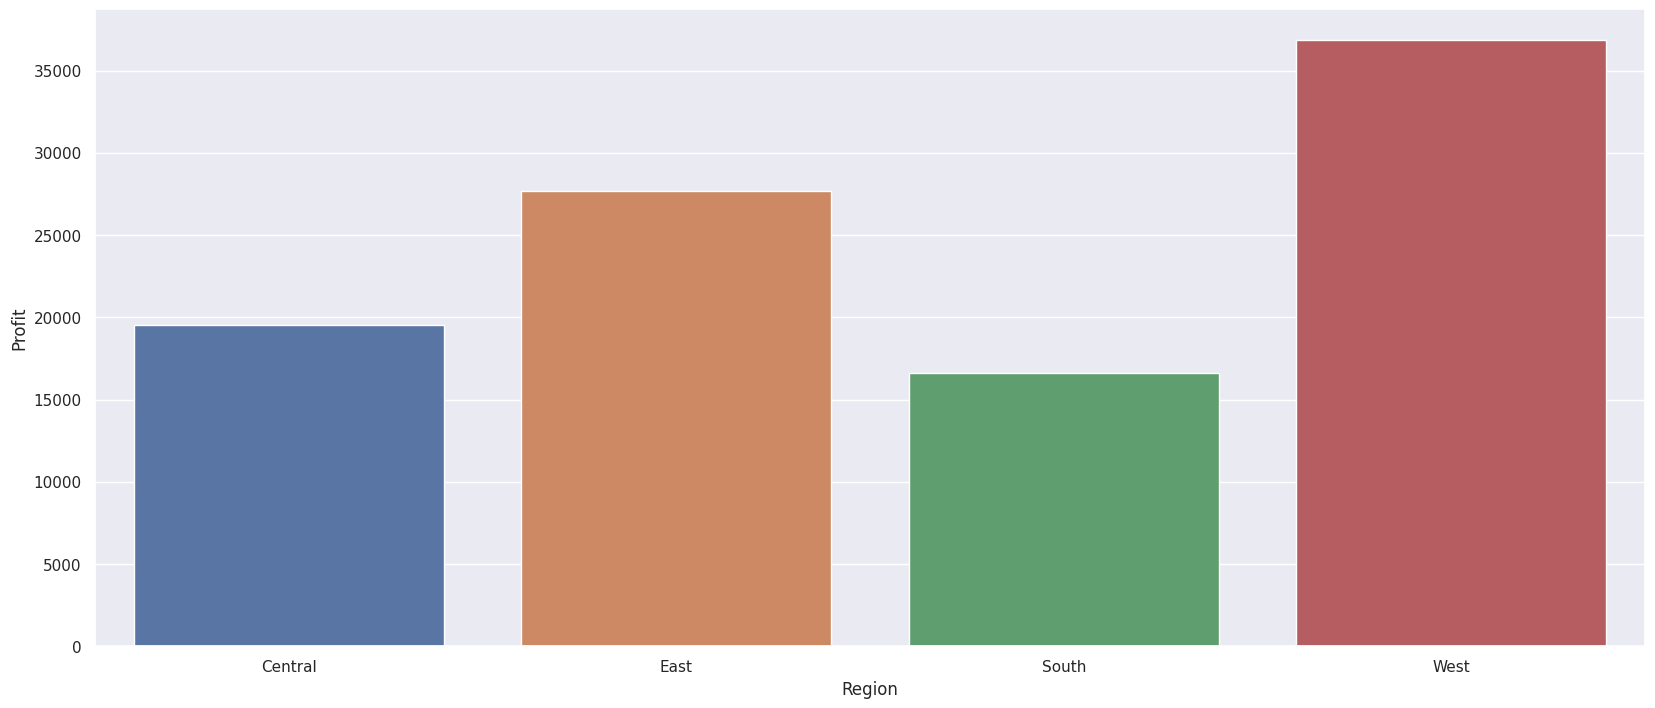

In [ ]:
#Gráfico comparando la variable con "Profit"
sns.set(rc={'figure.figsize':(20,8.27)})
sns.barplot(data=muestra_region, x="Region", y= "Profit")

<Axes: xlabel='Region', ylabel='count'>

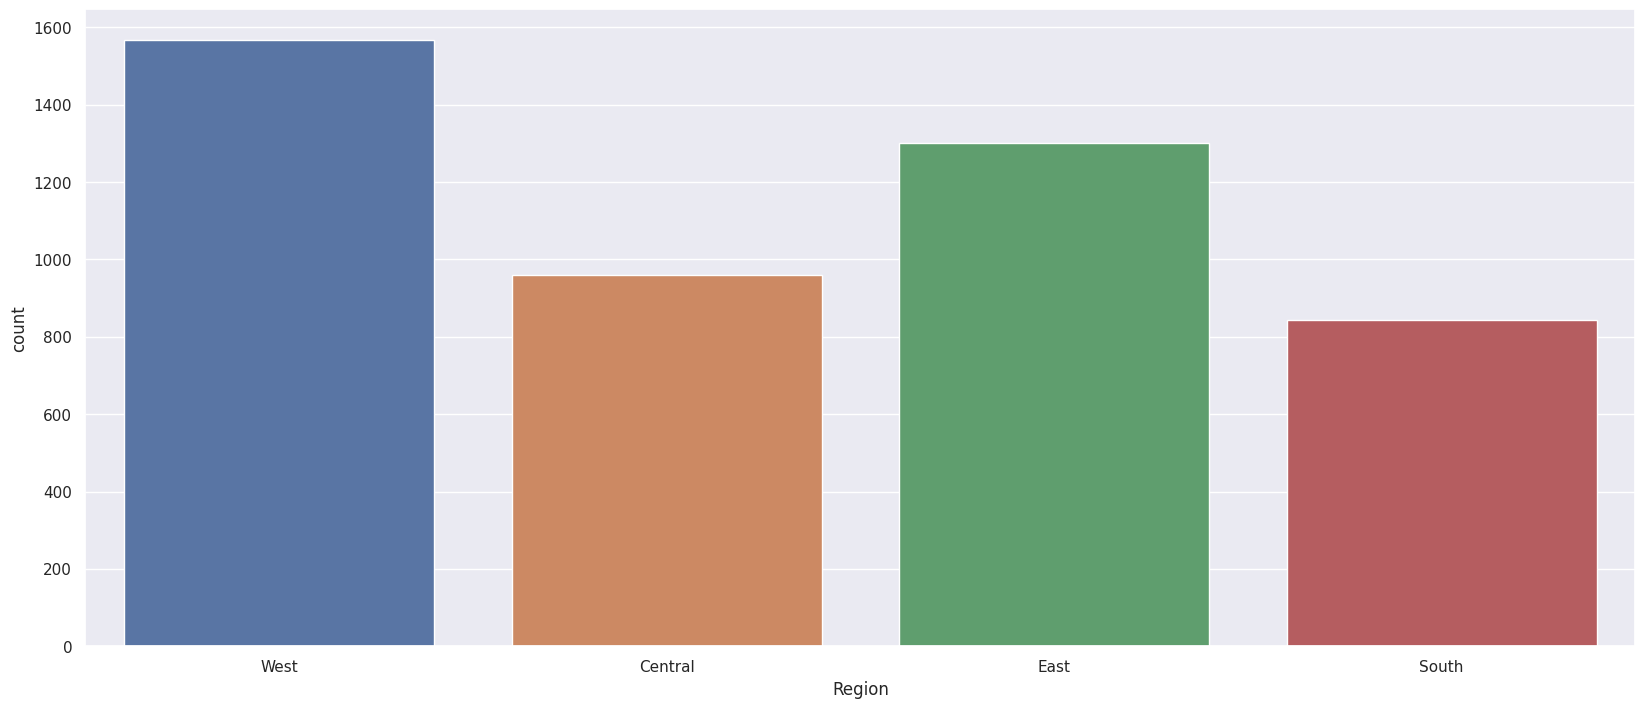

In [ ]:
#Gráfico de conteo de la variable
sns.countplot(data=df_graf_general, x="Region")

##### Análisis Numérico

In [ ]:
#Resumen Numérico
muestra_region.describe()

Profit
count      4.000000
mean   25182.296450
std     9090.972449
min    16628.383100
25%    18814.555925
50%    23612.929750
75%    29980.670275
max    36874.943200

##### Insights

* La región que más ganancias y cantidad de ventas genera es la "West", se destaca la diferencia de ganancias obtenidas a pesar de no vender mucho más que la zona "East".


### Modelo de Regresión

#### Preparación

In [ ]:
#Copia del dataframe de la sección de "Agrupamiento de Datos"
agrup_general_fs = df_agrup_general

Una vez realizado un análisis visual de los datos agrupados previamente, se procede a crear modelos con este conjunto de datos y comparar los rendimientos de los mismos. Cabe recordar que todos son modelos de regresión para predecir el valor de la variable "Profit".

Se debe aclarar también, que la métrica que se utilizará para comprar el rendimiento de los modelos es la de R-Cuadrado o R2.  

R2 indica la bondad o la aptitud del modelo, a menudo se utiliza con fines descriptivos y muestra que tan bién las variables independientes seleccionadas explican la variabilidad en sus variables dependientes. 
R-cuadrado tiene la propiedad útil de que su escala es intuitiva, va de 0 a 1, con 0 indicando que el modelo propuesto no mejora la predicción sobre el modelo medido y 1 indica una predicción perfecta. 

Para poder utlizar los datos en los modelos, el conjunto de datos solo debe contener valores numéricos, es decir, que las variables categóricas deben llevarse a valores numéricos.  
Para llevar a cabo ese proceso se utilizará el método de Pandas llamado "get_dummies", que se encarga de tomar cada posible valor de cada variable categórica y convertirlo en una propia variable booleana que toma valor de 1 si el registro contiene ese valor o 0 si no lo contiene.

In [ ]:
#Conversión de variables categóricas a numéricas con "get_dummies"
agrup_general_fs = pd.get_dummies(data=agrup_general_fs)
agrup_general_fs

Anio  Mes     Sales  Product Quantity  Sales Quantity  Discount  \
0     2014    1   290.666                 2               1      0.15   
1     2014    1   141.960                 2               1      0.00   
2     2014    1   333.999                 3               1      0.15   
3     2014    1     9.940                 2               1      0.00   
4     2014    1   127.104                 6               1      0.20   
...    ...  ...       ...               ...             ...       ...   
4667  2017   12  1926.248                19               6      0.20   
4668  2017   12   128.850                 3               1      0.00   
4669  2017   12   116.656                 6               2      0.20   
4670  2017   12    52.680                 3               1      0.20   
4671  2017   12    62.958                 7               1      0.40   

        Profit  Category_Furniture  Category_Office Supplies  \
0       3.4196                   1                         0   
1      39.7488                   1                         0   
2       3.9294                   1                         0   
3       3.0814                   1                         0   
4      28.5984                   1                         0   
...        ...                 ...                       ...   
4667  174.5467                   0                         0   
4668    3.8655                   0                         0   
4669   11.6656                   0                         0   
4670   19.7550                   0                         0   
4671    9.4437                   0                         0   

      Category_Technology  ...  Ship Mode_Same Day  Ship Mode_Second Class  \
0                       0  ...                   0                       0   
1                       0  ...                   0                       0   
2                       0  ...                   0                       0   
3                       0  ...                   0                       0   
4                       0  ...                   0                       1   
...                   ...  ...                 ...                     ...   
4667                    1  ...                   0                       0   
4668                    1  ...                   0                       0   
4669                    1  ...                   0                       0   
4670                    1  ...                   0                       0   
4671                    1  ...                   0                       0   

      Ship Mode_Standard Class  Segment_Consumer  Segment_Corporate  \
0                            0                 1                  0   
1                            0                 0                  1   
2                            1                 1                  0   
3                            0                 1                  0   
4                            0                 1                  0   
...                        ...               ...                ...   
4667                         1                 1                  0   
4668                         1                 0                  1   
4669                         1                 0                  1   
4670                         1                 0                  0   
4671                         1                 0                  0   

      Segment_Home Office  Region_Central  Region_East  Region_South  \
0                       0               0            0             0   
1                       0               1            0             0   
2                       0               0            0             0   
3                       0               0            1             0   
4                       0               0            1             0   
...                   ...             ...          ...           ...   
4667                    0               0            0            

Antes que nada, se debe convertir el tipo de dato de la variable de años para poder ser tratados por los algoritmos siguientes.

In [ ]:
# Conversión de la variable "Anio" a integer
agrup_general_fs["Anio"] = agrup_general_fs["Anio"].astype(int)

A continuación, se procede a Normalizar los valores a utilizar en el modelo para que se encuentren en la misma escala (entre 0 y 1).

In [ ]:
#Función para normalizar valores
def min_max_scaling(series):
    return (series - series.min()) / (series.max() - series.min())

In [ ]:
#Ejecución de la función de Normalización en las variables no objetivo
for col in agrup_general_fs.columns:
 agrup_general_fs[col] = min_max_scaling(agrup_general_fs[col])

Una vez preparados los datos, se procederá a crear los modelos con los siguientes algoritmos:

#### Regresión Linear

A continuación se llevará a cabo una "Feature Selection", que consiste en obtener las variables de los datos que maximicen el valor de "r2" a la hora de predecir el valor de "Profit", es decir utilizar las columnas que permiten tener un mejor rendimiento con el algoritmo elegido.

In [ ]:
#Ejecución de la "Feature Selection"
lr = LinearRegression()
sfs_general_lr = SFS(lr, scoring= 'r2')
sfs_general_lr = sfs_general_lr.fit(agrup_general_fs.drop(["Profit"], axis=1), agrup_general_fs["Profit"])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_sequential.py:211: FutureWarning: Leaving `n_features_to_select` to None is deprecated in 1.0 and will become 'auto' in 1.3. To keep the same behaviour as with None (i.e. select half of the features) and avoid this warning, you should manually set `n_features_to_select='auto'` and set tol=None when creating an instance.
  warnings.warn(


Una vez ejecutada la "Feature Selection", se procede a obtener los nombres de las features que maximizan el rendimiento del modelo.

In [ ]:
#Obtención de los features seleccionados por el algoritmo
lr_general_features = sfs_general_lr.get_feature_names_out()
lr_general_features

array(['Sales', 'Product Quantity', 'Sales Quantity', 'Discount',
       'Sub-Category_Accessories', 'Sub-Category_Appliances',
       'Sub-Category_Art', 'Sub-Category_Binders',
       'Sub-Category_Bookcases', 'Sub-Category_Chairs',
       'Sub-Category_Envelopes', 'Sub-Category_Fasteners',
       'Sub-Category_Machines', 'Sub-Category_Paper',
       'Sub-Category_Storage', 'Sub-Category_Supplies',
       'Sub-Category_Tables', 'Region_West'], dtype=object)

Una vez determinadas las variables a utilizar en el modelo, se separa por un lado la variable objetivo u target que se busca predecir, en este caso "Profit" que representa el beneficio o ganacia en cada pedido. Y, por otro lado todas las variables/columnas seleccionadas por el algoritmo de "Feature Selection".

In [ ]:
#Variables No Objetivo 
x_general_lr = agrup_general_fs.filter(lr_general_features, axis=1)
#Varible objetivo/target
y_general_lr = agrup_general_fs["Profit"]

Los valores se deben dividir por un lado en datos de entrenamiento y por otro lado en datos de prueba.

In [ ]:
#División de los datos entre prueba (30%) y entrenamiento (70%)
x_general_train, x_general_test, y_general_train, y_general_test = train_test_split(x_general_lr, y_general_lr, test_size=0.30, random_state=101)

Una vez divididos los datos, se procede a crear el modelo propiamente dicho.

In [ ]:
#Creación de Modelo
model_general_rl = LinearRegression()
model_general_rl.fit(x_general_train,y_general_train)

LinearRegression()

In [ ]:
#Obtención de Predicciones del modelo
predictions_general_rl = model_general_rl.predict(x_general_test)
predictions_general_rl

array([0.05267561, 0.09936565, 0.08346046, ..., 0.07256561, 0.07606699,
       0.00772574])

Una vez entrenado el modelo, se procede a evaluar el mismo. En este caso se utilizó como métrica de evaluación a "R Cuadrado (R2)".

In [ ]:
#Obtención de Métricas de Evaluación
x_general_train2 = sm.add_constant(x_general_train)
model_general_rl = sm.OLS(y_general_train, x_general_train2).fit()


print_model_general_rl = model_general_rl.summary()
print(print_model_general_rl)

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     386.1
Date:                Tue, 06 Jun 2023   Prob (F-statistic):               0.00
Time:                        02:38:03   Log-Likelihood:                 4296.1
No. Observations:                3270   AIC:                            -8554.
Df Residuals:                    3251   BIC:                            -8438.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

<Axes: xlabel='Profit'>

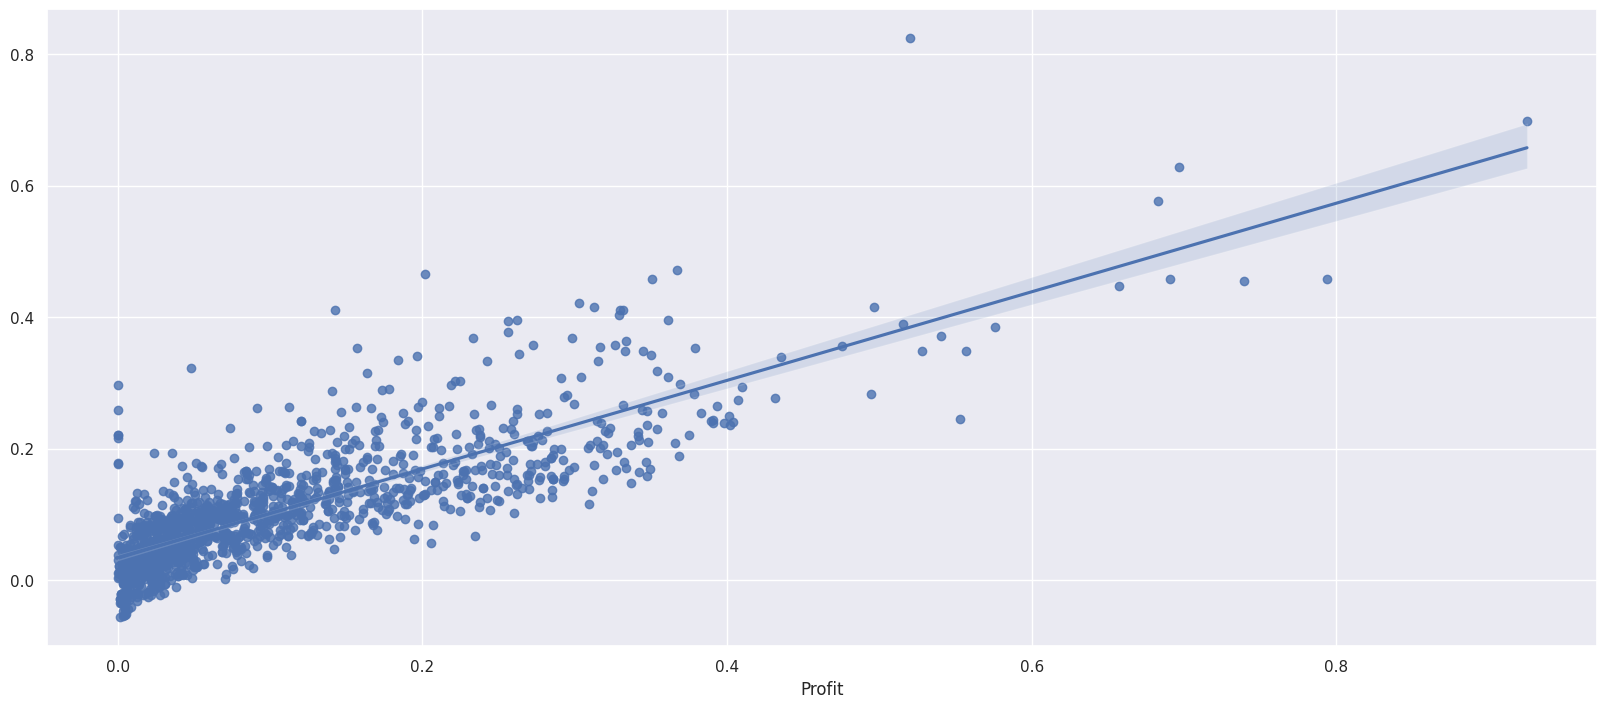

In [ ]:
#Gráfico de las predicciones realizadas
sns.regplot(x = y_general_test, y = predictions_general_rl)

#### Decision Trees

A continuación se llevará a cabo una "Feature Selection", que consiste en obtener las variables de los datos que maximicen el valor de "r2" a la hora de predecir el valor de "Profit", es decir utilizar las columnas que permiten tener un mejor rendimiento con el algoritmo elegido.

In [ ]:
#Ejecución de la "Feature Selection"
dt = DecisionTreeRegressor()
sfs_general_dt = SFS(dt, scoring= 'r2')
sfs_general_dt = sfs_general_dt.fit(agrup_general_fs.drop(["Profit"], axis=1), agrup_general_fs["Profit"])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_sequential.py:211: FutureWarning: Leaving `n_features_to_select` to None is deprecated in 1.0 and will become 'auto' in 1.3. To keep the same behaviour as with None (i.e. select half of the features) and avoid this warning, you should manually set `n_features_to_select='auto'` and set tol=None when creating an instance.
  warnings.warn(


Una vez ejecutada la "Feature Selection", se procede a obtener los nombres de las features que maximizan el rendimiento del modelo.

In [ ]:
#Obtención de los features seleccionados por el algoritmo
dt_general_features = sfs_general_dt.get_feature_names_out()
dt_general_features

array(['Sales', 'Sales Quantity', 'Discount', 'Category_Furniture',
       'Category_Office Supplies', 'Sub-Category_Accessories',
       'Sub-Category_Appliances', 'Sub-Category_Art',
       'Sub-Category_Bookcases', 'Sub-Category_Copiers',
       'Sub-Category_Fasteners', 'Sub-Category_Labels',
       'Sub-Category_Machines', 'Sub-Category_Phones',
       'Sub-Category_Storage', 'Sub-Category_Supplies',
       'Sub-Category_Tables', 'Region_Central'], dtype=object)

Una vez determinadas las variables a utilizar en el modelo, se separa por un lado la variable objetivo u target que se busca predecir, en este caso "Profit" que representa el beneficio o ganacia en cada pedido. Y, por otro lado todas las variables/columnas seleccionadas por el algoritmo de "Feature Selection".

In [ ]:
#Variables No Objetivo 
x_general_dt = agrup_general_fs.filter(dt_general_features, axis=1)
#Varible objetivo/target
y_general_dt = agrup_general_fs["Profit"]

Los valores se deben dividir por un lado en datos de entrenamiento y por otro lado en datos de prueba.

In [ ]:
#División de los datos entre prueba (30%) y entrenamiento (70%)
x_general_train, x_general_test, y_general_train, y_general_test = train_test_split(x_general_dt, y_general_dt, test_size=0.30, random_state=101)

Una vez divididos los datos, se procede a crear el modelo propiamente dicho.

In [ ]:
#Entrenamiento del Modelo
model_general_dt =  DecisionTreeRegressor(max_depth=9, random_state=20)
model_general_dt.fit(x_general_train, y_general_train)

DecisionTreeRegressor(max_depth=9, random_state=20)

In [ ]:
#Obtención de Predicciones del modelo
predictions_general_dt = model_general_dt.predict(x_general_test)
predictions_general_dt

array([0.09979047, 0.10235718, 0.11422563, ..., 0.06131451, 0.00983571,
       0.00202003])

Una vez entrenado el modelo, se procede a evaluar el mismo. En este caso se utilizó como métrica de evaluación a "R Cuadrado (R2)".

In [ ]:
# Métrica R2
r2 = r2_score(y_general_test, predictions_general_dt)
print('R-squared scores:', round(r2, 2))

R-squared scores: 0.71


<Axes: xlabel='Profit'>

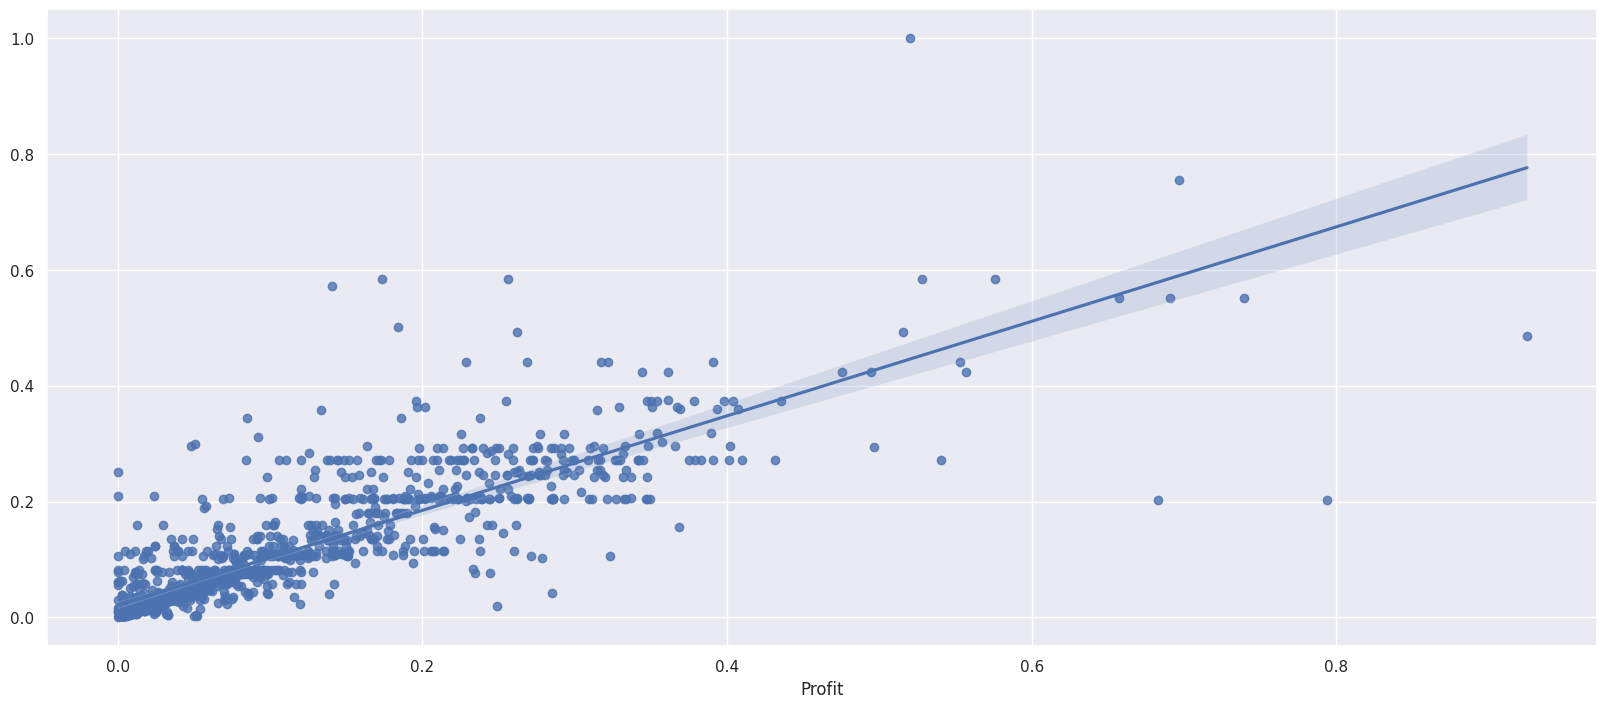

In [ ]:
#Gráfico de las predicciones realizadas
sns.regplot(x = y_general_test, y = predictions_general_dt)

In [ ]:
# Obtener los nombres de las características
features_general_dt = list(x_general_test.columns)

# Obtener la importancia de las características
importance_general_dt = model_general_dt.feature_importances_

# Crear un DataFrame con los nombres de las características y su importancia
df_importance_general_dt = pd.DataFrame({'Feature': features_general_dt, 'Importance': importance_general_dt})

# Ordenar el DataFrame por importancia en orden descendente
df_importance_general_dt = df_importance_general_dt.sort_values('Importance', ascending=False)

# Imprimir los resultados
print(round(df_importance_general_dt,2))

                     Feature  Importance
0                      Sales        0.69
1             Sales Quantity        0.17
14      Sub-Category_Storage        0.03
2                   Discount        0.03
4   Sub-Category_Accessories        0.02
7     Sub-Category_Bookcases        0.01
17        Ship Mode_Same Day        0.01
15     Sub-Category_Supplies        0.01
6           Sub-Category_Art        0.01
3   Category_Office Supplies        0.01
13       Sub-Category_Phones        0.00
8        Sub-Category_Chairs        0.00
16       Sub-Category_Tables        0.00
5    Sub-Category_Appliances        0.00
12     Sub-Category_Machines        0.00
10    Sub-Category_Envelopes        0.00
11       Sub-Category_Labels        0.00
9       Sub-Category_Copiers        0.00


#### Random Forest

En el caso de "Random Forest" no es necesario llevar a cabo un proceso de "Feature Selction" propio por dos razones:  
* La primera es porque al tratarse de un algoritmo que trabaja con varios "Decision Trees" simplemente se pueden reutilizar los valores obtenidos del "Feature Selection" realizado en el algoritmo "Decision Trees". 
* La segunda razón es porque el tiempo de procesamiento necesario para realizar este proceso es demasiado alto.

In [ ]:
#Ejecución de la "Feature Selection"
dt = DecisionTreeRegressor()
sfs_general_dt = SFS(dt, scoring= 'r2')
sfs_general_dt = sfs_general_dt.fit(agrup_general_fs.drop(["Profit"], axis=1), agrup_general_fs["Profit"])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_sequential.py:211: FutureWarning: Leaving `n_features_to_select` to None is deprecated in 1.0 and will become 'auto' in 1.3. To keep the same behaviour as with None (i.e. select half of the features) and avoid this warning, you should manually set `n_features_to_select='auto'` and set tol=None when creating an instance.
  warnings.warn(


Una vez ejecutada la "Feature Selection", se procede a obtener los nombres de las features que maximizan el rendimiento del modelo.

In [ ]:
#Obtención de los features seleccionados por el algoritmo
rf_general_features = sfs_general_dt.get_feature_names_out()
rf_general_features

array(['Sales', 'Sales Quantity', 'Discount', 'Category_Office Supplies',
       'Sub-Category_Accessories', 'Sub-Category_Appliances',
       'Sub-Category_Art', 'Sub-Category_Bookcases',
       'Sub-Category_Chairs', 'Sub-Category_Copiers',
       'Sub-Category_Envelopes', 'Sub-Category_Labels',
       'Sub-Category_Machines', 'Sub-Category_Phones',
       'Sub-Category_Storage', 'Sub-Category_Supplies',
       'Sub-Category_Tables', 'Ship Mode_Same Day'], dtype=object)

Una vez determinadas las variables a utilizar en el modelo, se separa por un lado la variable objetivo u target que se busca predecir, en este caso "Profit" que representa el beneficio o ganacia en cada pedido. Y, por otro lado todas las variables/columnas seleccionadas por el algoritmo de "Feature Selection".

In [ ]:
#Variables No Objetivo 
x_general_rf = agrup_general_fs.filter(rf_general_features, axis=1)
#Varible objetivo/target
y_general_rf = agrup_general_fs["Profit"]

Los valores se deben dividir por un lado en datos de entrenamiento y por otro lado en datos de prueba.

In [ ]:
#División de los datos entre prueba (30%) y entrenamiento (70%)
x_general_train, x_general_test, y_general_train, y_general_test = train_test_split(x_general_rf, y_general_rf, test_size=0.30, random_state=101)

Una vez divididos los datos, se procede a crear el modelo propiamente dicho.

In [ ]:
#Entrenamiento del Modelo
model_general_rf = RandomForestRegressor(n_estimators = 50, random_state = 101)
model_general_rf.fit(x_general_train, y_general_train) 

RandomForestRegressor(n_estimators=50, random_state=101)

In [ ]:
#Obtención de Predicciones del modelo
predictions_general_rf = model_general_rf.predict(x_general_test)
predictions_general_rf

array([0.1001603 , 0.10496727, 0.19709231, ..., 0.05355363, 0.01121626,
       0.00647495])

Una vez entrenado el modelo, se procede a evaluar el mismo. En este caso se utilizó como métrica de evaluación a "R Cuadrado (R2)".

In [ ]:
# Métrica R2
r2 = r2_score(y_general_test, predictions_general_rf)
print('R-squared scores:', round(r2, 2))

R-squared scores: 0.81


<Axes: xlabel='Profit'>

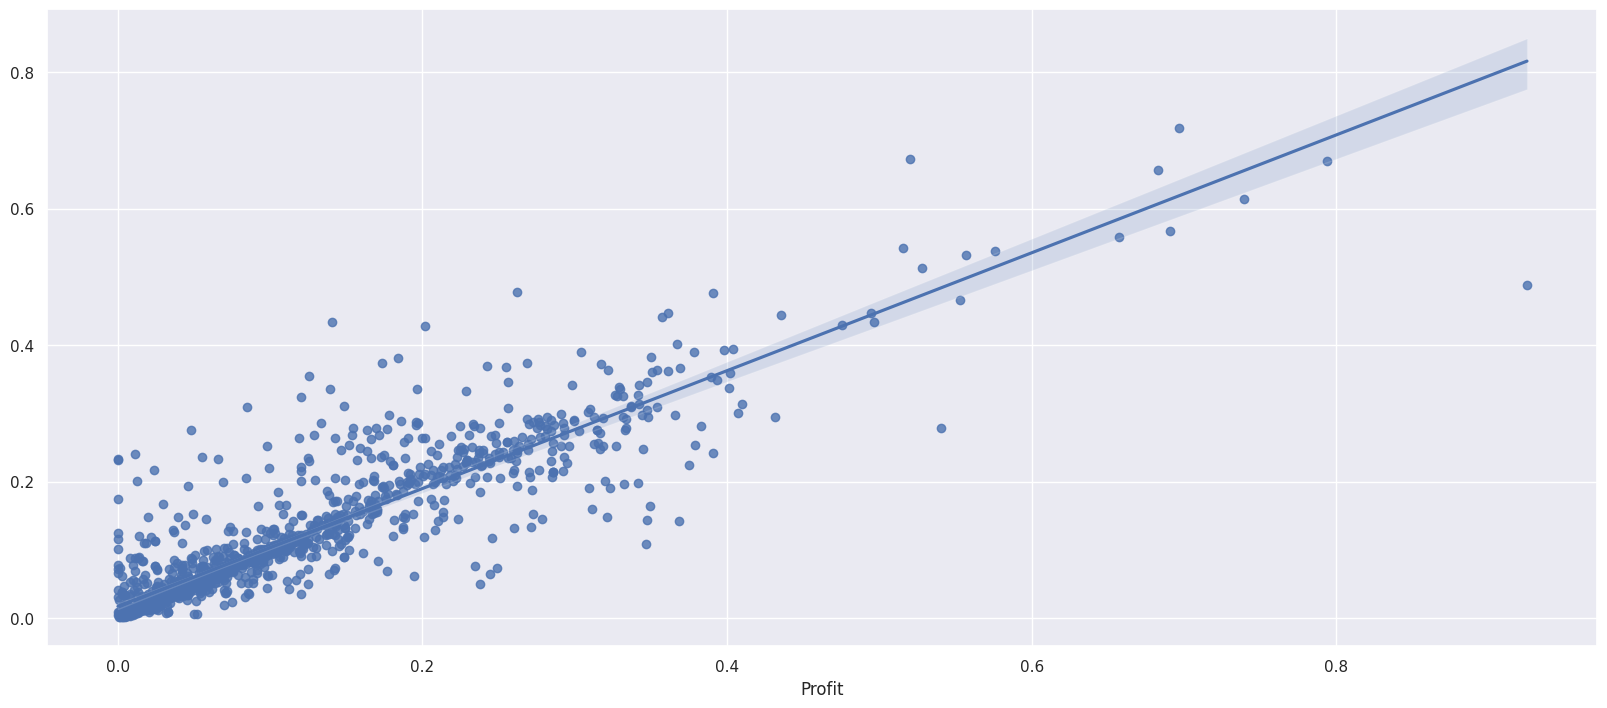

In [ ]:
#Gráfico de las predicciones realizadas
sns.regplot(x = y_general_test, y = predictions_general_rf)

In [ ]:
# Obtener los nombres de las características
features_general_rf = list(x_general_test.columns)

# Obtener la importancia de las características
importance_general_rf = model_general_rf.feature_importances_

# Crear un DataFrame con los nombres de las características y su importancia
df_importance_general_rf = pd.DataFrame({'Feature': features_general_rf, 'Importance': importance_general_rf})

# Ordenar el DataFrame por importancia en orden descendente
df_importance_general_rf = df_importance_general_rf.sort_values('Importance', ascending=False)

# Imprimir los resultados
print(round(df_importance_general_rf,2))

                     Feature  Importance
0                      Sales        0.69
1             Sales Quantity        0.16
14      Sub-Category_Storage        0.04
2                   Discount        0.04
3   Category_Office Supplies        0.03
6           Sub-Category_Art        0.01
5    Sub-Category_Appliances        0.01
4   Sub-Category_Accessories        0.01
15     Sub-Category_Supplies        0.01
13       Sub-Category_Phones        0.01
8        Sub-Category_Chairs        0.00
17        Ship Mode_Same Day        0.00
7     Sub-Category_Bookcases        0.00
16       Sub-Category_Tables        0.00
10    Sub-Category_Envelopes        0.00
12     Sub-Category_Machines        0.00
11       Sub-Category_Labels        0.00
9       Sub-Category_Copiers        0.00


#### Conclusiones

De acuerdo a la métrica de evaluación utilizada en el proyecto (R Cuadrado), el mejor modelo fue el que se entrenó con el algoritmo Random Forest, obteniendo un valor de 0,81.

Según el mejor modelo entrenado, las siguientes son las variables que más importancia tienen a la hora de predecir las ganancias de ventas mensuales: 

In [ ]:
print(round(df_importance_general_rf,2))

                     Feature  Importance
0                      Sales        0.69
1             Sales Quantity        0.16
14      Sub-Category_Storage        0.04
2                   Discount        0.04
3   Category_Office Supplies        0.03
6           Sub-Category_Art        0.01
5    Sub-Category_Appliances        0.01
4   Sub-Category_Accessories        0.01
15     Sub-Category_Supplies        0.01
13       Sub-Category_Phones        0.01
8        Sub-Category_Chairs        0.00
17        Ship Mode_Same Day        0.00
7     Sub-Category_Bookcases        0.00
16       Sub-Category_Tables        0.00
10    Sub-Category_Envelopes        0.00
12     Sub-Category_Machines        0.00
11       Sub-Category_Labels        0.00
9       Sub-Category_Copiers        0.00


## Pérdidas

### Agrupamiento de Datos

Actualmente por el formato de los datos, no es posible responder las preguntar ni cumplir con los objetivos planteados.  
Para tratar esta situación se agruparan los datos para poder cumplir con los objetivos. Más adelante se muestra el proceso mostrando sobre qué criterios se agrupan los datos.

In [ ]:
#Lectura del DataFrame
df_agrup_perdidas = df_perdidas

Lo primero consiste en tratar los datos actuales para que tengan el formato óptimo para llevar a cabo todo este proceso.  
Se procede a separar la columna "Order Date" en años y meses, ignorando los días.

In [ ]:
#Creación de la columna "Anio" a partir de "Order Date"
df_agrup_perdidas.insert(loc = 2,
          column = 'Anio',
          value = pd.DatetimeIndex(pd.to_datetime(df_agrup_perdidas['Order Date'])).to_period('Y'))

In [ ]:
#Creación de la columna Mes en DataFrame
df_agrup_perdidas.insert(loc = 3,
          column = 'Mes',
          value = 0)

In [ ]:
#Asignación de valores a la columna "Mes" a partir de los datos en "Order Date"
long = len(df_agrup_perdidas["Order Date"])
ind_col_fecha = df_agrup_perdidas.columns.get_loc("Order Date")
ind_col_mes = df_agrup_perdidas.columns.get_loc("Mes")
for i in range(long):
  fecha_dt = datetime.strptime(df_agrup_perdidas.iloc[i,ind_col_fecha], '%m/%d/%Y')
  df_agrup_perdidas.iloc[i,ind_col_mes] = fecha_dt.month
df_agrup_perdidas

Order ID  Order Date  Anio  Mes   Ship Date       Ship Mode  \
Row ID                                                                      
15      US-2015-118983  11/22/2015  2015   11  11/26/2015  Standard Class   
16      US-2015-118983  11/22/2015  2015   11  11/26/2015  Standard Class   
24      US-2017-156909   7/16/2017  2017    7   7/18/2017    Second Class   
28      US-2015-150630   9/17/2015  2015    9   9/21/2015  Standard Class   
39      CA-2015-117415  12/27/2015  2015   12  12/31/2015  Standard Class   
...                ...         ...   ...  ...         ...             ...   
9807    CA-2016-136322  10/21/2016  2016   10  10/26/2016  Standard Class   
9832    CA-2014-113257  12/16/2014  2014   12  12/18/2014    Second Class   
9877    US-2017-166324   4/20/2017  2017    4   4/21/2017     First Class   
9878    US-2017-166324   4/20/2017  2017    4   4/21/2017     First Class   
9920    CA-2016-149272   3/15/2016  2016    3   3/19/2016  Standard Class   

       Customer ID     Customer Name      Segment        Country  ...  \
Row ID                                                            ...   
15        HP-14815     Harold Pawlan  Home Office  United States  ...   
16        HP-14815     Harold Pawlan  Home Office  United States  ...   
24        SF-20065   Sandra Flanagan     Consumer  United States  ...   
28        TB-21520   Tracy Blumstein     Consumer  United States  ...   
39        SN-20710      Steve Nguyen  Home Office  United States  ...   
...            ...               ...          ...            ...  ...   
9807      AP-10720        Anne Pryor  Home Office  United States  ...   
9832      SC-20305  Sean Christensen     Consumer  United States  ...   
9877      BE-11455        Brad Eason  Home Office  United States  ...   
9878      BE-11455        Brad Eason  Home Office  United States  ...   
9920      MY-18295   Muhammed Yedwab    Corporate  United States  ...   

         Region       Product ID         Category Sub-Category  \
Row ID                                                           
15      Central  OFF-AP-10002311  Office Supplies   Appliances   
16      Central  OFF-BI-10000756  Office Supplies      Binders   
24         East  FUR-CH-10002774        Furniture       Chairs   
28         East  FUR-BO-10004834        Furniture    Bookcases   
39      Central  FUR-BO-10002545        Furniture    Bookcases   
...         ...              ...              ...          ...   
9807      South  OFF-BI-10004817  Office Supplies      Binders   
9832    Central  FUR-FU-10001706        Furniture  Furnishings   
9877       East  OFF-ST-10000078  Office Supplies      Storage   
9878       East  OFF-BI-10000174  Office Supplies      Binders   
9920    Central  FUR-CH-10000863        Furniture       Chairs   

                                             Product Name      Sales Quantity  \
Row ID                                                                          
15      Holmes Replacement Filter for HEPA Air Cleaner...    68.8100        5   
16       Storex DuraTech Recycled Plastic Frosted Binders     2.5440        3   
24                     Global Deluxe Stacking Chair, Gray    71.3720        2   
28      Riverside Palais Royal Lawyers Bookcase, Royal...  3083.4300        7   
39      Atlantic Metals Mobile 3-Shelf Bookcases, Cust...   532.3992        3   
...                                                   ...        ...      ...   
9807                         GBC Personal VeloBind Strips    28.7520        8   
9832                         Longer-Life Soft White Bulbs     8.6240        7   
9877                Tennsco 6- and 18-Compartment Lockers   848.5440        4   
9878    Wilson Jones Clip & Carry Folder Binder Tool f...     8.7000        5   
9920                     Novimex Swivel Fabric Task Chair   528.4300        5   

       Discount     Profit   Año  
Row ID                            
15         0.80  -123.8580  2015  
16         0.80    -3.8160  2015  
24       

Se cambia el nombre de la variable "Quantity" a "Product Quantity" para destacar que la cantidad mostrada es la cantidad de productos que se vendieron en cada venta.

In [ ]:
#Renombramiento de columna "Quantity" a "Product Quantity"
df_agrup_perdidas = df_agrup_perdidas.rename(columns={"Quantity":"Product Quantity"})

Se crea una columna llamada "Sales Quantity" con valor igual a 1 en todos los casos, para más adelante poder agrupar dichas ventas con varios criterios y conocer la cantidad de ventas incluidas en cada grupo.

In [ ]:
#Creación de la columna "Sales Quantity"
df_agrup_perdidas.insert(loc = 20,
          column = 'Sales Quantity',
          value = 1)

Una vez creadas las columnas deseadas faltantes, se procede a eliminar aquellas columnas que no interesan para la creación del modelo de regresión por lo siguiente:
* Order ID: es un id, no aporta información relevante.
* Customer Name: no es posible incluir en el agrupamiento el nombre de cada cliente.  
* Customer ID: es un id, no aporta información relevante.
* Order Date: de este campo se obtuvo el año y el mes de cada venta, ya no es necesario conservar esta variable.
* Ship Date: la fecha de envío no es tan importante como la fecha de pedido, por lo que solo se utilizará esa fecha.
* Country: todos los registros tienen como valor "United States" por lo que no aporta valor al análisis. 
* City: si se quieren agregar las ciudades al agrupamiento la cantidad de datos se expandiría de manera desproporcionada y no se considera tan importante analizar un valor tan puntual. En su lugar se eligió la variable "Region" que es más abarcativa e igual de descriptiva de una manera menos puntual.
* State: al igual que en la variable "City", se prefiere un dato más abarcativo como "Region".
* Postal Code: es un id, no aporta información relevante.
* Product ID: es un id, no aporta información relevante.
* Product name: si se desea agregar esta variable al modelo, la cantidad de datos se incrementaría de manera desproporcionada y no se considera tan importante analizar un valor tan puntual y poco abarcativa. En su lugar se tomaron las variables "Category" y "Sub-Category". Esta variable será utilizada más adelante para hacer un análisis más puntual.

In [ ]:
#Eliminación de Columnas
df_agrup_perdidas = df_agrup_perdidas.drop(["Order ID", "Customer Name", "Customer ID", "Order Date", "Ship Date", "Country", "City", "State", "Postal Code", "Product ID", "Product Name"], axis=1)
df_agrup_perdidas.head()

Anio  Mes       Ship Mode      Segment   Region         Category  \
Row ID                                                                     
15      2015   11  Standard Class  Home Office  Central  Office Supplies   
16      2015   11  Standard Class  Home Office  Central  Office Supplies   
24      2017    7    Second Class     Consumer     East        Furniture   
28      2015    9  Standard Class     Consumer     East        Furniture   
39      2015   12  Standard Class  Home Office  Central        Furniture   

       Sub-Category      Sales  Product Quantity  Sales Quantity  Discount  \
Row ID                                                                       
15       Appliances    68.8100                 5               1      0.80   
16          Binders     2.5440                 3               1      0.80   
24           Chairs    71.3720                 2               1      0.30   
28        Bookcases  3083.4300                 7               1      0.50   
39        Bookcases   532.3992                 3               1      0.32   

           Profit   Año  
Row ID                   
15      -123.8580  2015  
16        -3.8160  2015  
24        -1.0196  2017  
28     -1665.0522  2015  
39       -46.9764  2015

Ahora, se agrupan los datos de acuerdo al año, mes, categoría, sub categoría, modo de envío, segmento de cliente y región del cliente. Esto para obtener la cantidad de productos, cantidad de ventas, precio de las ventas, descuentos otorgados y ganancias obtenidas de acuerdo a dichos agrupamientos.

In [ ]:
#Agrupamiento de Datos
discount = df_agrup_perdidas.groupby(["Anio","Mes","Category", "Sub-Category", "Ship Mode", "Segment", "Region"]).median().reset_index()
discount = discount["Discount"]
df_agrup_perdidas = df_agrup_perdidas.drop(["Discount"], axis=1)
df_agrup_perdidas = df_agrup_perdidas.groupby(["Anio","Mes","Category", "Sub-Category", "Ship Mode", "Segment", "Region"]).sum().reset_index()
df_agrup_perdidas.insert(loc = 10,
          column = 'Discount',
          value = discount)
df_agrup_perdidas.head(10)

<ipython-input-851-c0d0f736a3e0>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  discount = df_agrup_perdidas.groupby(["Anio","Mes","Category", "Sub-Category", "Ship Mode", "Segment", "Region"]).median().reset_index()
<ipython-input-851-c0d0f736a3e0>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_agrup_perdidas = df_agrup_perdidas.groupby(["Anio","Mes","Category", "Sub-Category", "Ship Mode", "Segment", "Region"]).sum().reset_index()


Anio  Mes         Category Sub-Category       Ship Mode      Segment  \
0  2014    1        Furniture       Tables  Standard Class     Consumer   
1  2014    1  Office Supplies      Binders  Standard Class     Consumer   
2  2014    1  Office Supplies      Binders  Standard Class  Home Office   
3  2014    1  Office Supplies      Storage  Standard Class  Home Office   
4  2014    1       Technology       Phones    Second Class     Consumer   
5  2014    2        Furniture       Chairs  Standard Class     Consumer   
6  2014    2  Office Supplies      Binders    Second Class     Consumer   
7  2014    2  Office Supplies      Binders  Standard Class     Consumer   
8  2014    2  Office Supplies      Binders  Standard Class     Consumer   
9  2014    3        Furniture    Bookcases  Standard Class     Consumer   

    Region    Sales  Product Quantity  Sales Quantity  Discount   Profit  
0     West  333.000                 3               1      0.20 -16.6500  
1     East    3.438                 2               1      0.70  -2.5212  
2  Central    3.540                 2               1      0.80  -5.4870  
3  Central  272.736                 3               1      0.20 -64.7748  
4     East  124.200                 3               1      0.40 -31.0500  
5     West  129.568                 2               1      0.20 -24.2940  
6  Central    8.952                 2               1      0.80 -14.7708  
7  Central    1.080                 3               1      0.80  -1.7280  
8    South   18.336                 2               1      0.70 -12.2240  
9     West  205.666                 2               1      0.15 -12.0980

### Visualizaciones - Análisis Numérico - Interpretación

A continuación se van graficar todas las variables del nuevo dataset obtenido con respecto a la variable objetivo que es "Profit", también se hará un conteo de los datos de cada variable. Luego se hará un análisis numérico y se obtendrá una interpretación de estos datos.

In [ ]:
#Copia del Dataframe
df_graf_perdidas = df_agrup_perdidas

#### Año

##### Gráfico

In [ ]:
#Creación Dataframe con la información deseada
muestra_año = df_graf_perdidas.groupby('Anio')['Profit'].sum().reset_index()
muestra_año

Anio      Profit
0  2014 -16850.2063
1  2015 -13781.0841
2  2016 -15595.1871
3  2017 -18258.1661

<Axes: xlabel='Anio', ylabel='Profit'>

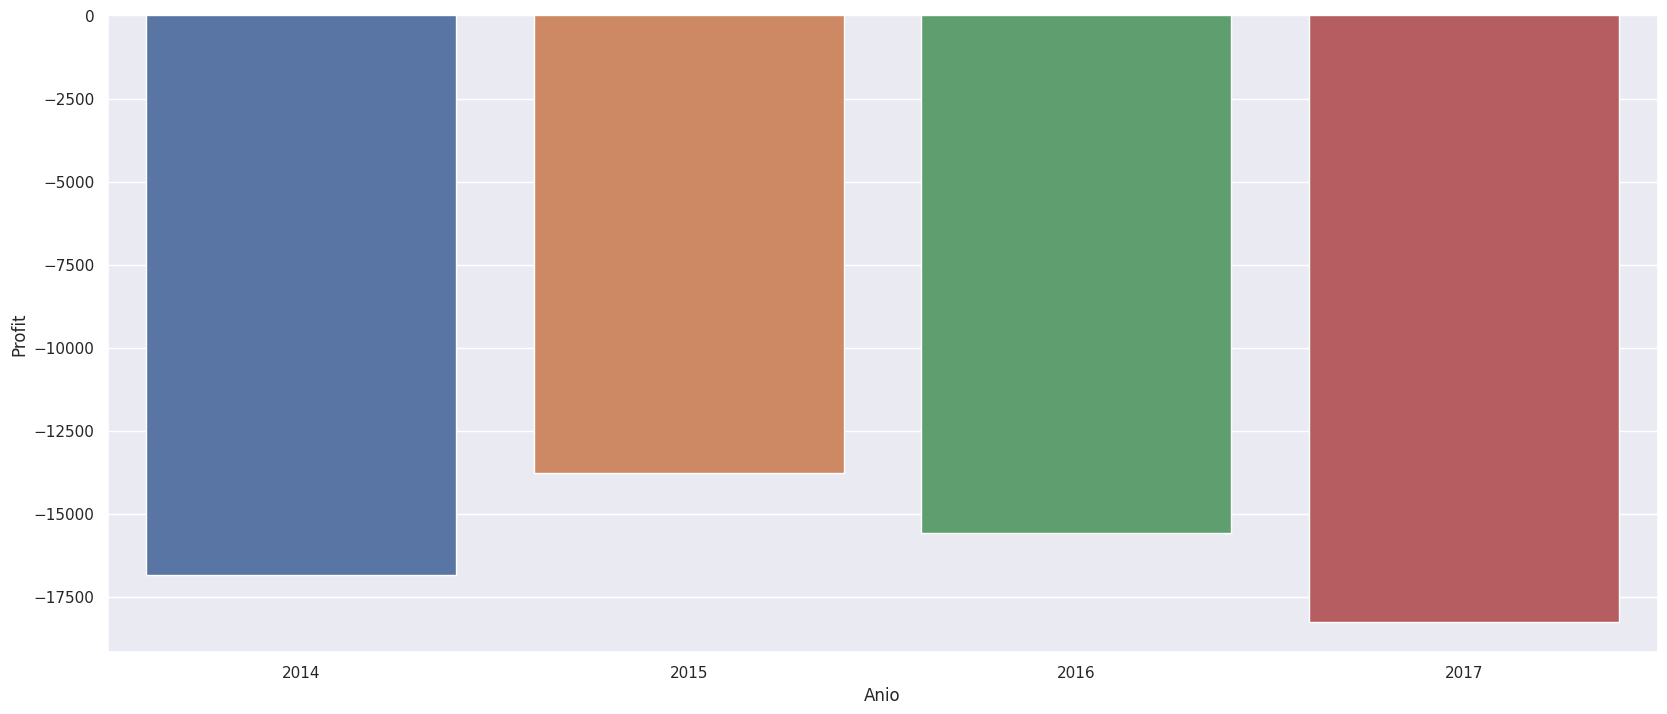

In [ ]:
#Gráfico comparando la variable con "Profit"
sns.set(rc={'figure.figsize':(20,8.27)})
sns.barplot(data=muestra_año, x="Anio", y= "Profit")

<Axes: xlabel='Anio', ylabel='count'>

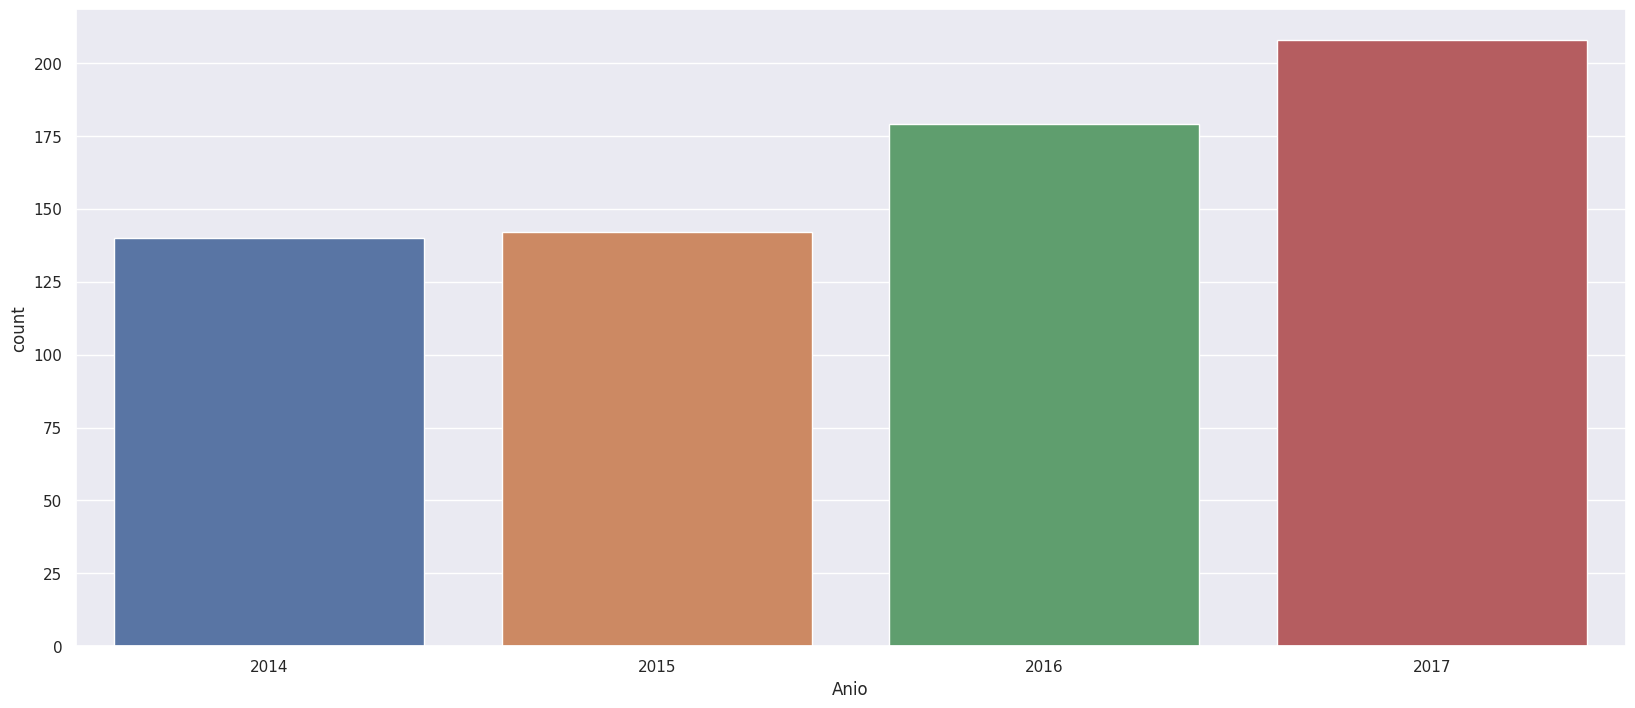

In [ ]:
#Gráfico de conteo de la variable
sns.countplot(data=df_graf_perdidas, x="Anio")

##### Análisis Numérico

In [ ]:
#Resumen Numérico
muestra_año.describe()

Profit
count      4.000000
mean  -16121.160900
std     1901.833001
min   -18258.166100
25%   -17202.196250
50%   -16222.696700
75%   -15141.661350
max   -13781.084100

##### Insights

* Los años que más pérdidas generaron fueron 2017 y 2014, en ese orden.
* El año que mayor cantidad de ventas que generan pérdidas contiene es el 2017.

#### Mes

##### Gráfico

In [ ]:
#Creación Dataframe con la información deseada
muestra_mes = df_graf_perdidas.groupby('Mes')['Profit'].sum().reset_index()
muestra_mes

Mes      Profit
0     1  -3575.7839
1     2   -334.7191
2     3  -4128.6226
3     4 -10125.2173
4     5  -3078.3541
5     6  -2337.2565
6     7  -6765.5319
7     8  -3102.4636
8     9 -10943.8832
9    10  -3727.0010
10   11  -8491.5629
11   12  -7874.2475

<Axes: xlabel='Mes', ylabel='Profit'>

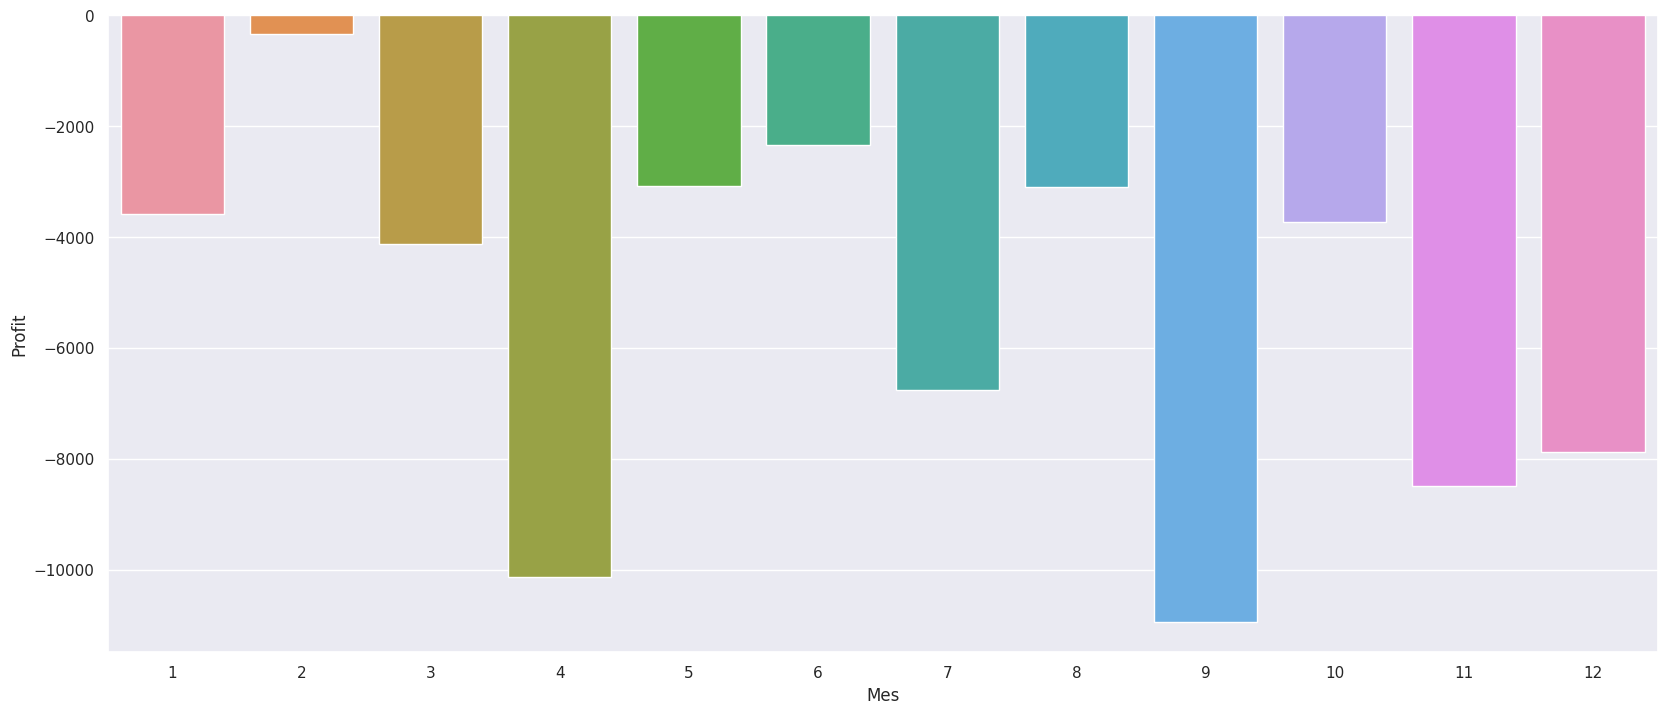

In [ ]:
#Gráfico comparando la variable con "Profit"
sns.set(rc={'figure.figsize':(20,8.27)})
sns.barplot(data=muestra_mes, x="Mes", y= "Profit")

<Axes: xlabel='Mes', ylabel='count'>

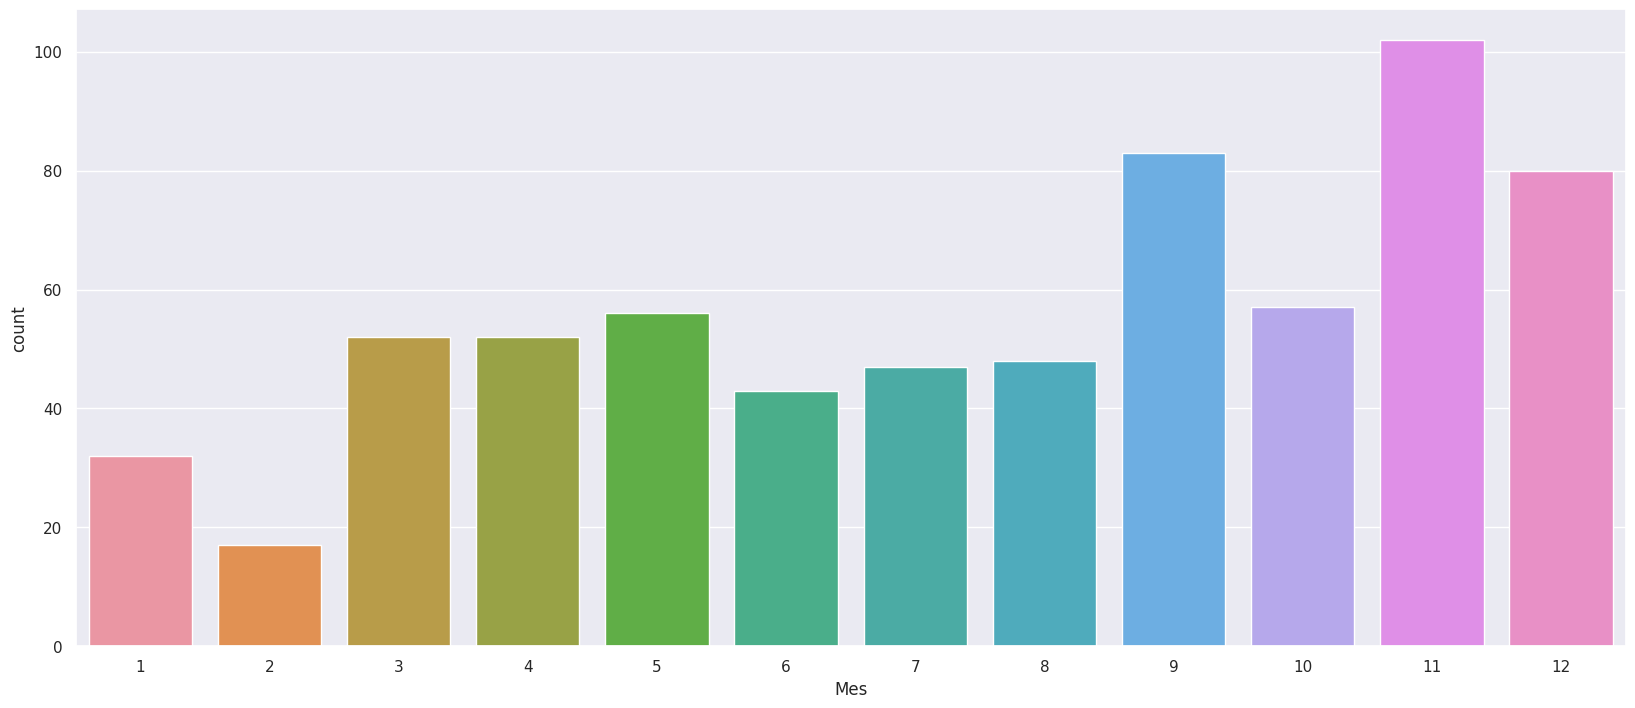

In [ ]:
#Gráfico de conteo de la variable
sns.countplot(data=df_graf_perdidas, x="Mes")

##### Análisis Numérico

In [ ]:
#Resumen Numérico
muestra_mes.describe()

Mes        Profit
count  12.000000     12.000000
mean    6.500000  -5373.720300
std     3.605551   3358.133184
min     1.000000 -10943.883200
25%     3.750000  -8028.576350
50%     6.500000  -3927.811800
75%     9.250000  -3096.436225
max    12.000000   -334.719100

##### Insights

* Los meses en los que se generaron más pérdidas fueron Abril y Septiembre, y un escalón abajo Noviembre.
* Los meses que mayor cantidad de ventas que generan pérdidas fueron Noviembre, Septiembre y Diciembre en ese orden. 

#### Category

##### Gráfico

In [ ]:
#Creación Dataframe con la información deseada
muestra_category = df_graf_perdidas.groupby('Category')['Profit'].sum().reset_index()
muestra_category

Category      Profit
0        Furniture -25333.4257
1  Office Supplies -23430.4197
2       Technology -15720.7982

<Axes: xlabel='Category', ylabel='Profit'>

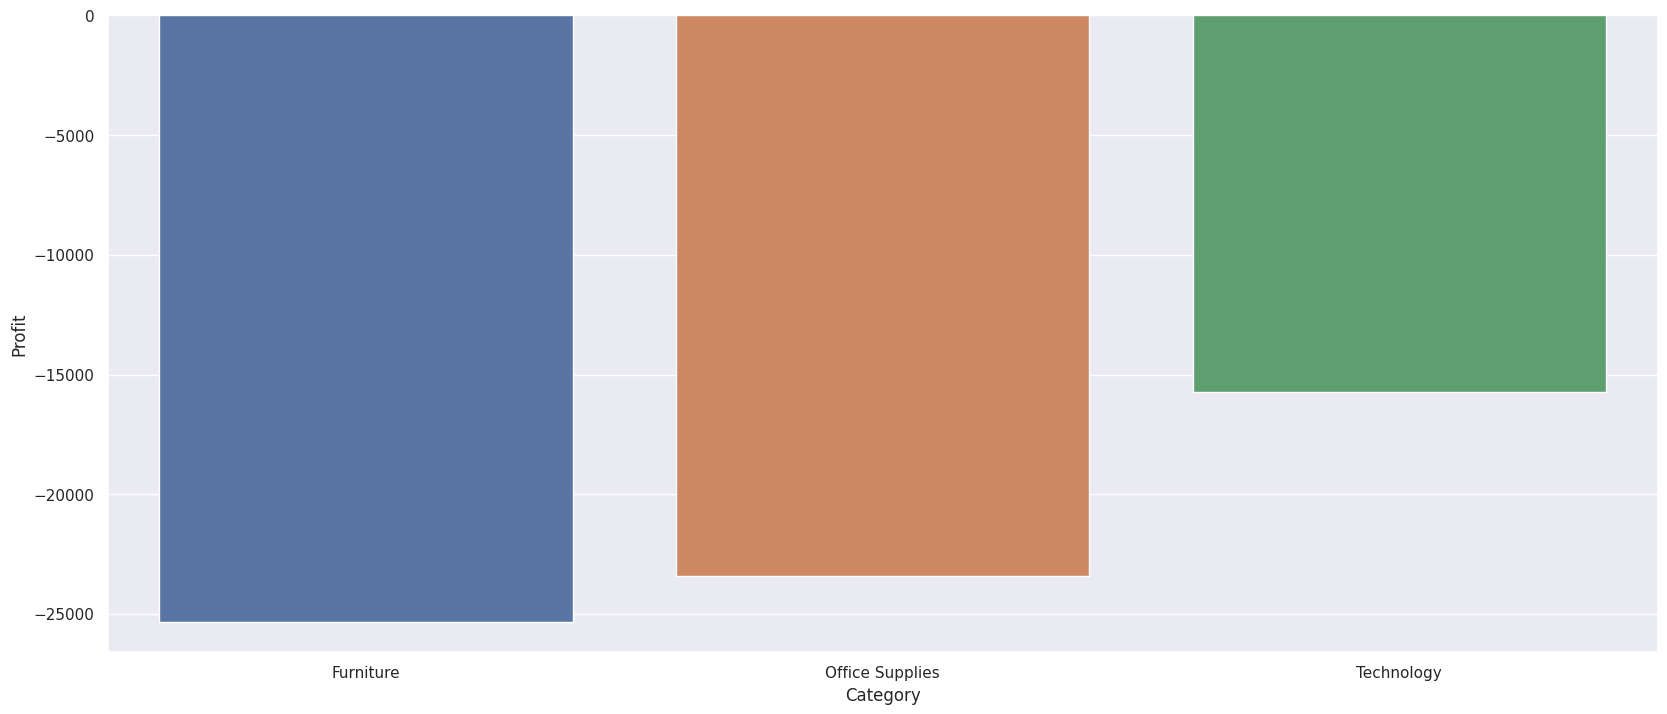

In [ ]:
#Gráfico comparando la variable con "Profit"
sns.set(rc={'figure.figsize':(20,8.27)})
sns.barplot(data=muestra_category, x="Category", y= "Profit")

<Axes: xlabel='Category', ylabel='count'>

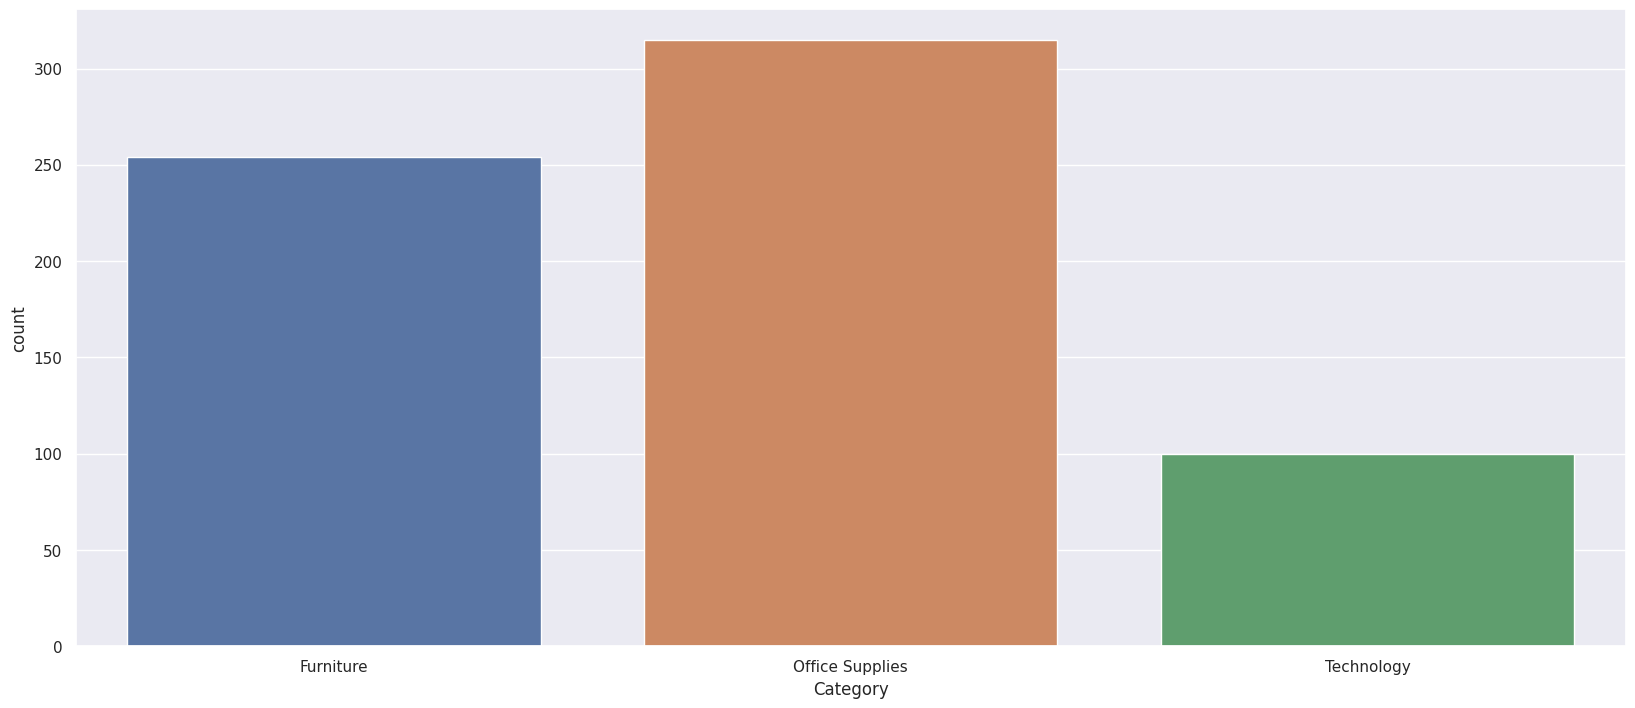

In [ ]:
#Gráfico de conteo de la variable
sns.countplot(data=df_graf_perdidas, x="Category")

##### Análisis Numérico

In [ ]:
#Resumen Numérico
muestra_category.describe()

Profit
count      3.00000
mean  -21494.88120
std     5090.22434
min   -25333.42570
25%   -24381.92270
50%   -23430.41970
75%   -19575.60895
max   -15720.79820

##### Insights

* Los productos de la Categoría "Furniture" son lo que generan mayor cantidad de pérdidas.
* La Categoría que mayor Cantidad de Ventas contiene es "Office Supplies" a pesar de no ser la que mayores pérdidas genera.  

#### Sub Category

##### Gráfico

In [ ]:
#Creación Dataframe con la información deseada
muestra_scategory = df_graf_perdidas.groupby('Sub-Category')['Profit'].sum().reset_index()
muestra_scategory

Sub-Category      Profit
0   Accessories   -256.9727
1    Appliances  -5107.9010
2       Binders -15373.6616
3     Bookcases  -6029.1471
4        Chairs  -3086.9165
5     Fasteners    -27.6518
6   Furnishings  -2201.9686
7      Machines -12070.9636
8        Phones  -3392.8619
9       Storage  -2531.4127
10     Supplies   -389.7926
11       Tables -14015.3935

<Axes: xlabel='Sub-Category', ylabel='Profit'>

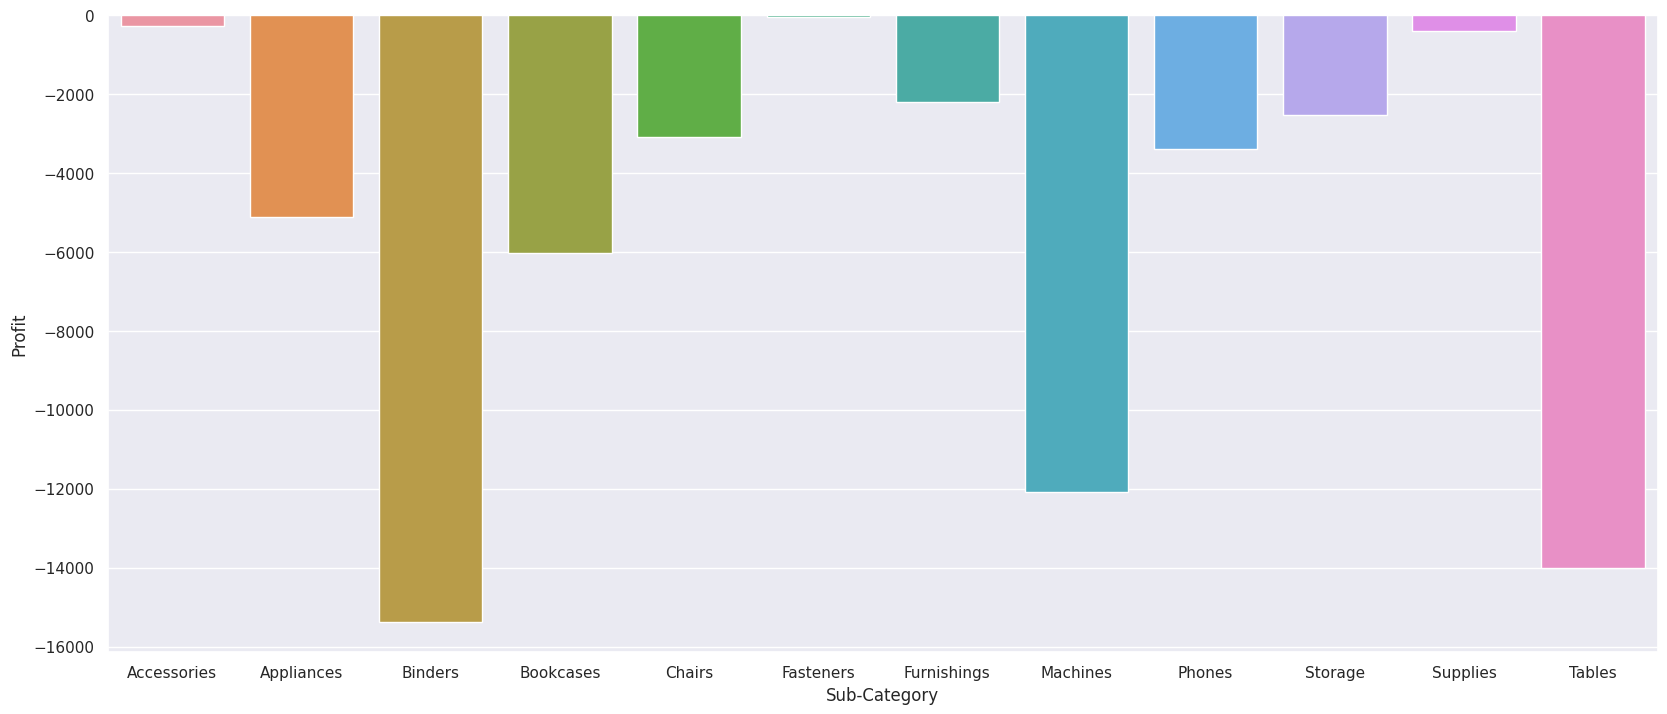

In [ ]:
#Gráfico comparando la variable con "Profit"
sns.set(rc={'figure.figsize':(20,8.27)})
sns.barplot(data=muestra_scategory, x="Sub-Category", y= "Profit")

<Axes: xlabel='Sub-Category', ylabel='count'>

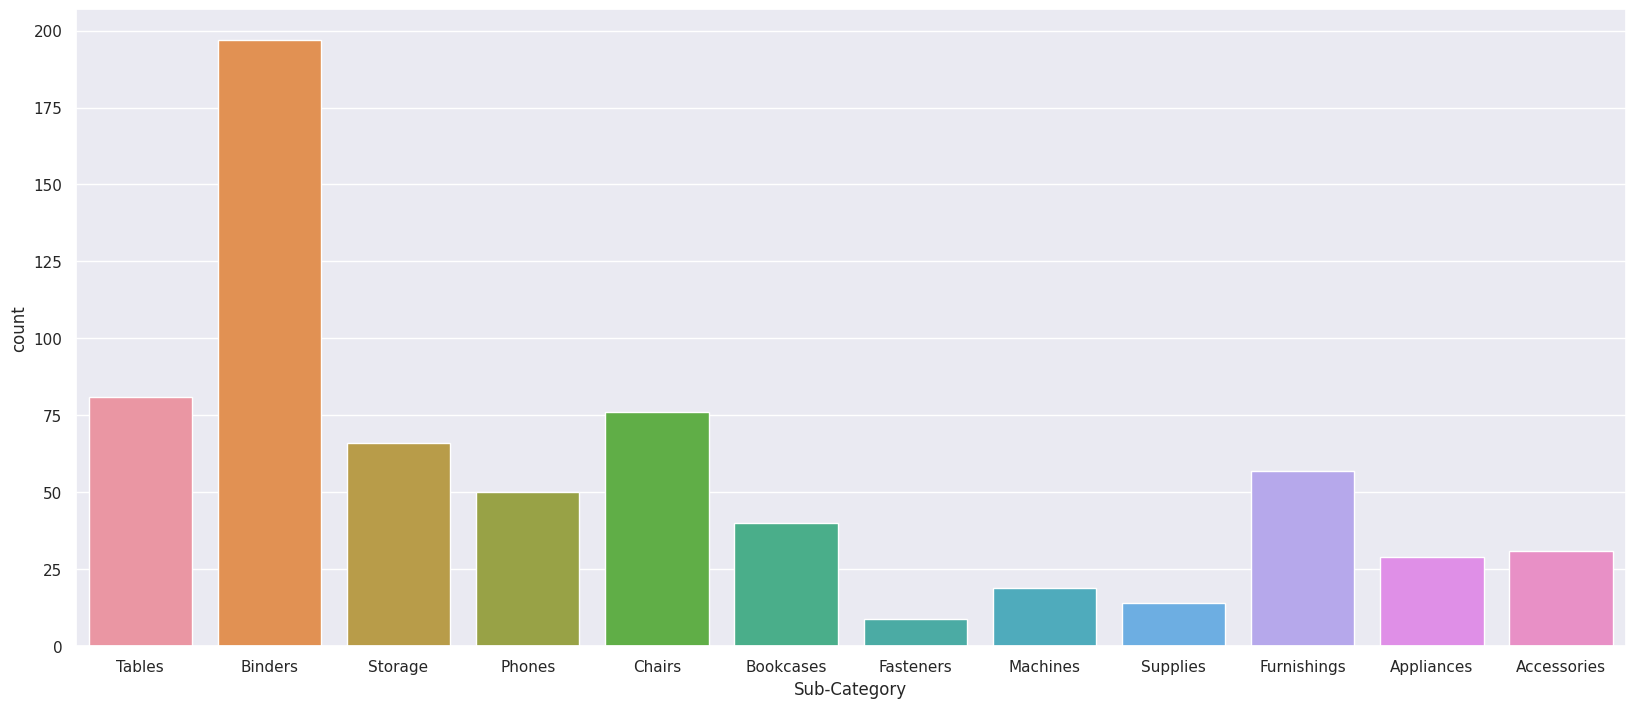

In [ ]:
#Gráfico de conteo de la variable
sns.countplot(data=df_graf_perdidas, x="Sub-Category")

##### Análisis Numérico

In [ ]:
#Resumen Numérico
muestra_scategory.describe()

Profit
count     12.000000
mean   -5373.720300
std     5451.636422
min   -15373.661600
25%    -7539.601225
50%    -3239.889200
75%    -1748.924600
max      -27.651800

##### Insights

* Las Sub Categorías que más pérdidas generan son "Binders", "Tables" y "Machines" en ese orden. 
* Los productos más vendidos son de la Sub Categoría de "Binders" por mucho.

#### Ship Mode

##### Gráfico

In [ ]:
#Creación Dataframe con la información deseada
muestra_modo = df_graf_perdidas.groupby('Ship Mode')['Profit'].sum().reset_index()
muestra_modo

Ship Mode      Profit
0     First Class -10045.5662
1        Same Day  -1751.7760
2    Second Class  -9247.6625
3  Standard Class -43439.6389

<Axes: xlabel='Ship Mode', ylabel='Profit'>

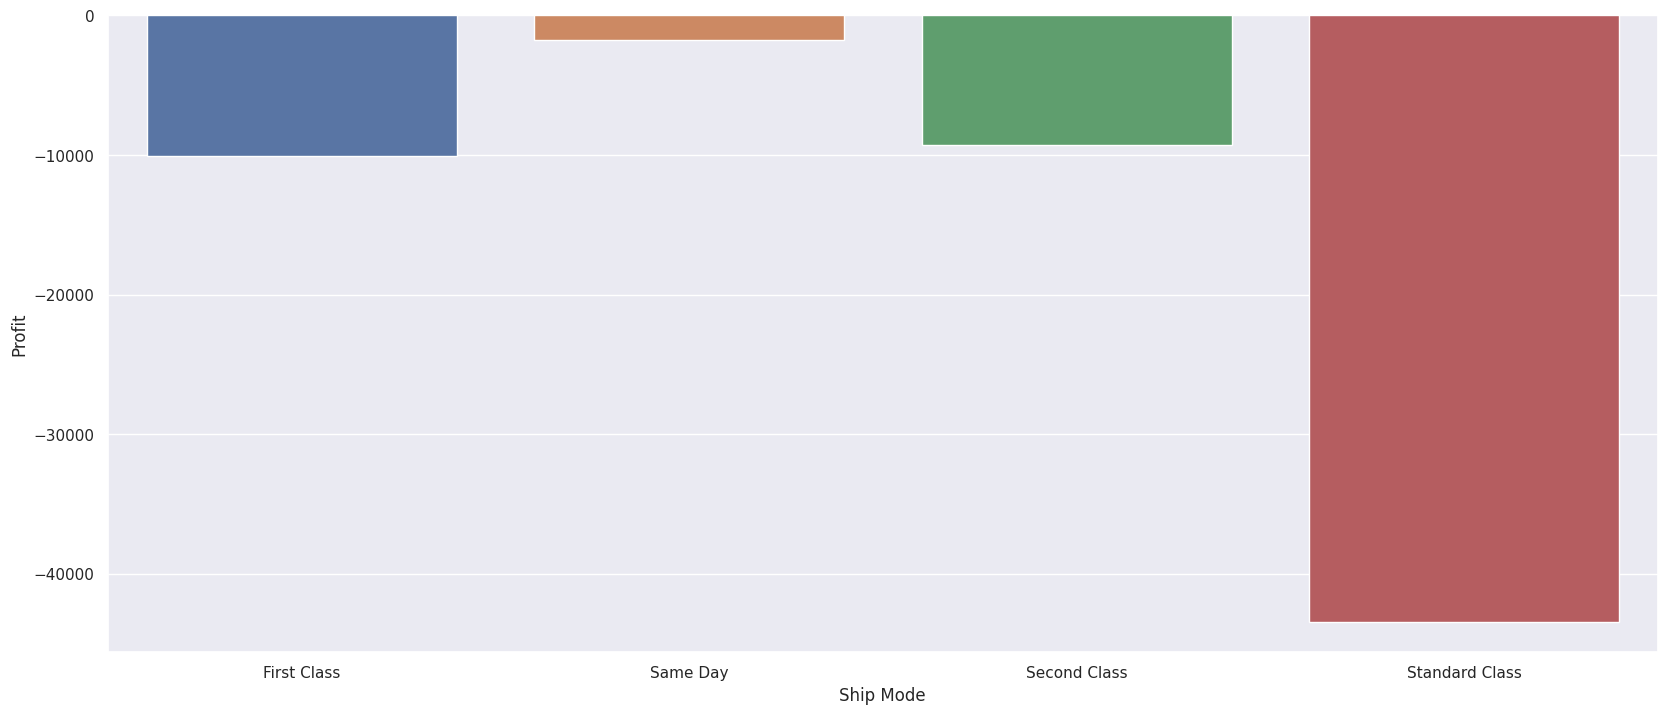

In [ ]:
#Gráfico comparando la variable con "Profit"
sns.set(rc={'figure.figsize':(20,8.27)})
sns.barplot(data=muestra_modo, x="Ship Mode", y= "Profit")

<Axes: xlabel='Ship Mode', ylabel='count'>

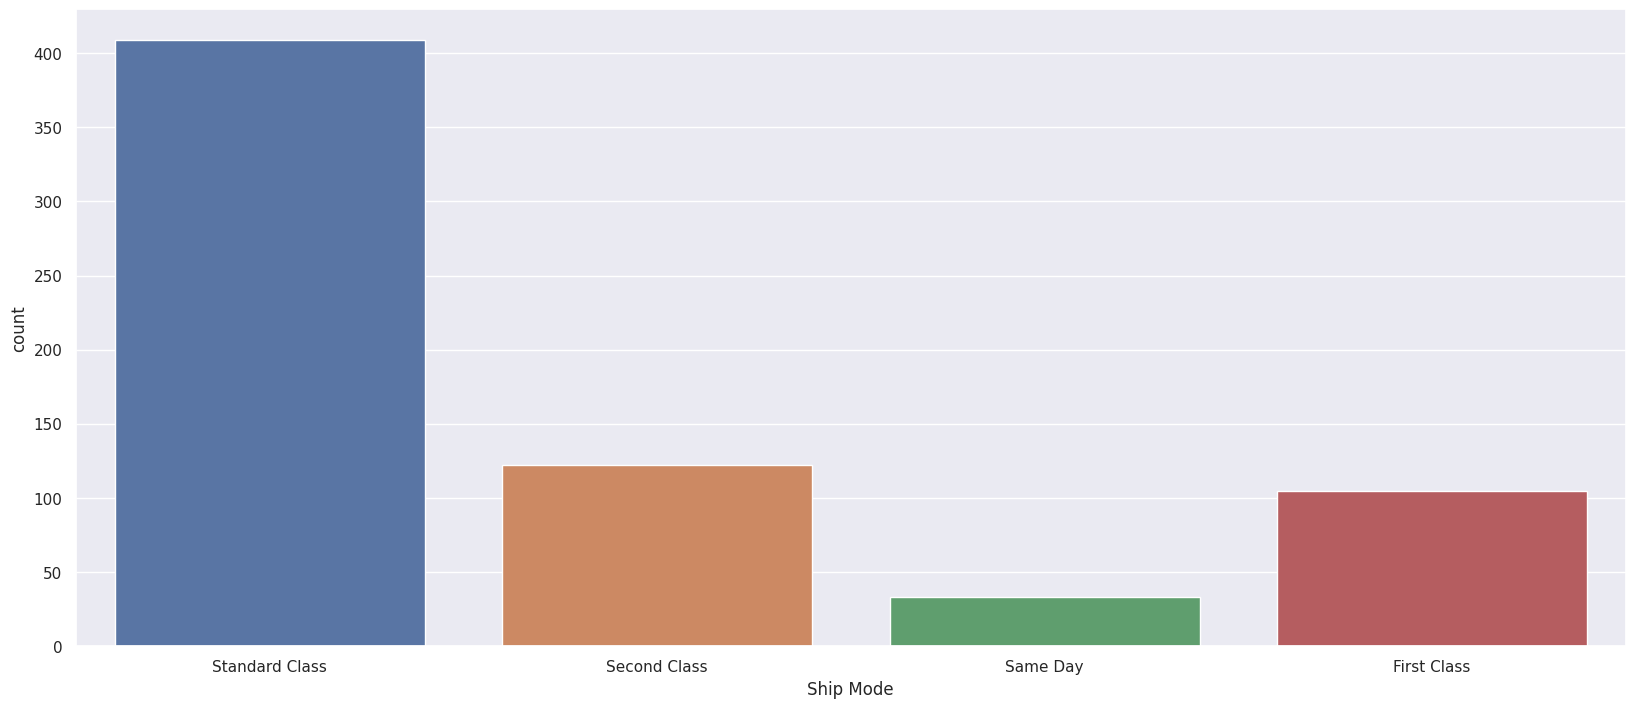

In [ ]:
#Gráfico de conteo de la variable
sns.countplot(data=df_graf_perdidas, x="Ship Mode")

##### Análisis Numérico

In [ ]:
#Resumen Numérico
muestra_modo.describe()

Profit
count      4.000000
mean  -16121.160900
std    18591.541929
min   -43439.638900
25%   -18394.084375
50%    -9646.614350
75%    -7373.690875
max    -1751.776000

##### Insights

* El Modo de Envío "Standard Class" es el más común y el que más pérdidas genera por mucho.

#### Segment

##### Gráfico

In [ ]:
#Creación Dataframe con la información deseada
muestra_segmento = df_graf_perdidas.groupby('Segment')['Profit'].sum().reset_index()
muestra_segmento

Segment      Profit
0     Consumer -37900.4315
1    Corporate -14811.4873
2  Home Office -11772.7248

<Axes: xlabel='Segment', ylabel='Profit'>

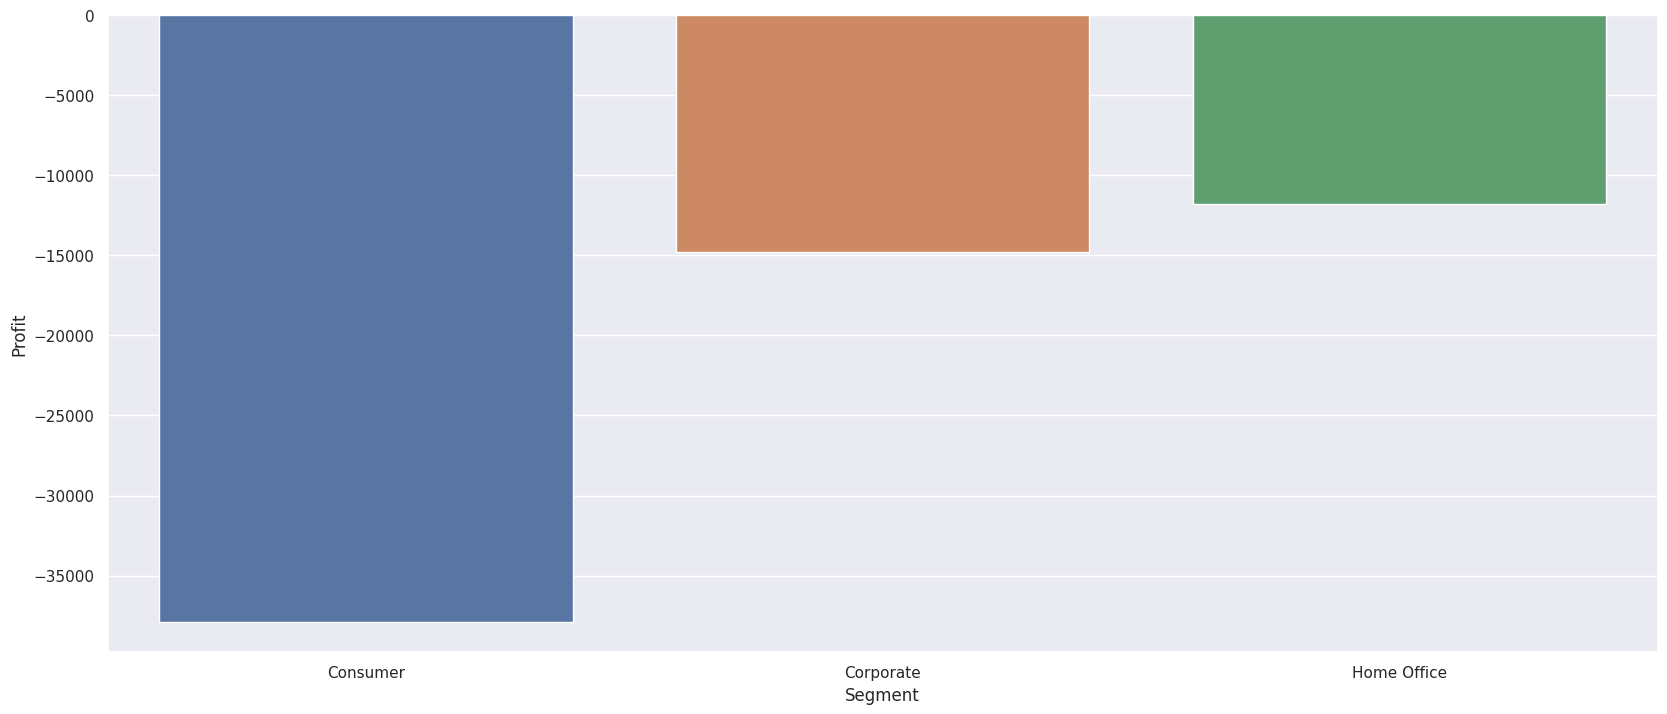

In [ ]:
#Gráfico comparando la variable con "Profit"
sns.set(rc={'figure.figsize':(20,8.27)})
sns.barplot(data=muestra_segmento, x="Segment", y= "Profit")

<Axes: xlabel='Segment', ylabel='count'>

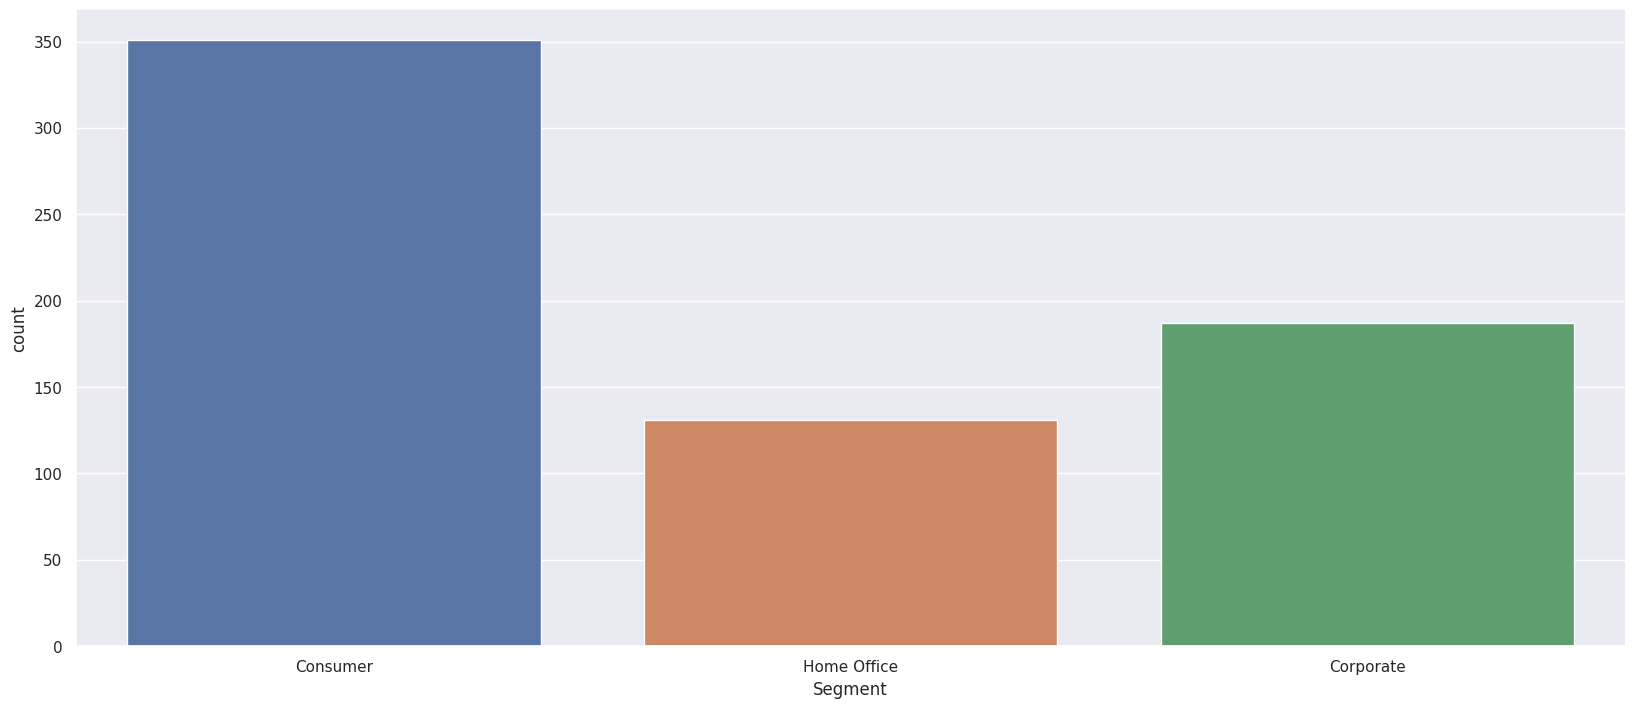

In [ ]:
#Gráfico de conteo de la variable
sns.countplot(data=df_graf_perdidas, x="Segment")

##### Análisis Numérico

In [ ]:
#Resumen Numérico
muestra_segmento.describe()

Profit
count      3.00000
mean  -21494.88120
std    14288.63464
min   -37900.43150
25%   -26355.95940
50%   -14811.48730
75%   -13292.10605
max   -11772.72480

##### Insights

* El Segmento de Clientes que más ventas y pérdidas genera es el de "Consumer".
* El Segmento de Clientes que menos ventas y pérdidas genera es el de "Home Office".

#### Region

##### Gráfico

In [ ]:
#Creación Dataframe con la información deseada
muestra_region = df_graf_perdidas.groupby('Region')['Profit'].sum().reset_index()
muestra_region

Region      Profit
0  Central -27288.1417
1     East -20388.3805
2    South  -6056.4058
3     West -10751.7156

<Axes: xlabel='Region', ylabel='Profit'>

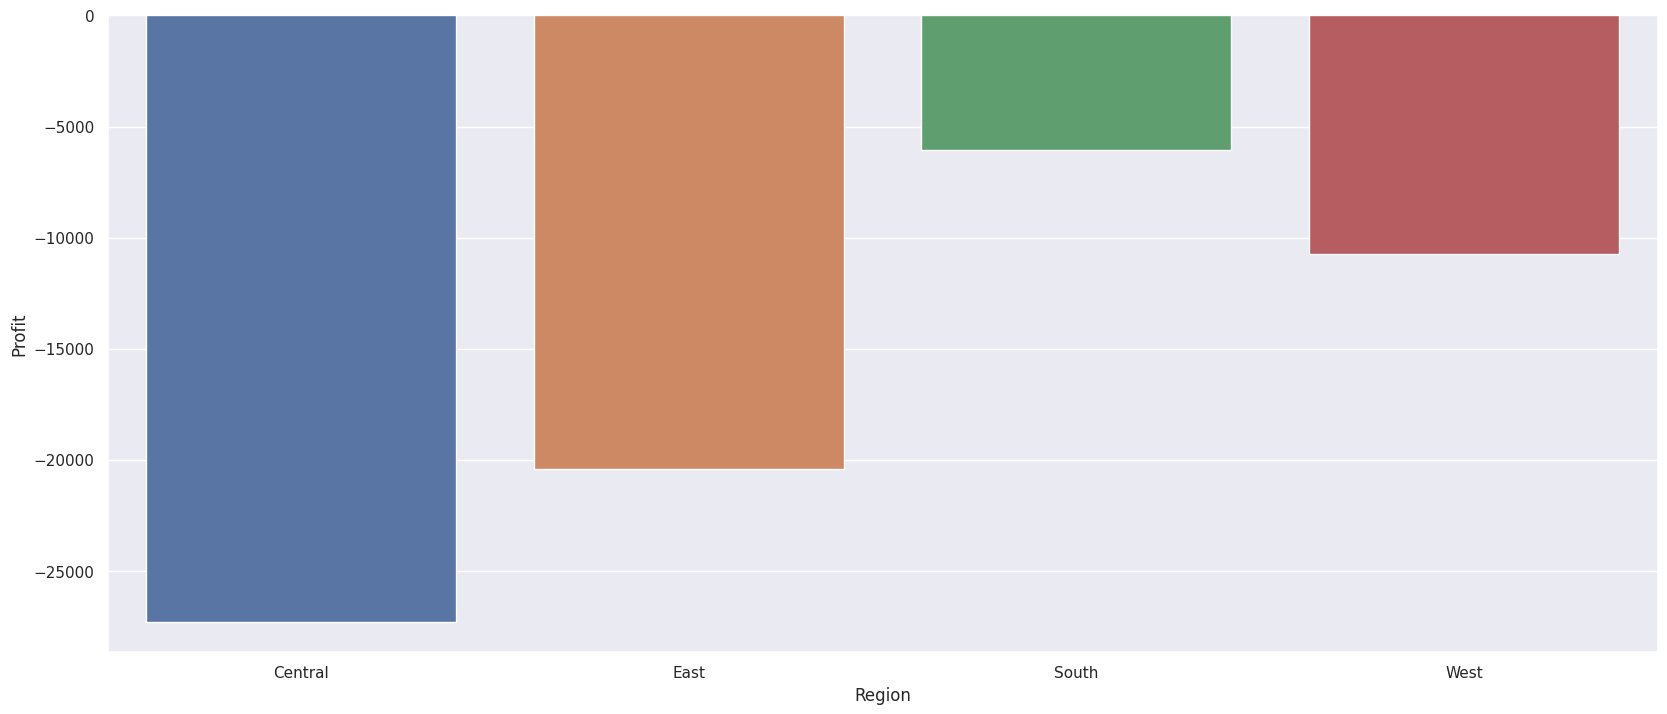

In [ ]:
#Gráfico comparando la variable con "Profit"
sns.set(rc={'figure.figsize':(20,8.27)})
sns.barplot(data=muestra_region, x="Region", y= "Profit")

<Axes: xlabel='Region', ylabel='count'>

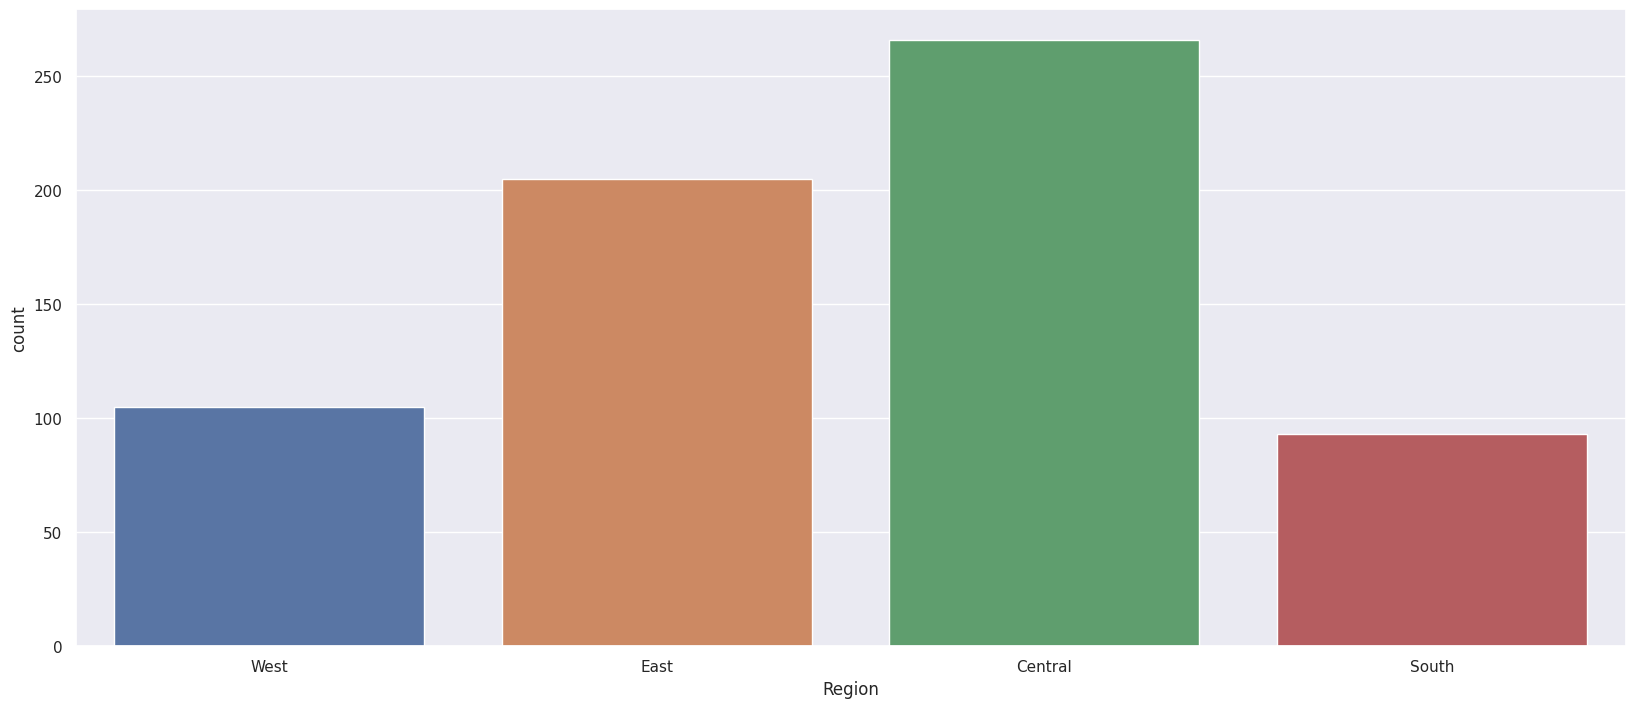

In [ ]:
#Gráfico de conteo de la variable
sns.countplot(data=df_graf_perdidas, x="Region")

##### Análisis Numérico

In [ ]:
#Resumen Numérico
muestra_region.describe()

Profit
count      4.000000
mean  -16121.160900
std     9540.105893
min   -27288.141700
25%   -22113.320800
50%   -15570.048050
75%    -9577.888150
max    -6056.405800

##### Insights

* La región que más pérdidas y cantidad de ventas de este tipo generan es la "Central".
* La región "South" es la que menos pérdidas genera y genera menor cantidad de ventas de este tipo.


### Modelo de Regresión

#### Preparación

In [ ]:
#Copia del dataframe de la sección de "Agrupamiento de Datos"
agrup_perdidas_fs = df_agrup_perdidas

Una vez realizado un análisis visual de los datos agrupados previamente, se procede a crear modelos con este conjunto de datos y comparar los rendimientos de los mismos. Cabe recordar que todos son modelos de regresión para predecir el valor de la variable "Profit".

Se debe aclarar también, que la métrica que se utilizará para comprar el rendimiento de los modelos es la de R-Cuadrado o R2.  

R2 indica la bondad o la aptitud del modelo, a menudo se utiliza con fines descriptivos y muestra que tan bién las variables independientes seleccionadas explican la variabilidad en sus variables dependientes. 
R-cuadrado tiene la propiedad útil de que su escala es intuitiva, va de 0 a 1, con 0 indicando que el modelo propuesto no mejora la predicción sobre el modelo medido y 1 indica una predicción perfecta. 

Para poder utlizar los datos en los modelos, el conjunto de datos solo debe contener valores numéricos, es decir, que las variables categóricas deben llevarse a valores numéricos.  
Para llevar a cabo ese proceso se utilizará el método de Pandas llamado "get_dummies", que se encarga de tomar cada posible valor de cada variable categórica y convertirlo en una propia variable booleana que toma valor de 1 si el registro contiene ese valor o 0 si no lo contiene.

In [ ]:
#Conversión de variables categóricas a numéricas con "get_dummies"
agrup_perdidas_fs = pd.get_dummies(data=agrup_perdidas_fs)
agrup_perdidas_fs

Anio  Mes    Sales  Product Quantity  Sales Quantity  Discount   Profit  \
0    2014    1  333.000                 3               1       0.2 -16.6500   
1    2014    1    3.438                 2               1       0.7  -2.5212   
2    2014    1    3.540                 2               1       0.8  -5.4870   
3    2014    1  272.736                 3               1       0.2 -64.7748   
4    2014    1  124.200                 3               1       0.4 -31.0500   
..    ...  ...      ...               ...             ...       ...      ...   
664  2017   12   78.256                 2               1       0.2 -17.6076   
665  2017   12  120.000                 2               1       0.5  -7.2000   
666  2017   12  151.188                 2               1       0.4 -25.1980   
667  2017   12   73.568                 4               1       0.2 -16.5528   
668  2017   12   57.360                 6               1       0.2 -14.3400   

     Category_Furniture  Category_Office Supplies  Category_Technology  ...  \
0                     1                         0                    0  ...   
1                     0                         1                    0  ...   
2                     0                         1                    0  ...   
3                     0                         1                    0  ...   
4                     0                         0                    1  ...   
..                  ...                       ...                  ...  ...   
664                   0                         1                    0  ...   
665                   0                         0                    1  ...   
666                   0                         0                    1  ...   
667                   0                         0                    1  ...   
668                   0                         0                    1  ...   

     Ship Mode_Same Day  Ship Mode_Second Class  Ship Mode_Standard Class  \
0                     0                       0                         1   
1                     0                       0                         1   
2                     0                       0                         1   
3                     0                       0                         1   
4                     0                       1                         0   
..                  ...                     ...                       ...   
664                   0                       0                         1   
665                   0                       0                         0   
666                   0                       0                         1   
667                   0                       0                         1   
668                   0                       0                         1   

     Segment_Consumer  Segment_Corporate  Segment_Home Office  Region_Central  \
0                   1                  0                    0               0   
1                   1                  0                    0               0   
2                   0                  0                    1               1   
3                   0                  0                    1               1   
4                   1                  0                    0               0   
..                ...                ...                  ...             ...   
664                 1                  0                    0               0   
665                 1                  0                    0               0   
666                 0                  1                    0               0   
667                 0                  1                    0               0   
668                 0                  1                    0               0   

     Region_East  Region_South  Region_West  
0              0             0            1  
1              1             0            0  
2              0             0            0  
3            

Antes que nada, se debe convertir el tipo de dato de la variable de años para poder ser tratados por los algoritmos siguientes.

In [ ]:
# Conversión de la variable "Anio" a integer
agrup_perdidas_fs["Anio"] = agrup_perdidas_fs["Anio"].astype(int)

A continuación, se procede a Normalizar los valores a utilizar en el modelo para que se encuentren en la misma escala (entre 0 y 1).

In [ ]:
#Función para normalizar valores
def min_max_scaling(series):
    return (series - series.min()) / (series.max() - series.min())

In [ ]:
#Ejecución de la función de Normalización en las variables no objetivo
for col in agrup_perdidas_fs.columns:
 agrup_perdidas_fs[col] = min_max_scaling(agrup_perdidas_fs[col])

Una vez preparados los datos, se procederá a crear los modelos con los siguientes algoritmos:

#### Regresión Linear

A continuación se llevará a cabo una "Feature Selection", que consiste en obtener las variables de los datos que maximicen el valor de "r2" a la hora de predecir el valor de "Profit", es decir utilizar las columnas que permiten tener un mejor rendimiento con el algoritmo elegido.

In [ ]:
#Ejecución de la "Feature Selection"
lr = LinearRegression()
sfs_perdidas_lr = SFS(lr, scoring= 'r2')
sfs_perdidas_lr = sfs_perdidas_lr.fit(agrup_perdidas_fs.drop(["Profit"], axis=1), agrup_perdidas_fs["Profit"])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_sequential.py:211: FutureWarning: Leaving `n_features_to_select` to None is deprecated in 1.0 and will become 'auto' in 1.3. To keep the same behaviour as with None (i.e. select half of the features) and avoid this warning, you should manually set `n_features_to_select='auto'` and set tol=None when creating an instance.
  warnings.warn(


Una vez ejecutada la "Feature Selection", se procede a obtener los nombres de las features que maximizan el rendimiento del modelo.

In [ ]:
#Obtención de los features seleccionados por el algoritmo
lr_perdidas_features = sfs_perdidas_lr.get_feature_names_out()
lr_perdidas_features

array(['Mes', 'Sales', 'Discount', 'Sub-Category_Accessories',
       'Sub-Category_Binders', 'Sub-Category_Chairs',
       'Sub-Category_Fasteners', 'Sub-Category_Furnishings',
       'Sub-Category_Phones', 'Sub-Category_Supplies',
       'Ship Mode_Second Class', 'Segment_Corporate', 'Region_Central',
       'Region_East', 'Region_South', 'Region_West'], dtype=object)

Una vez determinadas las variables a utilizar en el modelo, se separa por un lado la variable objetivo u target que se busca predecir, en este caso "Profit" que representa el beneficio o ganacia en cada pedido. Y, por otro lado todas las variables/columnas seleccionadas por el algoritmo de "Feature Selection".

In [ ]:
#Variables No Objetivo 
x_perdidas_lr = agrup_perdidas_fs.filter(lr_perdidas_features, axis=1)
#Varible objetivo/target
y_perdidas_lr = agrup_perdidas_fs["Profit"]

Los valores se deben dividir por un lado en datos de entrenamiento y por otro lado en datos de prueba.

In [ ]:
#División de los datos entre prueba (30%) y entrenamiento (70%)
x_perdidas_train, x_perdidas_test, y_perdidas_train, y_perdidas_test = train_test_split(x_perdidas_lr, y_perdidas_lr, test_size=0.30, random_state=101)

Una vez divididos los datos, se procede a crear el modelo propiamente dicho.

In [ ]:
#Creación de Modelo
model_perdidas_rl = LinearRegression()
model_perdidas_rl.fit(x_perdidas_train,y_perdidas_train)

LinearRegression()

In [ ]:
#Obtención de Predicciones del modelo
predictions_perdidas_rl = model_perdidas_rl.predict(x_perdidas_test)
predictions_perdidas_rl

array([1.01088229, 0.90987308, 0.98638981, 0.99894795, 0.98541408,
       1.02365642, 0.96665882, 0.97684792, 0.98972474, 0.99326975,
       1.01613045, 1.00059418, 1.01194435, 0.95799538, 0.93401993,
       0.96758159, 0.7523929 , 0.99255222, 1.04366944, 0.92539684,
       0.9637343 , 0.98696889, 0.97723089, 0.97530486, 0.9257827 ,
       0.98826564, 0.9954953 , 0.93388676, 0.89135171, 0.94706281,
       1.01921839, 0.98855993, 0.98695634, 0.98844654, 0.96737006,
       0.97770732, 0.95976608, 0.98923996, 1.01206133, 0.97846772,
       0.95454798, 0.9877513 , 0.98375098, 0.97529667, 0.98947277,
       0.90284672, 0.97926869, 1.0134184 , 0.98935738, 0.99552023,
       0.96964993, 1.02492293, 1.0054221 , 0.99874218, 0.97840936,
       0.97151273, 0.93922596, 0.98052942, 0.98254554, 0.99120549,
       1.00199925, 0.99258995, 0.99102108, 0.97803483, 0.96974378,
       0.99269096, 0.9839851 , 0.96176201, 1.01862299, 0.95308748,
       0.97888107, 0.83377024, 1.02571555, 0.96648913, 1.00745

Una vez entrenado el modelo, se procede a evaluar el mismo. En este caso se utilizó como métrica de evaluación a "R Cuadrado (R2)".

In [ ]:
#Obtención de Métricas de Evaluación
x_perdidas_train2 = sm.add_constant(x_perdidas_train)
model_perdidas_rl = sm.OLS(y_perdidas_train, x_perdidas_train2).fit()


print_model_perdidas_rl = model_perdidas_rl.summary()
print(print_model_perdidas_rl)

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     23.22
Date:                Tue, 06 Jun 2023   Prob (F-statistic):           4.77e-47
Time:                        03:27:11   Log-Likelihood:                 655.85
No. Observations:                 468   AIC:                            -1280.
Df Residuals:                     452   BIC:                            -1213.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

<Axes: xlabel='Profit'>

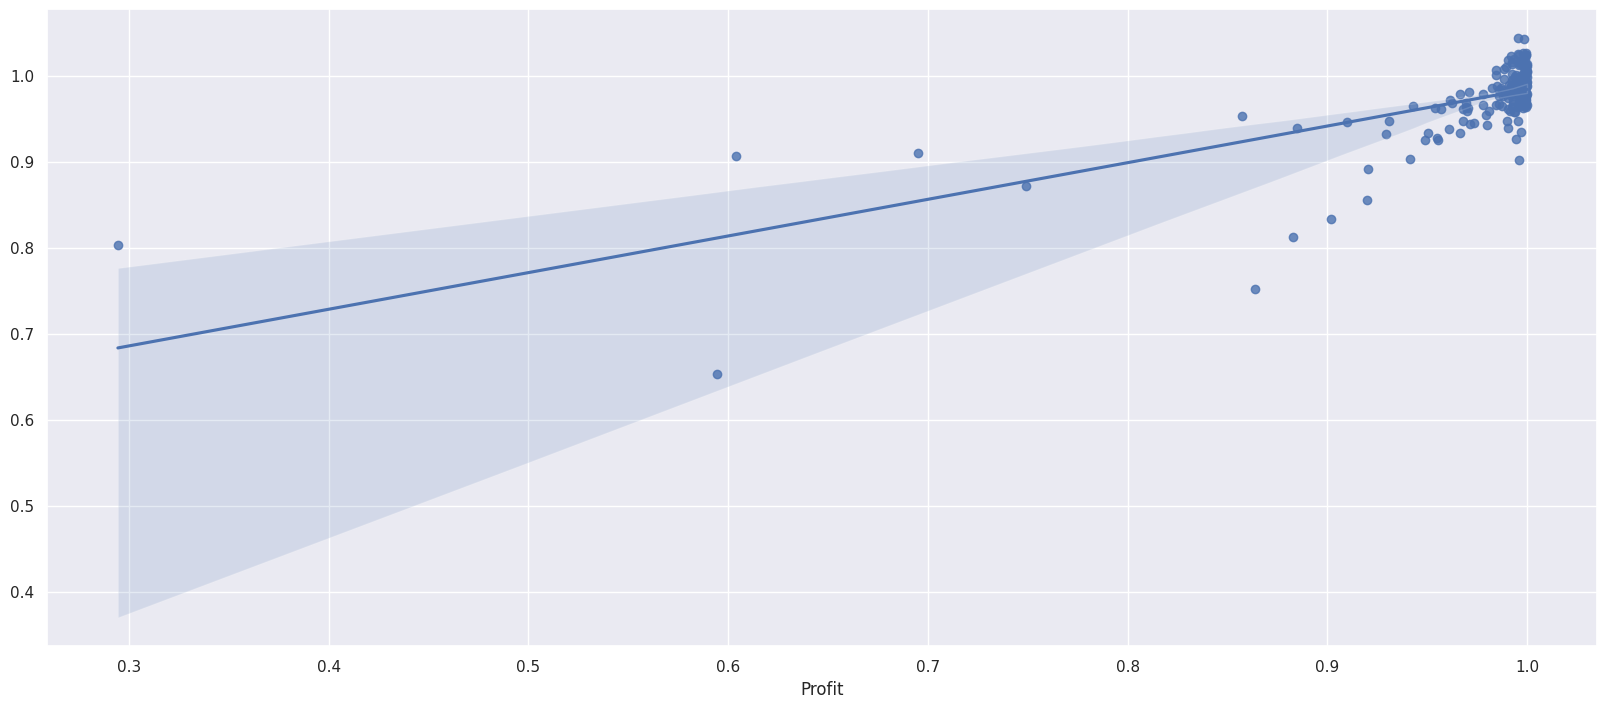

In [ ]:
#Gráfico de las predicciones realizadas
sns.regplot(x = y_perdidas_test, y = predictions_perdidas_rl)

#### Decision Trees

A continuación se llevará a cabo una "Feature Selection", que consiste en obtener las variables de los datos que maximicen el valor de "r2" a la hora de predecir el valor de "Profit", es decir utilizar las columnas que permiten tener un mejor rendimiento con el algoritmo elegido.

In [ ]:
#Ejecución de la "Feature Selection"
dt = DecisionTreeRegressor()
sfs_perdidas_dt = SFS(dt, scoring= 'r2')
sfs_perdidas_dt = sfs_perdidas_dt.fit(agrup_perdidas_fs.drop(["Profit"], axis=1), agrup_perdidas_fs["Profit"])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_sequential.py:211: FutureWarning: Leaving `n_features_to_select` to None is deprecated in 1.0 and will become 'auto' in 1.3. To keep the same behaviour as with None (i.e. select half of the features) and avoid this warning, you should manually set `n_features_to_select='auto'` and set tol=None when creating an instance.
  warnings.warn(


Una vez ejecutada la "Feature Selection", se procede a obtener los nombres de las features que maximizan el rendimiento del modelo.

In [ ]:
#Obtención de los features seleccionados por el algoritmo
dt_perdidas_features = sfs_perdidas_dt.get_feature_names_out()
dt_perdidas_features

array(['Sales', 'Sales Quantity', 'Discount', 'Category_Furniture',
       'Category_Office Supplies', 'Sub-Category_Appliances',
       'Sub-Category_Bookcases', 'Sub-Category_Fasteners',
       'Sub-Category_Furnishings', 'Sub-Category_Phones',
       'Sub-Category_Storage', 'Sub-Category_Supplies',
       'Ship Mode_Same Day', 'Ship Mode_Standard Class', 'Region_Central',
       'Region_East'], dtype=object)

Una vez determinadas las variables a utilizar en el modelo, se separa por un lado la variable objetivo u target que se busca predecir, en este caso "Profit" que representa el beneficio o ganacia en cada pedido. Y, por otro lado todas las variables/columnas seleccionadas por el algoritmo de "Feature Selection".

In [ ]:
#Variables No Objetivo 
x_perdidas_dt = agrup_perdidas_fs.filter(dt_perdidas_features, axis=1)
#Varible objetivo/target
y_perdidas_dt = agrup_perdidas_fs["Profit"]

Los valores se deben dividir por un lado en datos de entrenamiento y por otro lado en datos de prueba.

In [ ]:
#División de los datos entre prueba (30%) y entrenamiento (70%)
x_perdidas_train, x_perdidas_test, y_perdidas_train, y_perdidas_test = train_test_split(x_perdidas_dt, y_perdidas_dt, test_size=0.30, random_state=101)

Una vez divididos los datos, se procede a crear el modelo propiamente dicho.

In [ ]:
#Entrenamiento del Modelo
model_perdidas_dt =  DecisionTreeRegressor(max_depth=9, random_state=20)
model_perdidas_dt.fit(x_perdidas_train, y_perdidas_train)

DecisionTreeRegressor(max_depth=9, random_state=20)

In [ ]:
#Obtención de Predicciones del modelo
predictions_perdidas_dt = model_perdidas_dt.predict(x_perdidas_test)
predictions_perdidas_dt

array([0.99903602, 0.74993551, 0.99108442, 0.99398321, 0.99286829,
       0.99286829, 0.99915879, 0.99108442, 0.99915879, 0.9993966 ,
       0.99320946, 0.99205355, 0.99820196, 0.99398321, 0.96487029,
       0.98711321, 0.7324886 , 0.99398321, 0.99677071, 0.94726956,
       0.9993966 , 0.99320946, 0.99820196, 0.99915879, 0.96697056,
       0.9993966 , 0.99286829, 0.94726956, 0.98154805, 0.96612713,
       0.99286829, 0.9976082 , 0.99932673, 0.99623744, 0.99398321,
       0.99398321, 0.96612713, 0.99398321, 0.99677071, 0.98189986,
       0.9944024 , 0.99977516, 0.99286829, 0.9976082 , 0.98690421,
       0.99041929, 0.9976082 , 0.99451088, 0.99812648, 0.99205355,
       0.99286829, 0.99932673, 0.99977516, 0.99320946, 0.9993966 ,
       0.99596051, 0.86531567, 0.97673894, 0.99677071, 0.99820196,
       0.99451088, 0.99320946, 0.9976082 , 0.97673894, 0.9976082 ,
       0.9976082 , 0.98476078, 0.9544149 , 0.99205355, 0.90881798,
       0.9957388 , 0.7324886 , 0.99677071, 0.97010156, 0.99903

Una vez entrenado el modelo, se procede a evaluar el mismo. En este caso se utilizó como métrica de evaluación a "R Cuadrado (R2)".

In [ ]:
# Métrica R2
r2 = r2_score(y_perdidas_test, predictions_perdidas_dt)
print('R-squared scores:', round(r2, 2))

R-squared scores: 0.67


<Axes: xlabel='Profit'>

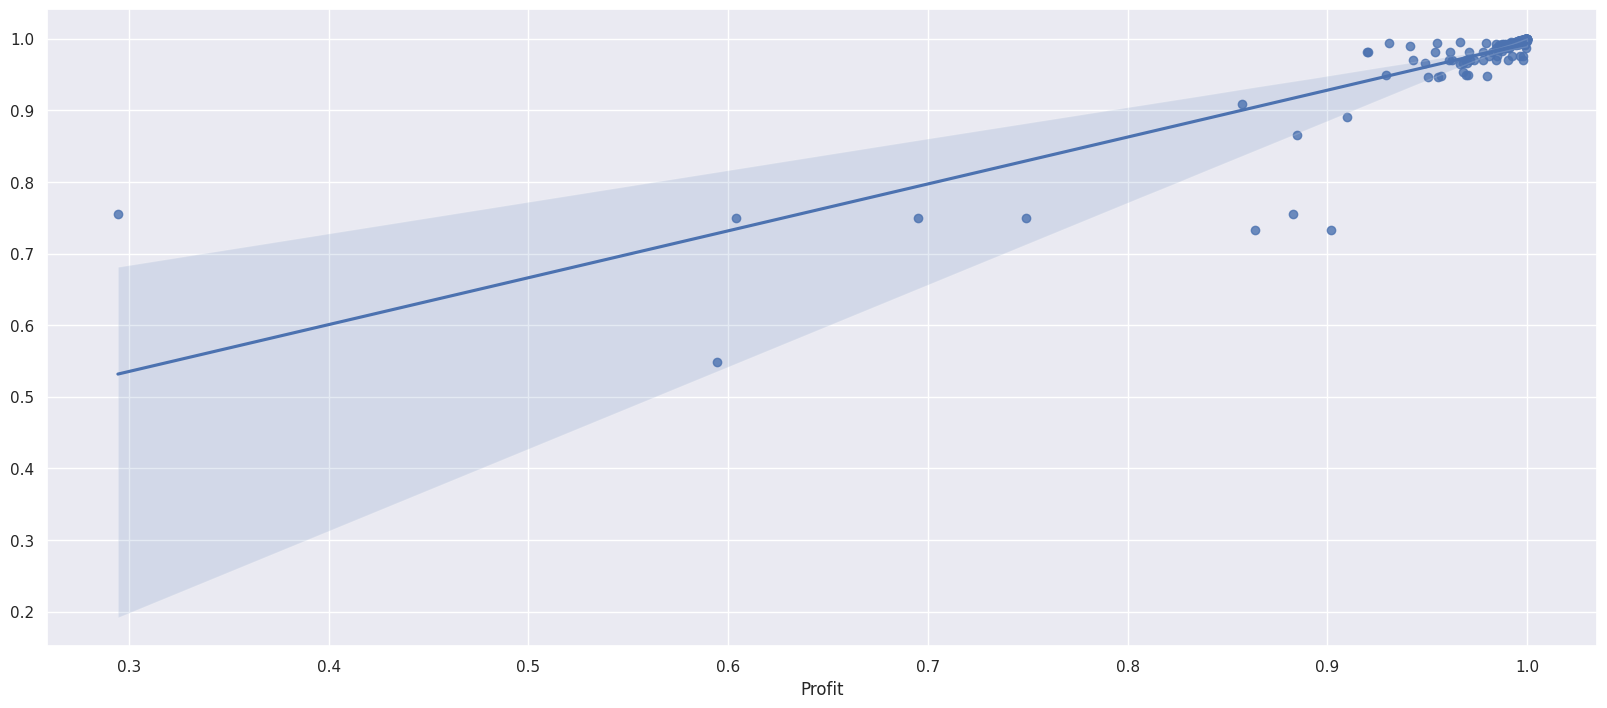

In [ ]:
#Gráfico de las predicciones realizadas
sns.regplot(x = y_perdidas_test, y = predictions_perdidas_dt)

In [ ]:
# Obtener los nombres de las características
features_perdidas_dt = list(x_perdidas_test.columns)

# Obtener la importancia de las características
importance_perdidas_dt = model_perdidas_dt.feature_importances_

# Crear un DataFrame con los nombres de las características y su importancia
df_importance_perdidas_dt = pd.DataFrame({'Feature': features_perdidas_dt, 'Importance': importance_perdidas_dt})

# Ordenar el DataFrame por importancia en orden descendente
df_importance_perdidas_dt = df_importance_perdidas_dt.sort_values('Importance', ascending=False)

# Imprimir los resultados
print(round(df_importance_perdidas_dt,2))

                     Feature  Importance
0                      Sales        0.60
2                   Discount        0.36
5    Sub-Category_Appliances        0.02
13  Ship Mode_Standard Class        0.01
3         Category_Furniture        0.00
4   Category_Office Supplies        0.00
15               Region_East        0.00
14            Region_Central        0.00
1             Sales Quantity        0.00
6     Sub-Category_Bookcases        0.00
9        Sub-Category_Phones        0.00
12        Ship Mode_Same Day        0.00
7     Sub-Category_Fasteners        0.00
8   Sub-Category_Furnishings        0.00
10      Sub-Category_Storage        0.00
11     Sub-Category_Supplies        0.00


#### Random Forest

En el caso de "Random Forest" no es necesario llevar a cabo un proceso de "Feature Selction" propio por dos razones:  
* La primera es porque al tratarse de un algoritmo que trabaja con varios "Decision Trees" simplemente se pueden reutilizar los valores obtenidos del "Feature Selection" realizado en el algoritmo "Decision Trees". 
* La segunda razón es porque el tiempo de procesamiento necesario para realizar este proceso es demasiado alto.

In [ ]:
#Ejecución de la "Feature Selection"
dt = DecisionTreeRegressor()
sfs_perdidas_dt = SFS(dt, scoring= 'r2')
sfs_perdidas_dt = sfs_perdidas_dt.fit(agrup_perdidas_fs.drop(["Profit"], axis=1), agrup_perdidas_fs["Profit"])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_sequential.py:211: FutureWarning: Leaving `n_features_to_select` to None is deprecated in 1.0 and will become 'auto' in 1.3. To keep the same behaviour as with None (i.e. select half of the features) and avoid this warning, you should manually set `n_features_to_select='auto'` and set tol=None when creating an instance.
  warnings.warn(


Una vez ejecutada la "Feature Selection", se procede a obtener los nombres de las features que maximizan el rendimiento del modelo.

In [ ]:
#Obtención de los features seleccionados por el algoritmo
rf_perdidas_features = sfs_perdidas_dt.get_feature_names_out()
rf_perdidas_features

array(['Sales', 'Sales Quantity', 'Discount', 'Category_Furniture',
       'Category_Office Supplies', 'Sub-Category_Appliances',
       'Sub-Category_Chairs', 'Sub-Category_Fasteners',
       'Sub-Category_Phones', 'Sub-Category_Storage',
       'Sub-Category_Supplies', 'Sub-Category_Tables',
       'Ship Mode_Same Day', 'Ship Mode_Second Class',
       'Segment_Home Office', 'Region_East'], dtype=object)

Una vez determinadas las variables a utilizar en el modelo, se separa por un lado la variable objetivo u target que se busca predecir, en este caso "Profit" que representa el beneficio o ganacia en cada pedido. Y, por otro lado todas las variables/columnas seleccionadas por el algoritmo de "Feature Selection".

In [ ]:
#Variables No Objetivo 
x_perdidas_rf = agrup_perdidas_fs.filter(rf_perdidas_features, axis=1)
#Varible objetivo/target
y_perdidas_rf = agrup_perdidas_fs["Profit"]

Los valores se deben dividir por un lado en datos de entrenamiento y por otro lado en datos de prueba.

In [ ]:
#División de los datos entre prueba (30%) y entrenamiento (70%)
x_perdidas_train, x_perdidas_test, y_perdidas_train, y_perdidas_test = train_test_split(x_perdidas_rf, y_perdidas_rf, test_size=0.30, random_state=101)

Una vez divididos los datos, se procede a crear el modelo propiamente dicho.

In [ ]:
#Entrenamiento del Modelo
model_perdidas_rf = RandomForestRegressor(n_estimators = 50, random_state = 101)
model_perdidas_rf.fit(x_perdidas_train, y_perdidas_train) 

RandomForestRegressor(n_estimators=50, random_state=101)

In [ ]:
#Obtención de Predicciones del modelo
predictions_perdidas_rf = model_perdidas_rf.predict(x_perdidas_test)
predictions_perdidas_rf

array([0.99944851, 0.77105327, 0.98349233, 0.99403584, 0.99426743,
       0.99158859, 0.99883193, 0.98605682, 0.99932683, 0.99968042,
       0.99513772, 0.99374157, 0.99853441, 0.99356297, 0.96705274,
       0.98683114, 0.65827941, 0.9942936 , 0.99599978, 0.95087073,
       0.99911455, 0.99354026, 0.99852921, 0.99924571, 0.96066669,
       0.99968725, 0.99312934, 0.95088441, 0.94063309, 0.96258861,
       0.99457974, 0.99655543, 0.99943001, 0.99609736, 0.99282641,
       0.99399004, 0.95994727, 0.99434318, 0.99721951, 0.98160927,
       0.97295028, 0.99979413, 0.98967427, 0.99700925, 0.98973332,
       0.94742359, 0.99807042, 0.9963478 , 0.99770986, 0.99034834,
       0.99113383, 0.99920363, 0.9998051 , 0.99301971, 0.99975006,
       0.99689185, 0.87253005, 0.97577106, 0.99744128, 0.99706696,
       0.99522196, 0.99215832, 0.99868536, 0.97730512, 0.99734086,
       0.9986739 , 0.98868421, 0.95969763, 0.99089461, 0.86342401,
       0.99138545, 0.6644952 , 0.99537614, 0.96793966, 0.99934

Una vez entrenado el modelo, se procede a evaluar el mismo. En este caso se utilizó como métrica de evaluación a "R Cuadrado (R2)".

In [ ]:
# Métrica R2
r2 = r2_score(y_perdidas_test, predictions_perdidas_rf)
print('R-squared scores:', round(r2, 2))

R-squared scores: 0.68


<Axes: xlabel='Profit'>

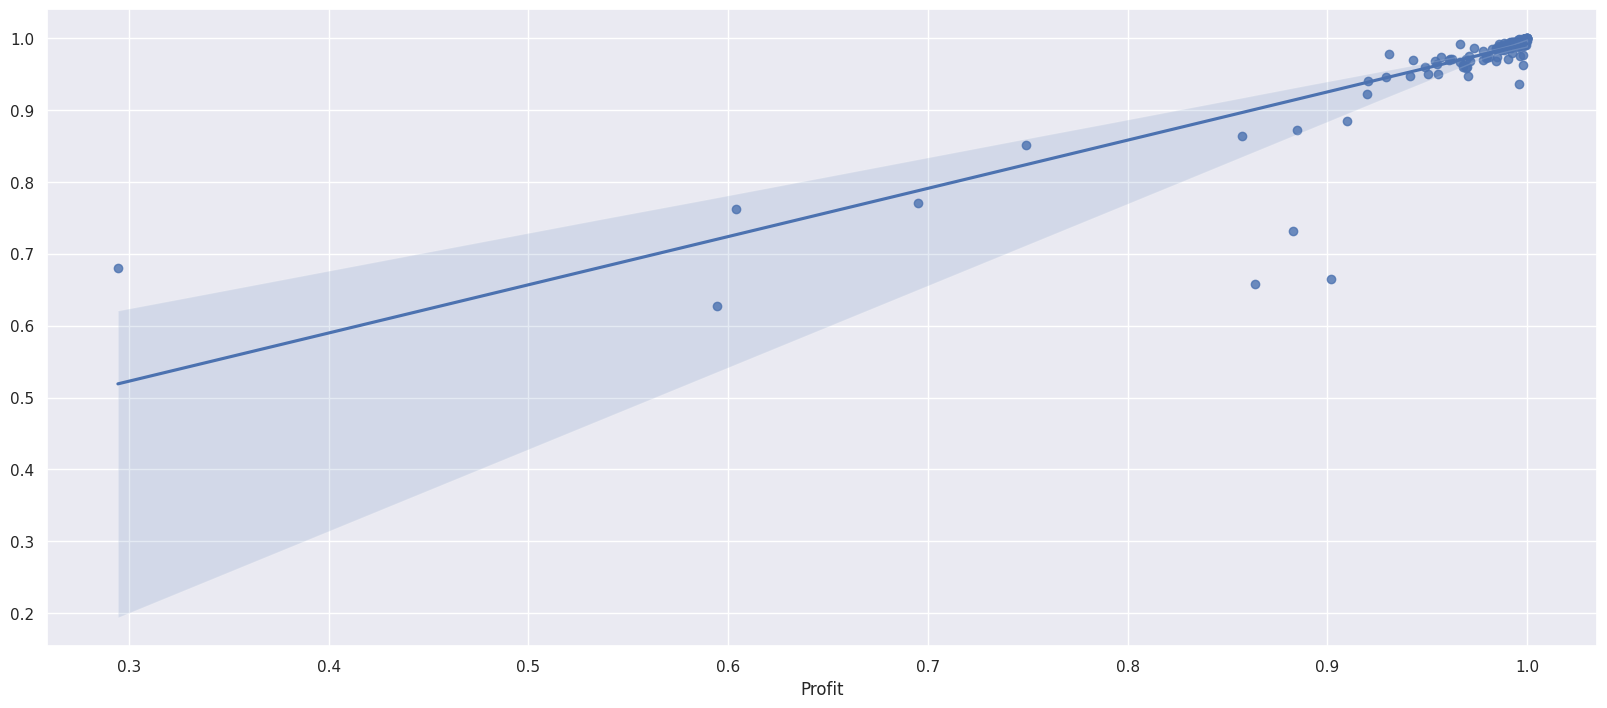

In [ ]:
#Gráfico de las predicciones realizadas
sns.regplot(x = y_perdidas_test, y = predictions_perdidas_rf)

In [ ]:
# Obtener los nombres de las características
features_perdidas_rf = list(x_perdidas_test.columns)

# Obtener la importancia de las características
importance_perdidas_rf = model_perdidas_rf.feature_importances_

# Crear un DataFrame con los nombres de las características y su importancia
df_importance_perdidas_rf = pd.DataFrame({'Feature': features_perdidas_rf, 'Importance': importance_perdidas_rf})

# Ordenar el DataFrame por importancia en orden descendente
df_importance_perdidas_rf = df_importance_perdidas_rf.sort_values('Importance', ascending=False)

# Imprimir los resultados
print(round(df_importance_perdidas_rf,2))

                     Feature  Importance
0                      Sales        0.61
2                   Discount        0.27
1             Sales Quantity        0.04
3         Category_Furniture        0.02
5    Sub-Category_Appliances        0.02
14       Segment_Home Office        0.02
15               Region_East        0.01
4   Category_Office Supplies        0.01
13    Ship Mode_Second Class        0.00
11       Sub-Category_Tables        0.00
6        Sub-Category_Chairs        0.00
12        Ship Mode_Same Day        0.00
9       Sub-Category_Storage        0.00
8        Sub-Category_Phones        0.00
10     Sub-Category_Supplies        0.00
7     Sub-Category_Fasteners        0.00


#### Conclusiones

De acuerdo a la métrica de evaluación utilizada en el proyecto (R Cuadrado), el mejor modelo fue el que se entrenó con el algoritmo Random Forest, obteniendo un valor de 0,68.

Según el mejor modelo entrenado, las siguientes son las variables que más importancia tienen a la hora de predecir las ganancias de ventas mensuales: 

In [ ]:
print(round(df_importance_perdidas_rf,2))

                     Feature  Importance
0                      Sales        0.61
2                   Discount        0.27
1             Sales Quantity        0.04
3         Category_Furniture        0.02
5    Sub-Category_Appliances        0.02
14       Segment_Home Office        0.02
15               Region_East        0.01
4   Category_Office Supplies        0.01
13    Ship Mode_Second Class        0.00
11       Sub-Category_Tables        0.00
6        Sub-Category_Chairs        0.00
12        Ship Mode_Same Day        0.00
9       Sub-Category_Storage        0.00
8        Sub-Category_Phones        0.00
10     Sub-Category_Supplies        0.00
7     Sub-Category_Fasteners        0.00


## Outliers

### Agrupamiento de Datos

Actualmente por el formato de los datos, no es posible responder las preguntar ni cumplir con los objetivos planteados.  
Para tratar esta situación se agruparan los datos para poder cumplir con los objetivos. Más adelante se muestra el proceso mostrando sobre qué criterios se agrupan los datos.

In [ ]:
#Lectura del DataFrame
df_agrup_outliers = df_outliers

Lo primero consiste en tratar los datos actuales para que tengan el formato óptimo para llevar a cabo todo este proceso.  
Se procede a separar la columna "Order Date" en años y meses, ignorando los días.

In [ ]:
#Creación de la columna "Anio" a partir de "Order Date"
df_agrup_outliers.insert(loc = 2,
          column = 'Anio',
          value = pd.DatetimeIndex(pd.to_datetime(df_agrup_outliers['Order Date'])).to_period('Y'))

In [ ]:
#Creación de la columna Mes en DataFrame
df_agrup_outliers.insert(loc = 3,
          column = 'Mes',
          value = 0)

In [ ]:
#Asignación de valores a la columna "Mes" a partir de los datos en "Order Date"
long = len(df_agrup_outliers["Order Date"])
ind_col_fecha = df_agrup_outliers.columns.get_loc("Order Date")
ind_col_mes = df_agrup_outliers.columns.get_loc("Mes")
for i in range(long):
  fecha_dt = datetime.strptime(df_agrup_outliers.iloc[i,ind_col_fecha], '%m/%d/%Y')
  df_agrup_outliers.iloc[i,ind_col_mes] = fecha_dt.month
df_agrup_outliers

Order ID Order Date  Anio  Mes   Ship Date       Ship Mode  \
Row ID                                                                     
1       CA-2016-152156  11/8/2016  2016   11  11/11/2016    Second Class   
3       CA-2016-138688  6/12/2016  2016    6   6/16/2016    Second Class   
7       CA-2014-115812   6/9/2014  2014    6   6/14/2014  Standard Class   
10      CA-2014-115812   6/9/2014  2014    6   6/14/2014  Standard Class   
11      CA-2014-115812   6/9/2014  2014    6   6/14/2014  Standard Class   
...                ...        ...   ...  ...         ...             ...   
9961    CA-2017-141446  9/16/2017  2017    9   9/18/2017    Second Class   
9967    CA-2016-146374  12/5/2016  2016   12  12/10/2016    Second Class   
9978    US-2016-103674  12/6/2016  2016   12  12/10/2016  Standard Class   
9983    US-2016-157728  9/22/2016  2016    9   9/28/2016  Standard Class   
9992    CA-2017-121258  2/26/2017  2017    2    3/3/2017  Standard Class   

       Customer ID    Customer Name      Segment        Country  ...   Region  \
Row ID                                                           ...            
1         CG-12520      Claire Gute     Consumer  United States  ...    South   
3         DV-13045  Darrin Van Huff    Corporate  United States  ...     West   
7         BH-11710  Brosina Hoffman     Consumer  United States  ...     West   
10        BH-11710  Brosina Hoffman     Consumer  United States  ...     West   
11        BH-11710  Brosina Hoffman     Consumer  United States  ...     West   
...            ...              ...          ...            ...  ...      ...   
9961      CL-12700     Craig Leslie  Home Office  United States  ...    South   
9967      HE-14800     Harold Engle    Corporate  United States  ...     East   
9978      AP-10720       Anne Pryor  Home Office  United States  ...     West   
9983      RC-19960       Ryan Crowe     Consumer  United States  ...  Central   
9992      DB-13060      Dave Brooks     Consumer  United States  ...     West   

             Product ID         Category Sub-Category  \
Row ID                                                  
1       FUR-BO-10001798        Furniture    Bookcases   
3       OFF-LA-10000240  Office Supplies       Labels   
7       OFF-AR-10002833  Office Supplies          Art   
10      OFF-AP-10002892  Office Supplies   Appliances   
11      FUR-TA-10001539        Furniture       Tables   
...                 ...              ...          ...   
9961    TEC-AC-10002305       Technology  Accessories   
9967    OFF-EN-10004483  Office Supplies    Envelopes   
9978    OFF-FA-10003467  Office Supplies    Fasteners   
9983    OFF-PA-10002195  Office Supplies        Paper   
9992    TEC-PH-10003645       Technology       Phones   

                                             Product Name     Sales Quantity  \
Row ID                                                                         
1                       Bush Somerset Collection Bookcase   261.960        2   
3       Self-Adhesive Address Labels for Typewriters b...    14.620        2   
7                                              Newell 322     7.280        4   
10                       Belkin F5C206VTEL 6 Outlet Surge   114.900        5   
11               Chromcraft Rectangular Conference Tables  1706.184        9   
...                                                   ...       ...      ...   
9961                KeyTronic E03601U1 - Keyboard - Beige    18.000        1   
9967           #10 White Business Envelopes,4 1/8 x 9 1/2   109.690        7   
9978             Alliance Big Bands Rubber Bands, 12/Pack    13.860        7   
9983    RSVP Cards & Envelopes, Blank White, 8-1/2" X ...    35.560        7   
9992                                Aastra 57i VoIP phone   258.576        2   

       Discount   Profit   Año  
Row ID                          
1           0.0  41.9136  2016  
3           0.0   6.8714  2016  
7           0.0   1.9656  2014  
10          0.0  34.470

Se cambia el nombre de la variable "Quantity" a "Product Quantity" para destacar que la cantidad mostrada es la cantidad de productos que se vendieron en cada venta.

In [ ]:
#Renombramiento de columna "Quantity" a "Product Quantity"
df_agrup_outliers = df_agrup_outliers.rename(columns={"Quantity":"Product Quantity"})

Se crea una columna llamada "Sales Quantity" con valor igual a 1 en todos los casos, para más adelante poder agrupar dichas ventas con varios criterios y conocer la cantidad de ventas incluidas en cada grupo.

In [ ]:
#Creación de la columna "Sales Quantity"
df_agrup_outliers.insert(loc = 20,
          column = 'Sales Quantity',
          value = 1)

Una vez creadas las columnas deseadas faltantes, se procede a eliminar aquellas columnas que no interesan para la creación del modelo de regresión por lo siguiente:
* Order ID: es un id, no aporta información relevante.
* Customer Name: no es posible incluir en el agrupamiento el nombre de cada cliente.  
* Customer ID: es un id, no aporta información relevante.
* Order Date: de este campo se obtuvo el año y el mes de cada venta, ya no es necesario conservar esta variable.
* Ship Date: la fecha de envío no es tan importante como la fecha de pedido, por lo que solo se utilizará esa fecha.
* Country: todos los registros tienen como valor "United States" por lo que no aporta valor al análisis. 
* City: si se quieren agregar las ciudades al agrupamiento la cantidad de datos se expandiría de manera desproporcionada y no se considera tan importante analizar un valor tan puntual. En su lugar se eligió la variable "Region" que es más abarcativa e igual de descriptiva de una manera menos puntual.
* State: al igual que en la variable "City", se prefiere un dato más abarcativo como "Region".
* Postal Code: es un id, no aporta información relevante.
* Product ID: es un id, no aporta información relevante.
* Product name: si se desea agregar esta variable al modelo, la cantidad de datos se incrementaría de manera desproporcionada y no se considera tan importante analizar un valor tan puntual y poco abarcativa. En su lugar se tomaron las variables "Category" y "Sub-Category". Esta variable será utilizada más adelante para hacer un análisis más puntual.

In [ ]:
#Eliminación de Columnas
df_agrup_outliers = df_agrup_outliers.drop(["Order ID", "Customer Name", "Customer ID", "Order Date", "Ship Date", "Country", "City", "State", "Postal Code", "Product ID", "Product Name"], axis=1)
df_agrup_outliers.head()

Anio  Mes       Ship Mode    Segment Region         Category  \
Row ID                                                                 
1       2016   11    Second Class   Consumer  South        Furniture   
3       2016    6    Second Class  Corporate   West  Office Supplies   
7       2014    6  Standard Class   Consumer   West  Office Supplies   
10      2014    6  Standard Class   Consumer   West  Office Supplies   
11      2014    6  Standard Class   Consumer   West        Furniture   

       Sub-Category     Sales  Product Quantity  Sales Quantity  Discount  \
Row ID                                                                      
1         Bookcases   261.960                 2               1       0.0   
3            Labels    14.620                 2               1       0.0   
7               Art     7.280                 4               1       0.0   
10       Appliances   114.900                 5               1       0.0   
11           Tables  1706.184                 9               1       0.2   

         Profit   Año  
Row ID                 
1       41.9136  2016  
3        6.8714  2016  
7        1.9656  2014  
10      34.4700  2014  
11      85.3092  2014

Ahora, se agrupan los datos de acuerdo al año, mes, categoría, sub categoría, modo de envío, segmento de cliente y región del cliente. Esto para obtener la cantidad de productos, cantidad de ventas, precio de las ventas, descuentos otorgados y ganancias obtenidas de acuerdo a dichos agrupamientos.

In [ ]:
#Agrupamiento de Datos
discount = df_agrup_outliers.groupby(["Anio","Mes","Category", "Sub-Category", "Ship Mode", "Segment", "Region"]).median().reset_index()
discount = discount["Discount"]
df_agrup_outliers = df_agrup_outliers.drop(["Discount"], axis=1)
df_agrup_outliers = df_agrup_outliers.groupby(["Anio","Mes","Category", "Sub-Category", "Ship Mode", "Segment", "Region"]).sum().reset_index()
df_agrup_outliers.insert(loc = 10,
          column = 'Discount',
          value = discount)
df_agrup_outliers.head(10)

<ipython-input-713-6ceca9404142>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  discount = df_agrup_outliers.groupby(["Anio","Mes","Category", "Sub-Category", "Ship Mode", "Segment", "Region"]).median().reset_index()
<ipython-input-713-6ceca9404142>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_agrup_outliers = df_agrup_outliers.groupby(["Anio","Mes","Category", "Sub-Category", "Ship Mode", "Segment", "Region"]).sum().reset_index()


Anio  Mes         Category Sub-Category       Ship Mode      Segment  \
0  2014    1        Furniture    Bookcases  Standard Class     Consumer   
1  2014    1        Furniture  Furnishings    Second Class     Consumer   
2  2014    1        Furniture  Furnishings  Standard Class     Consumer   
3  2014    1  Office Supplies          Art  Standard Class     Consumer   
4  2014    1  Office Supplies          Art  Standard Class     Consumer   
5  2014    1  Office Supplies          Art  Standard Class  Home Office   
6  2014    1  Office Supplies      Binders    Second Class    Corporate   
7  2014    1  Office Supplies      Binders  Standard Class     Consumer   
8  2014    1  Office Supplies      Binders  Standard Class  Home Office   
9  2014    1  Office Supplies    Envelopes    Second Class    Corporate   

    Region    Sales  Product Quantity  Sales Quantity  Discount    Profit  
0     West  333.999                 3               1      0.15    3.9294  
1     East  127.104                 6               1      0.20   28.5984  
2  Central  272.940                 3               1      0.00   30.0234  
3     East   19.536                 3               1      0.20    4.8840  
4     West   56.340                 9               2      0.00   18.5922  
5    South    5.480                 2               1      0.00    1.4796  
6    South    5.640                 3               1      0.00    2.7072  
7     East    3.928                 1               1      0.20    1.3257  
8    South  609.980                 2               1      0.00  274.4910  
9    South   50.940                 3               1      0.00   25.4700

### Visualizaciones - Análisis Numérico - Interpretación

A continuación se van graficar todas las variables del nuevo dataset obtenido con respecto a la variable objetivo que es "Profit", también se hará un conteo de los datos de cada variable. Luego se hará un análisis numérico y se obtendrá una interpretación de estos datos.

In [ ]:
#Copia del Dataframe
df_graf_outliers = df_agrup_outliers

#### Año

##### Gráfico

In [ ]:
#Creación Dataframe con la información deseada
muestra_año = df_graf_outliers.groupby('Anio')['Profit'].sum().reset_index()
muestra_año

Anio      Profit
0  2014  33183.6458
1  2015  36759.7811
2  2016  32342.3112
3  2017  50995.4255

<Axes: xlabel='Anio', ylabel='Profit'>

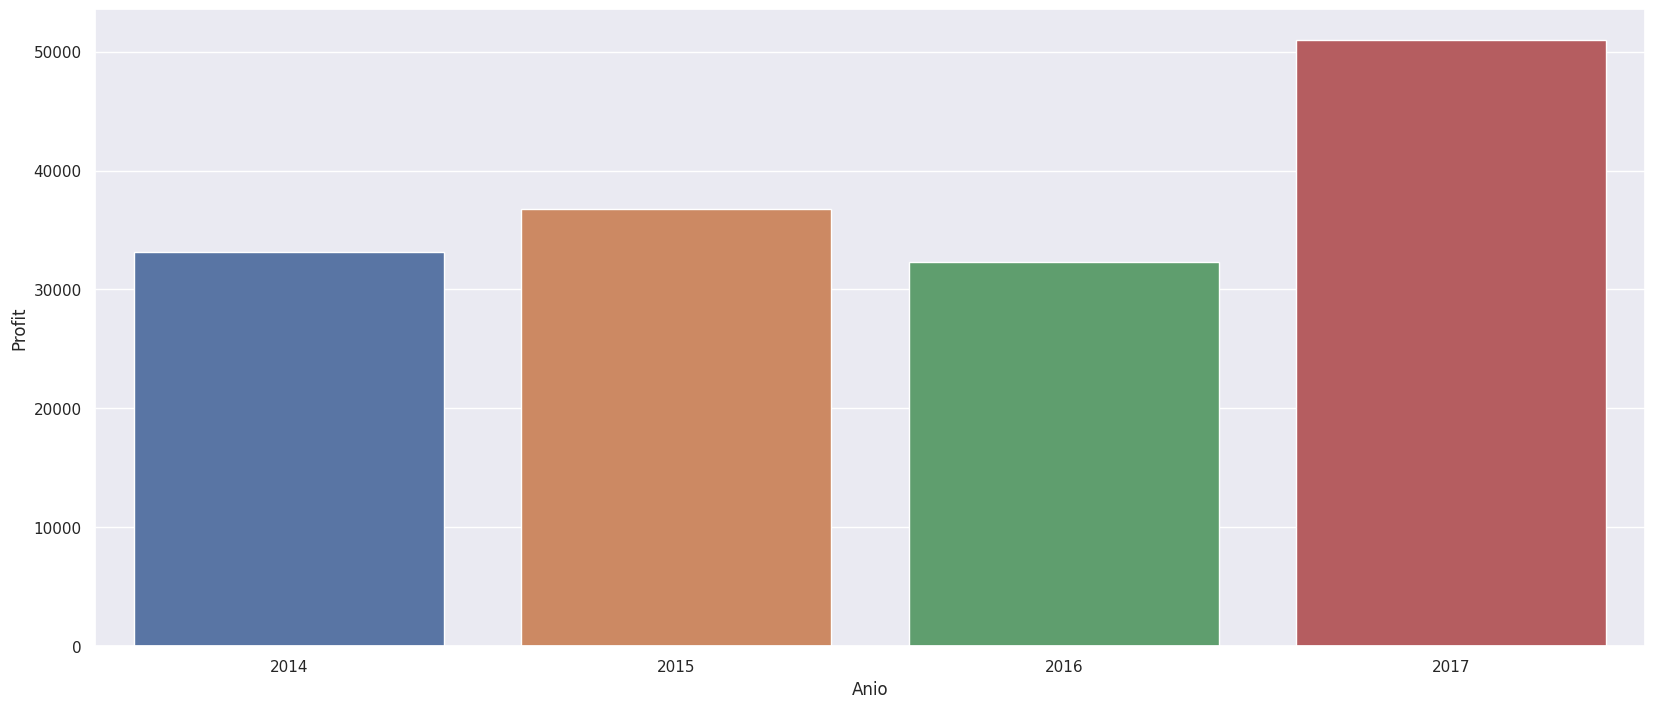

In [ ]:
#Gráfico comparando la variable con "Profit"
sns.set(rc={'figure.figsize':(20,8.27)})
sns.barplot(data=muestra_año, x="Anio", y= "Profit")

<Axes: xlabel='Anio', ylabel='count'>

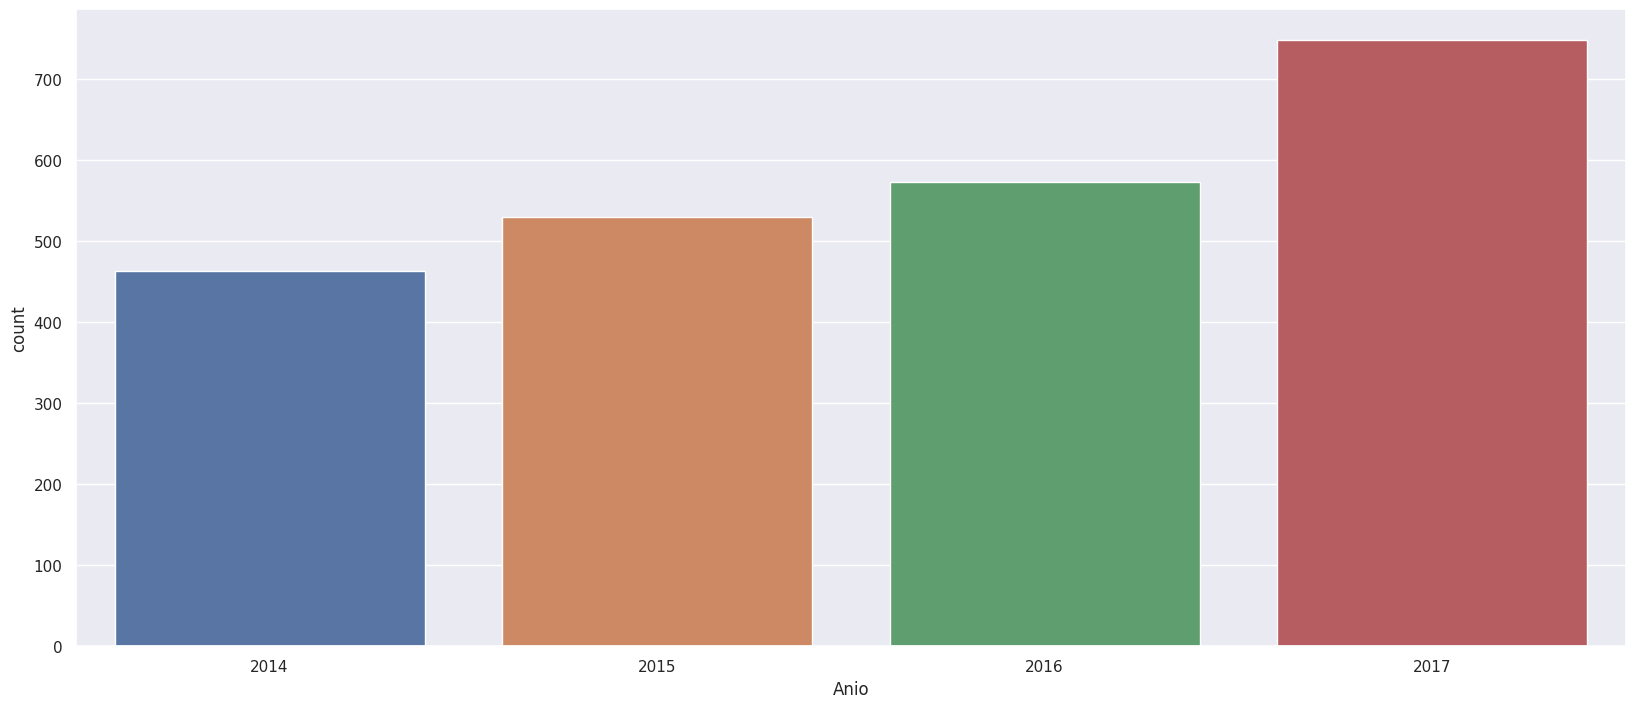

In [ ]:
#Gráfico de conteo de la variable
sns.countplot(data=df_graf_outliers, x="Anio")

##### Análisis Numérico

In [ ]:
#Resumen Numérico
muestra_año.describe()

Profit
count      4.000000
mean   38320.290900
std     8664.402117
min    32342.311200
25%    32973.312150
50%    34971.713450
75%    40318.692200
max    50995.425500

##### Insights

* El año que más ganancias y mayor cantidad de ventas generó fue 2017.
* El año 2016 no generó tantas ganancias en comparación con la cantidad de ventas que se realizaron ese año.

#### Mes

##### Gráfico

In [ ]:
#Creación Dataframe con la información deseada
muestra_mes = df_graf_outliers.groupby('Mes')['Profit'].sum().reset_index()
muestra_mes

Mes      Profit
0     1   4067.9785
1     2   3620.5789
2     3  10433.9301
3     4   8934.7342
4     5  10376.7583
5     6   9629.6477
6     7   7902.3352
7     8  10835.4875
8     9  25242.3005
9    10  14138.6382
10   11  27884.0440
11   12  20214.7305

<Axes: xlabel='Mes', ylabel='Profit'>

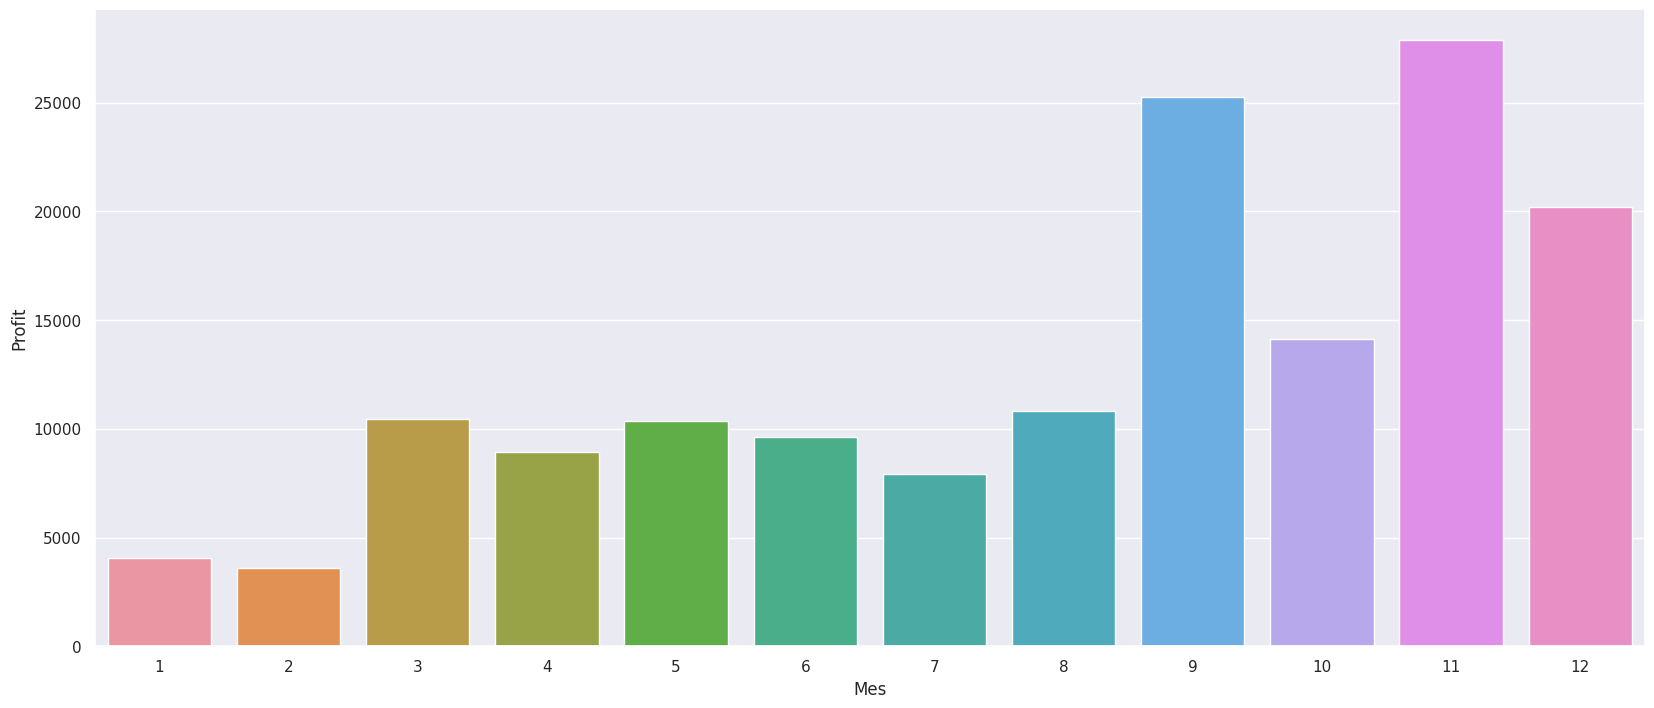

In [ ]:
#Gráfico comparando la variable con "Profit"
sns.set(rc={'figure.figsize':(20,8.27)})
sns.barplot(data=muestra_mes, x="Mes", y= "Profit")

<Axes: xlabel='Mes', ylabel='count'>

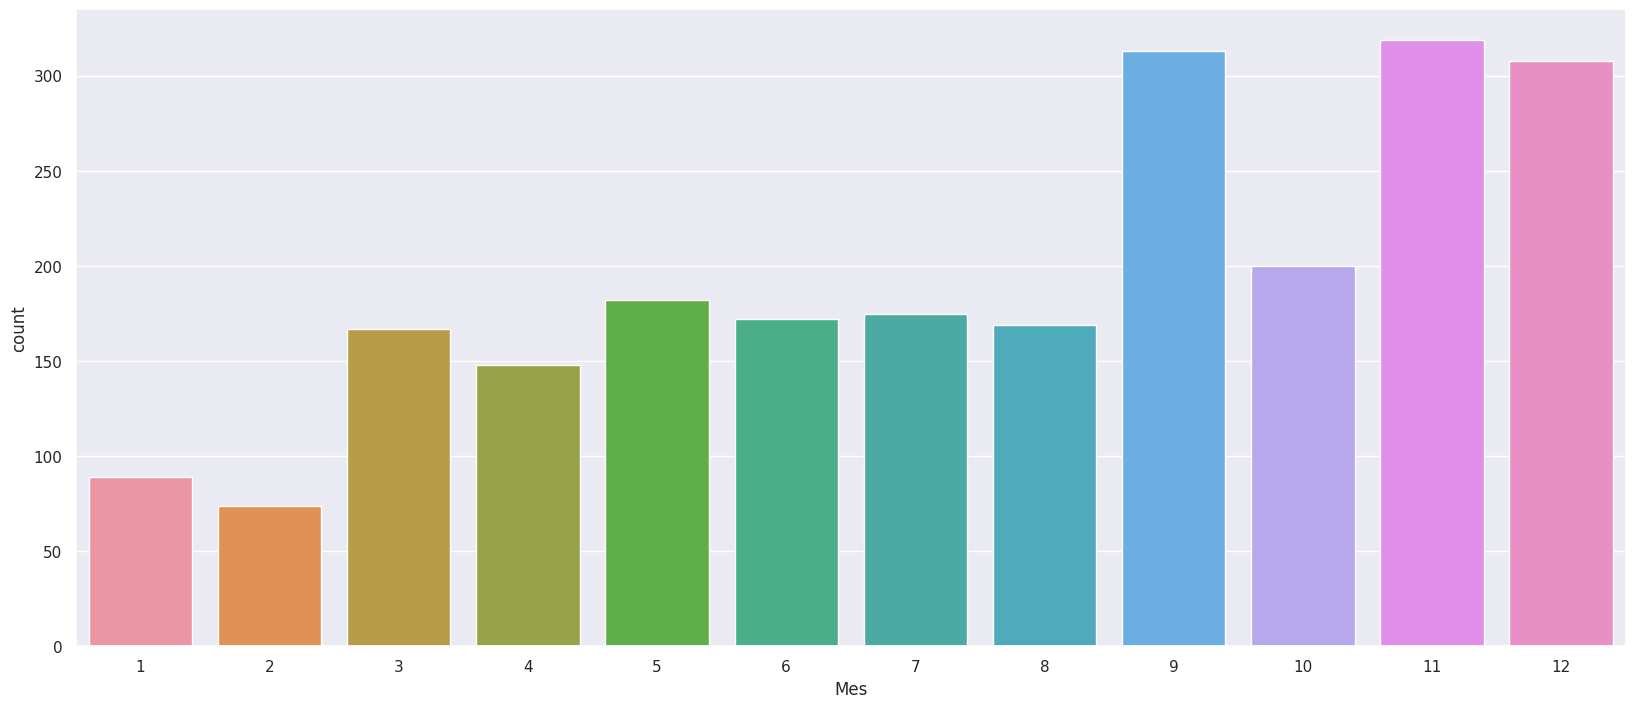

In [ ]:
#Gráfico de conteo de la variable
sns.countplot(data=df_graf_outliers, x="Mes")

##### Análisis Numérico

In [ ]:
#Resumen Numérico
muestra_mes.describe()

Mes        Profit
count  12.000000     12.000000
mean    6.500000  12773.430300
std     3.605551   7768.930756
min     1.000000   3620.578900
25%     3.750000   8676.634450
50%     6.500000  10405.344200
75%     9.250000  15657.661275
max    12.000000  27884.044000

##### Insights

* Los meses en los que se generaron más ganancias fueron Noviembre, Septiembre y Diciembre en ese orden.
* Los meses que mayor cantidad de ventas generaron fueron Noviembre, Septiembre y Diciembre también, lo único que llama la atención es que en Diciembre no se generan tantas ganancias en comparación con la cantidad vendida ese mes.

#### Category

##### Gráfico

In [ ]:
#Creación Dataframe con la información deseada
muestra_category = df_graf_outliers.groupby('Category')['Profit'].sum().reset_index()
muestra_category

Category      Profit
0        Furniture  22915.4203
1  Office Supplies  62719.2388
2       Technology  67646.5045

<Axes: xlabel='Category', ylabel='Profit'>

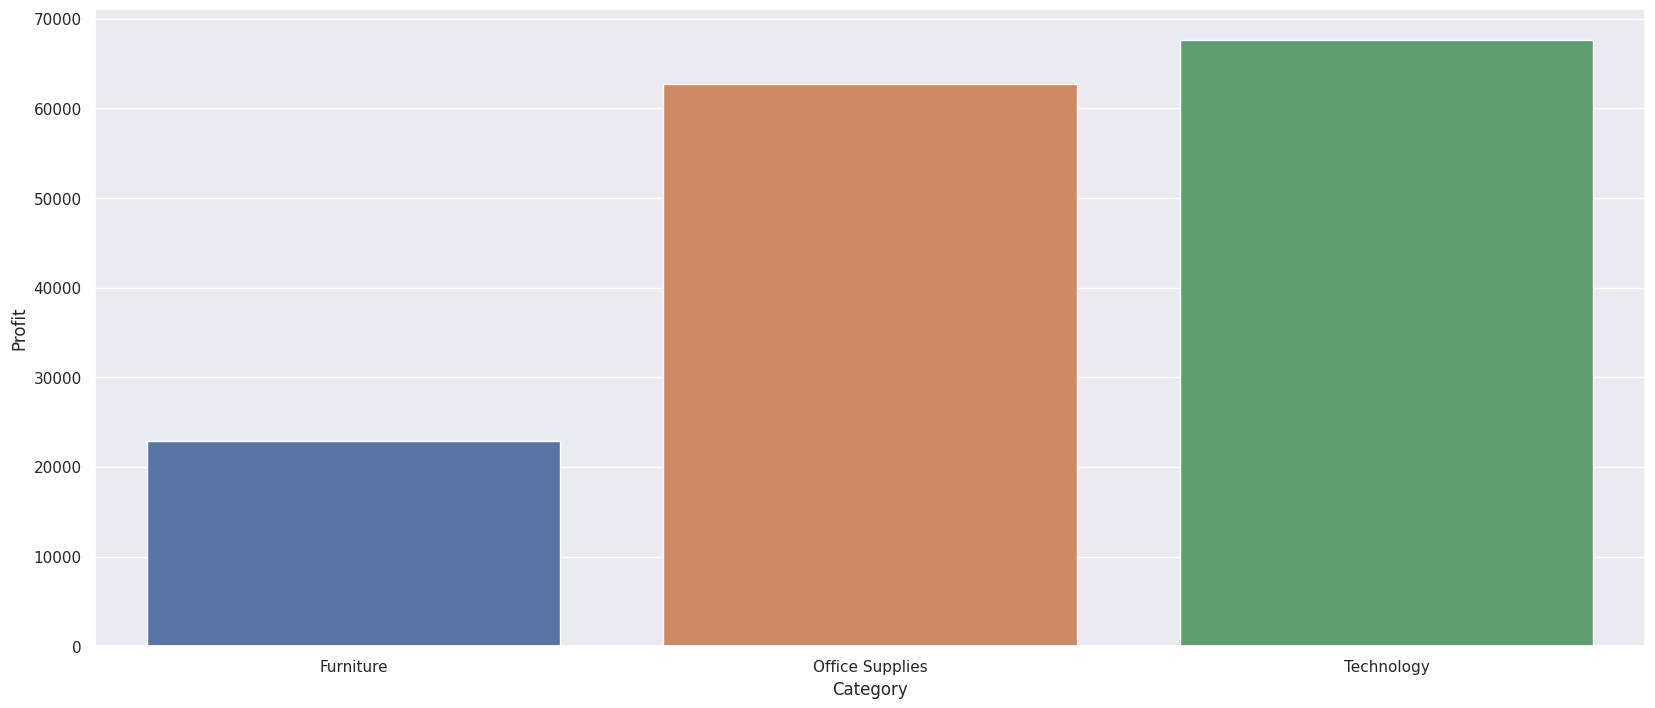

In [ ]:
#Gráfico comparando la variable con "Profit"
sns.set(rc={'figure.figsize':(20,8.27)})
sns.barplot(data=muestra_category, x="Category", y= "Profit")

<Axes: xlabel='Category', ylabel='count'>

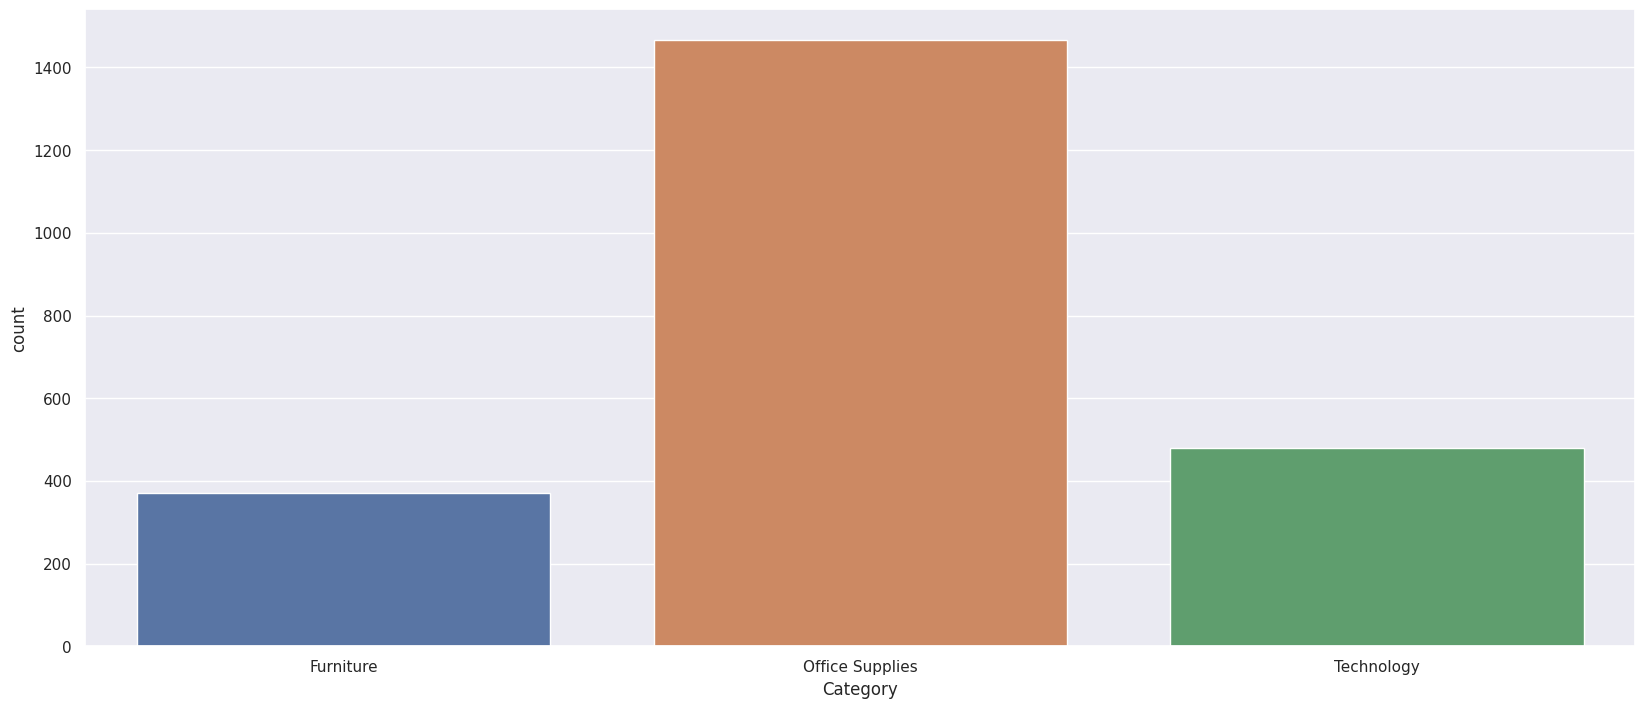

In [ ]:
#Gráfico de conteo de la variable
sns.countplot(data=df_graf_outliers, x="Category")

##### Análisis Numérico

In [ ]:
#Resumen Numérico
muestra_category.describe()

Profit
count      3.000000
mean   51093.721200
std    24527.167958
min    22915.420300
25%    42817.329550
50%    62719.238800
75%    65182.871650
max    67646.504500

##### Insights

* Los productos de la Categoría "Technology" son lo que generan mayor cantidad de gananciaspor sobre "Office Supplies".
* Los productos de la Categoría "Technology" representan una cantidad muy inferior a la cantidad de la Categoría "Office Supplies".
* La venta de algunos productos de la Categoría "Technology" generan una cantidad enorme de ganancias.

#### Sub Category

##### Gráfico

In [ ]:
#Creación Dataframe con la información deseada
muestra_scategory = df_graf_outliers.groupby('Sub-Category')['Profit'].sum().reset_index()
muestra_scategory

Sub-Category      Profit
0   Accessories  16503.3936
1    Appliances   8790.2528
2           Art   1657.2275
3       Binders  26437.0685
4     Bookcases   2270.1395
5        Chairs  11241.4255
6       Copiers  19412.2328
7     Envelopes   2505.0504
8     Fasteners    280.9094
9   Furnishings   5517.2214
10       Labels   1729.4042
11     Machines  15596.6442
12        Paper  11683.0443
13       Phones  16134.2339
14      Storage   9145.4368
15     Supplies    490.8449
16       Tables   3886.6339

<Axes: xlabel='Sub-Category', ylabel='Profit'>

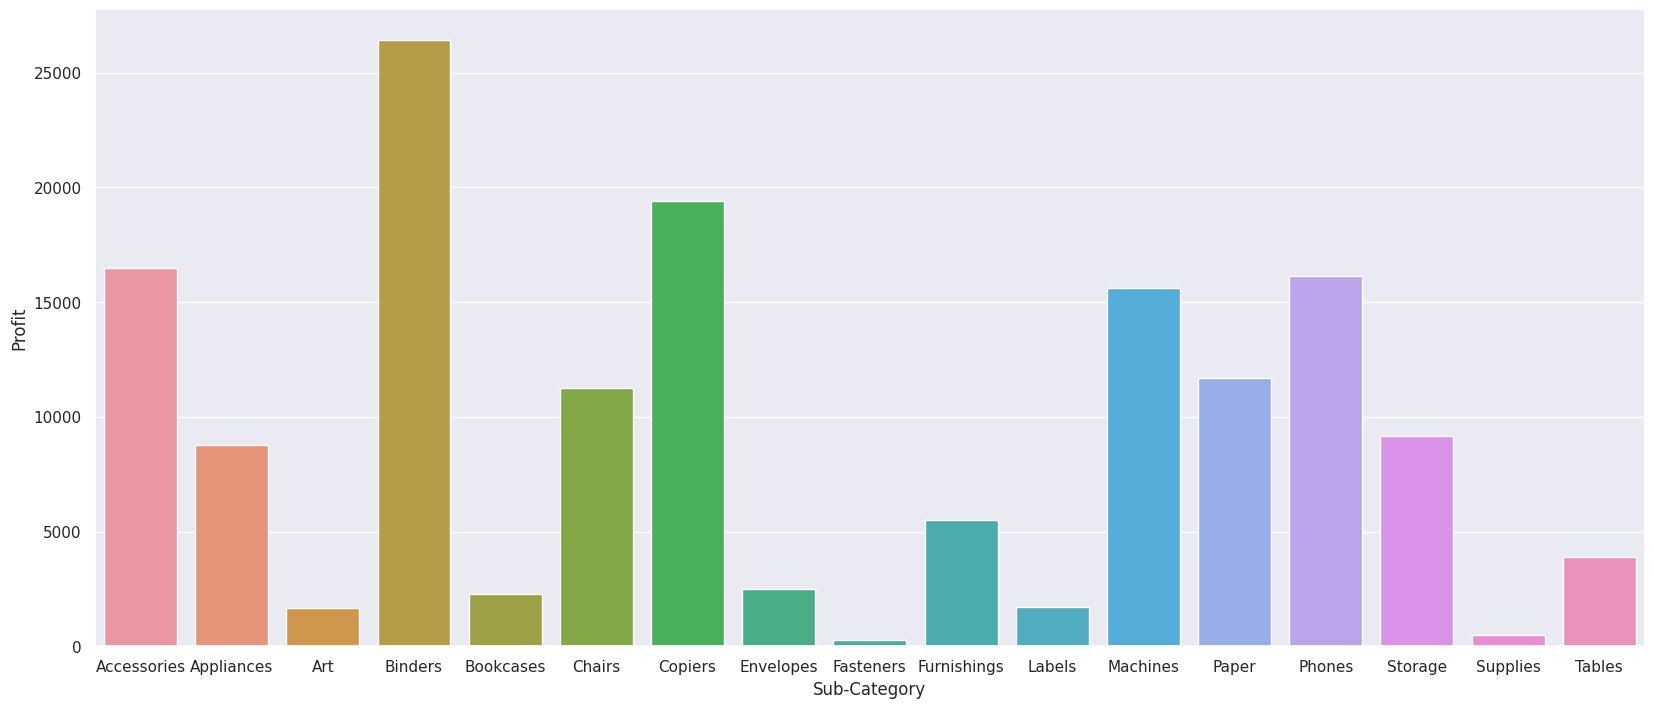

In [ ]:
#Gráfico comparando la variable con "Profit"
sns.set(rc={'figure.figsize':(20,8.27)})
sns.barplot(data=muestra_scategory, x="Sub-Category", y= "Profit")

<Axes: xlabel='Sub-Category', ylabel='count'>

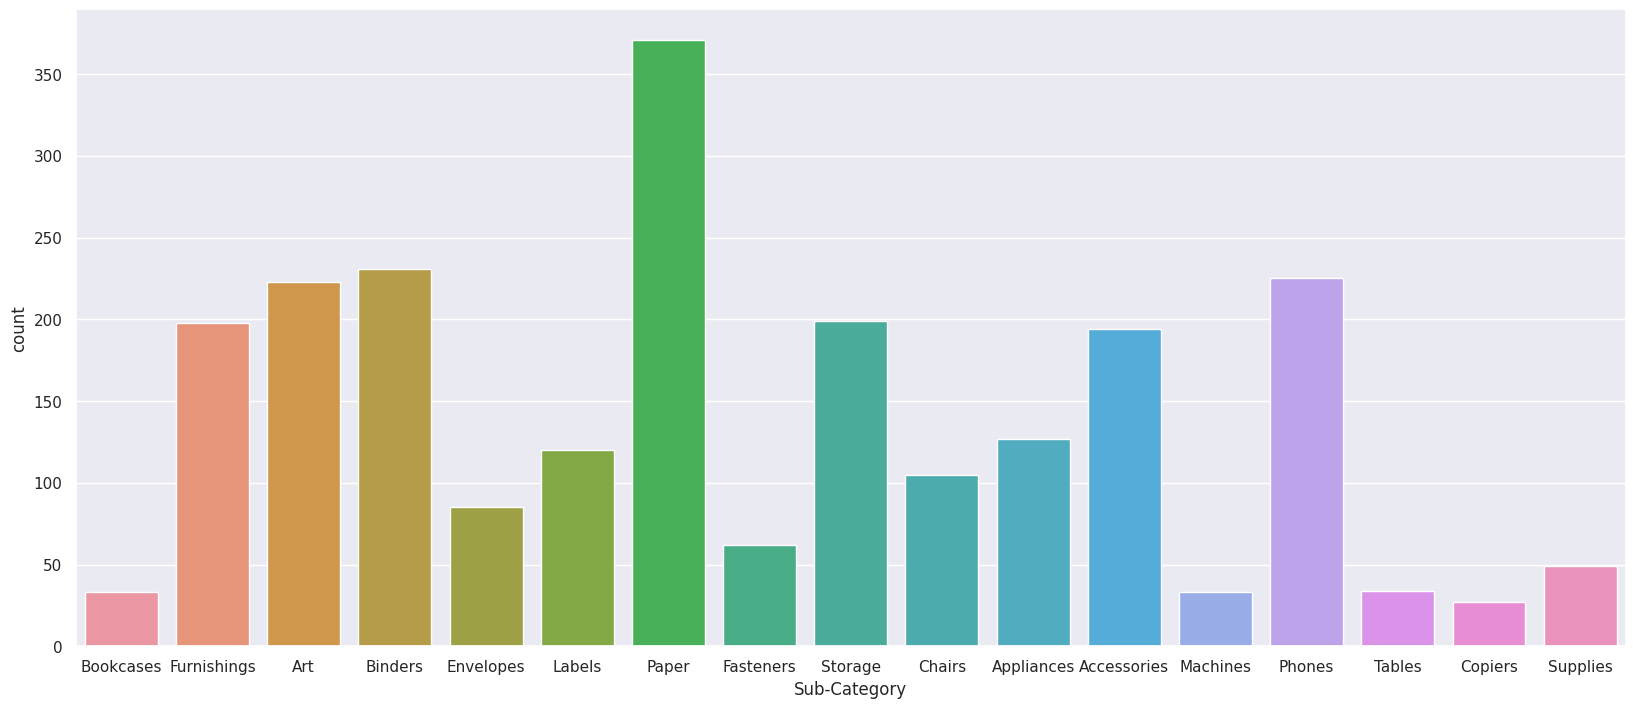

In [ ]:
#Gráfico de conteo de la variable
sns.countplot(data=df_graf_outliers, x="Sub-Category")

##### Análisis Numérico

In [ ]:
#Resumen Numérico
muestra_scategory.describe()

Profit
count     17.000000
mean    9016.539035
std     7731.513714
min      280.909400
25%     2270.139500
50%     8790.252800
75%    15596.644200
max    26437.068500

##### Insights

* La Sub Categoría que más ganancias genera es "Binders" con diferencia. 
* En un segundo escalón, las Sub Categorías que más ganancias generan son "Copiers", "Accesories", "Phones" y "Machines" en ese orden.
* Los productos más vendidos son de la Sub Categoría de "Paper" por mucho.

#### Ship Mode

##### Gráfico

In [ ]:
#Creación Dataframe con la información deseada
muestra_modo = df_graf_outliers.groupby('Ship Mode')['Profit'].sum().reset_index()
muestra_modo

Ship Mode      Profit
0     First Class  27567.4487
1        Same Day   9413.7067
2    Second Class  26066.2707
3  Standard Class  90233.7375

<Axes: xlabel='Ship Mode', ylabel='Profit'>

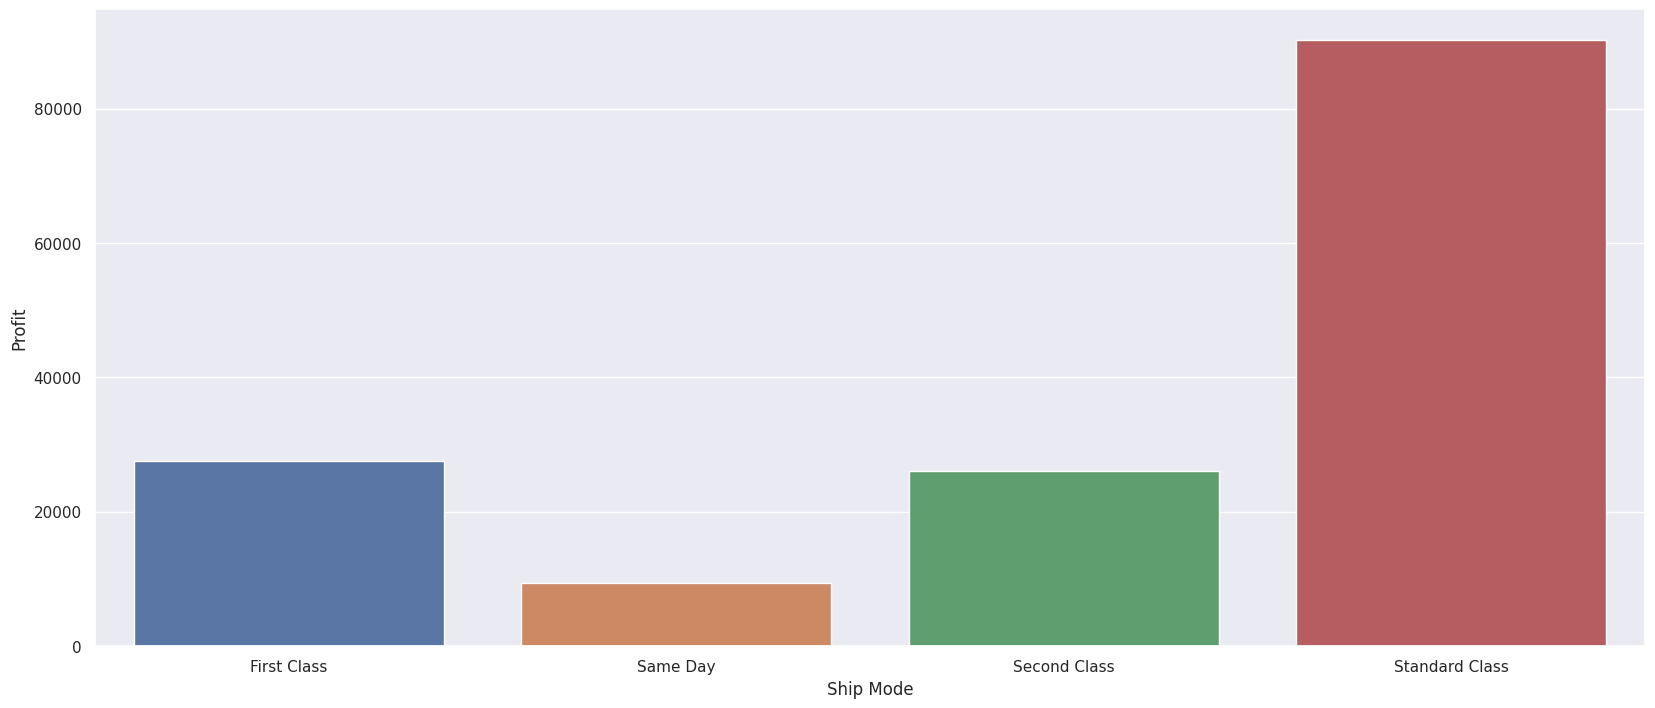

In [ ]:
#Gráfico comparando la variable con "Profit"
sns.set(rc={'figure.figsize':(20,8.27)})
sns.barplot(data=muestra_modo, x="Ship Mode", y= "Profit")

<Axes: xlabel='Ship Mode', ylabel='count'>

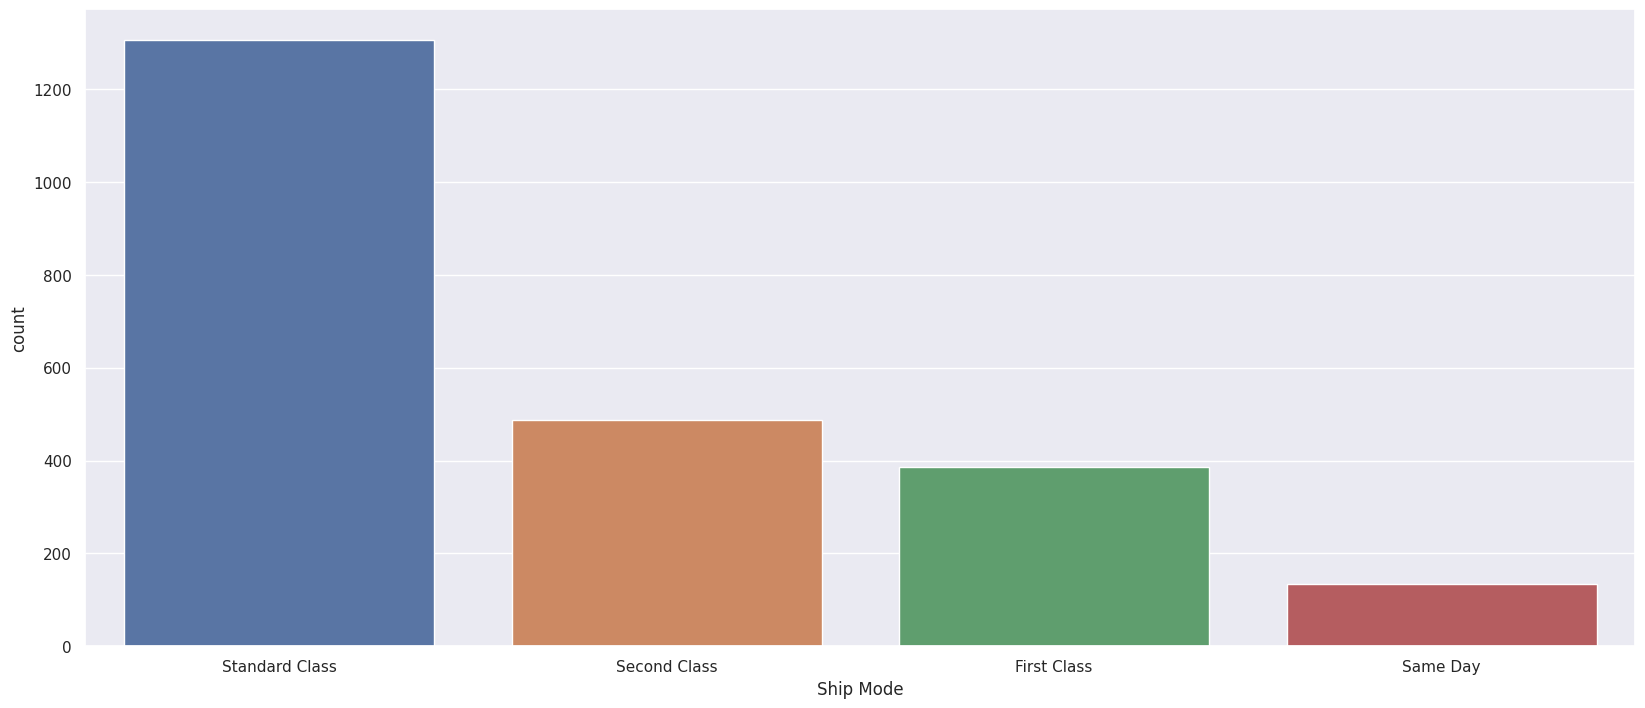

In [ ]:
#Gráfico de conteo de la variable
sns.countplot(data=df_graf_outliers, x="Ship Mode")

##### Análisis Numérico

In [ ]:
#Resumen Numérico
muestra_modo.describe()

Profit
count      4.0000
mean   38320.2909
std    35573.3101
min     9413.7067
25%    21903.1297
50%    26816.8597
75%    43234.0209
max    90233.7375

##### Insights

* El Modo de Envío "Standard Class" es el más común y el que más ganancias genera por mucho.
* Llama la atención que el modo de envío no genera tantas ganancias en función de la cantidad de ventas que genera.

#### Segment

##### Gráfico

In [ ]:
#Creación Dataframe con la información deseada
muestra_segmento = df_graf_outliers.groupby('Segment')['Profit'].sum().reset_index()
muestra_segmento

Segment      Profit
0     Consumer  74172.8789
1    Corporate  43847.2447
2  Home Office  35261.0400

<Axes: xlabel='Segment', ylabel='Profit'>

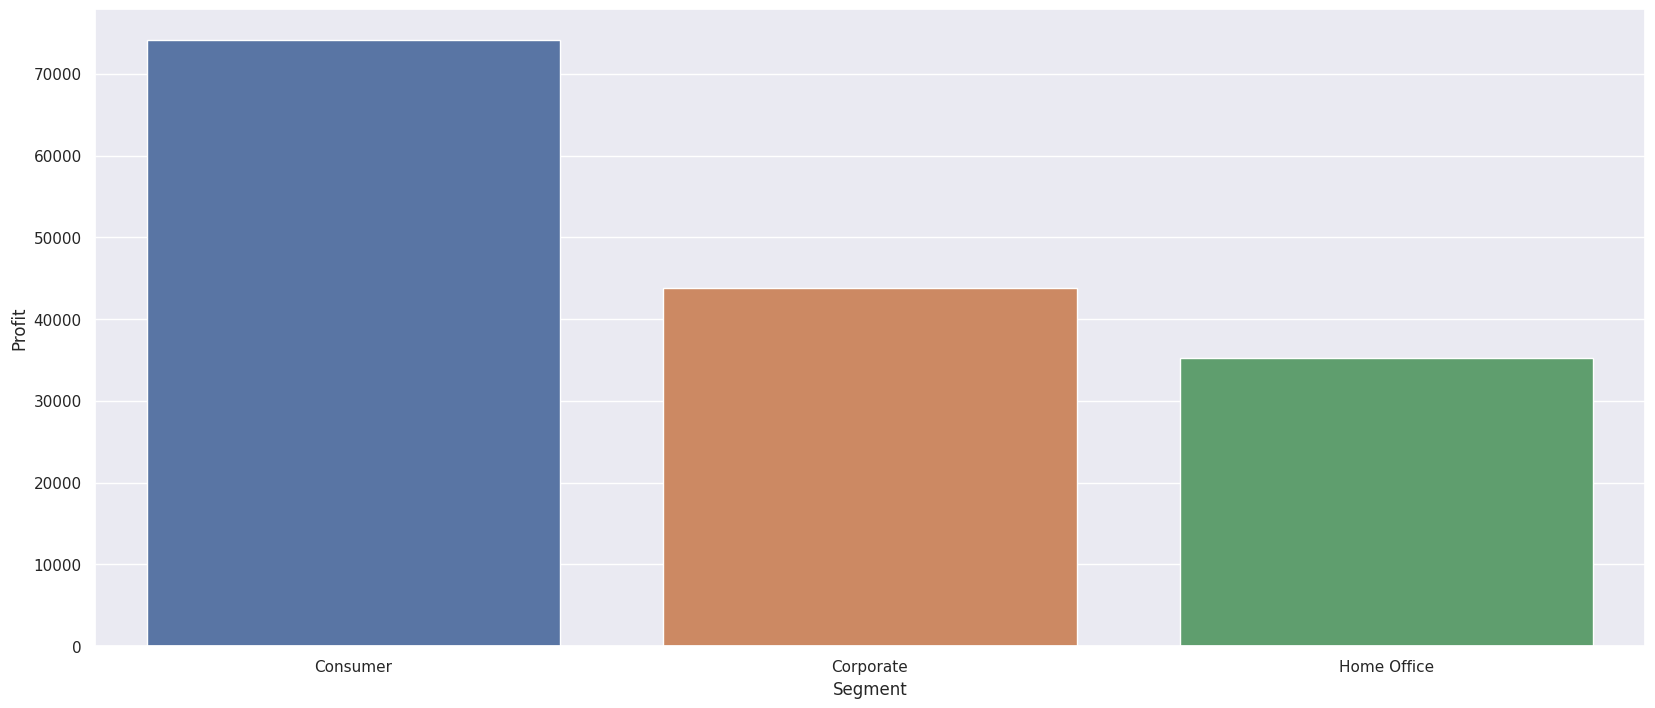

In [ ]:
#Gráfico comparando la variable con "Profit"
sns.set(rc={'figure.figsize':(20,8.27)})
sns.barplot(data=muestra_segmento, x="Segment", y= "Profit")

<Axes: xlabel='Segment', ylabel='count'>

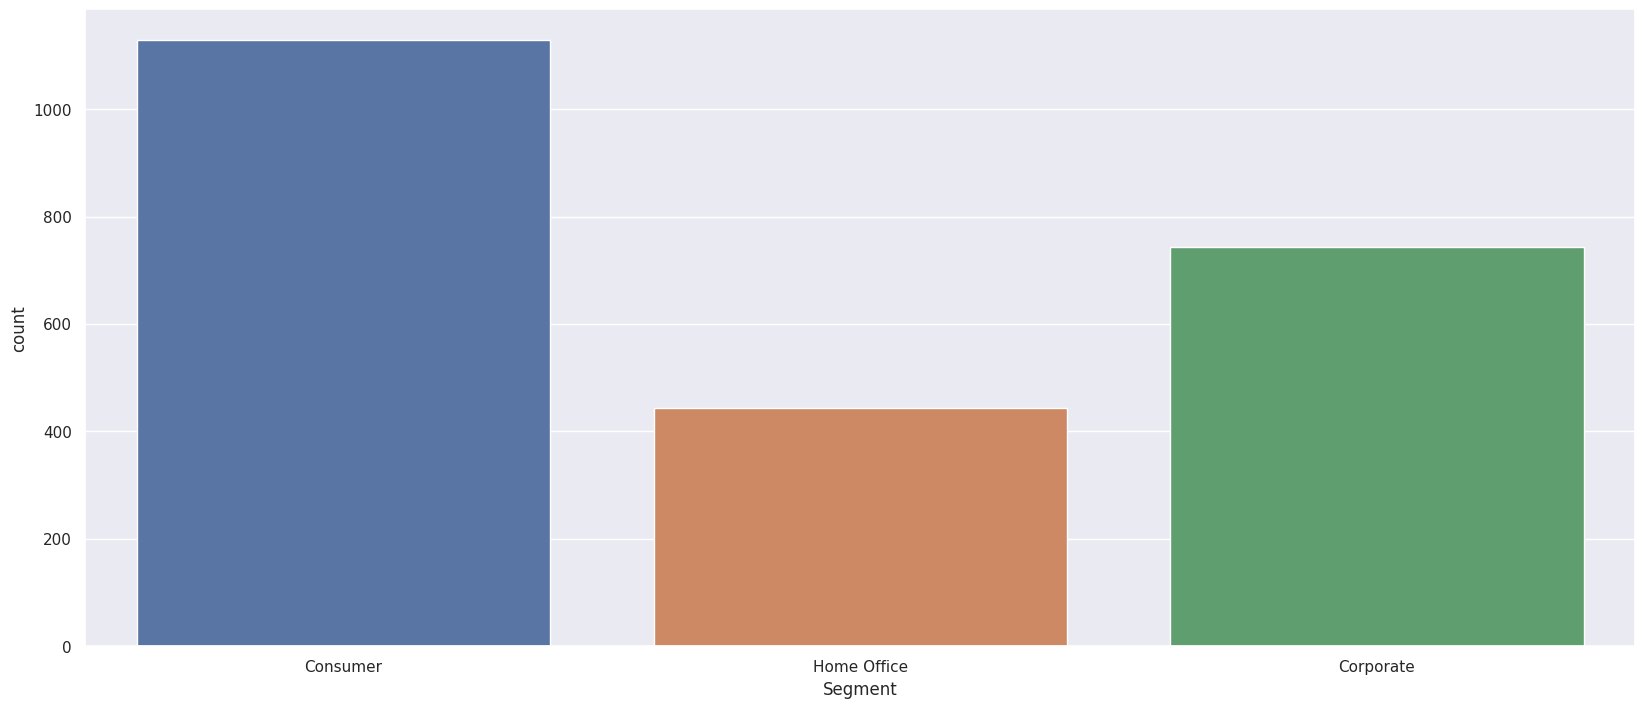

In [ ]:
#Gráfico de conteo de la variable
sns.countplot(data=df_graf_outliers, x="Segment")

##### Análisis Numérico

In [ ]:
#Resumen Numérico
muestra_segmento.describe()

Profit
count      3.000000
mean   51093.721200
std    20443.002908
min    35261.040000
25%    39554.142350
50%    43847.244700
75%    59010.061800
max    74172.878900

##### Insights

* El Segmento de Clientes que más ventas y ganancias genera es el de "Consumer".
* El Segmento de Clientes que menos ventas y ganancias genera es el de "Home Office".

#### Region

##### Gráfico

In [ ]:
#Creación Dataframe con la información deseada
muestra_region = df_graf_outliers.groupby('Region')['Profit'].sum().reset_index()
muestra_region

Region      Profit
0  Central  32944.8583
1     East  54519.8396
2    South  22198.6142
3     West  43617.8515

<Axes: xlabel='Region', ylabel='Profit'>

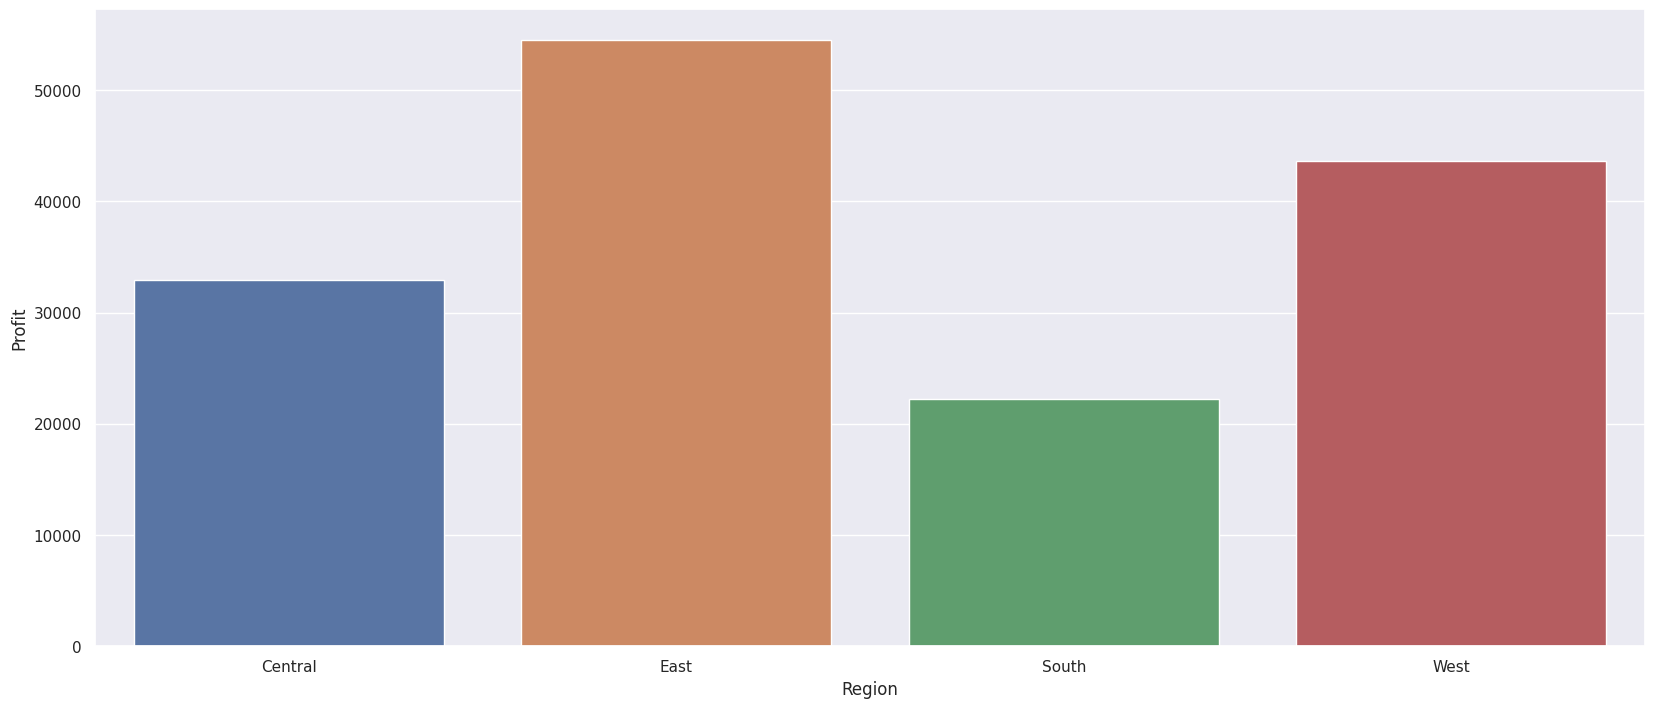

In [ ]:
#Gráfico comparando la variable con "Profit"
sns.set(rc={'figure.figsize':(20,8.27)})
sns.barplot(data=muestra_region, x="Region", y= "Profit")

<Axes: xlabel='Region', ylabel='count'>

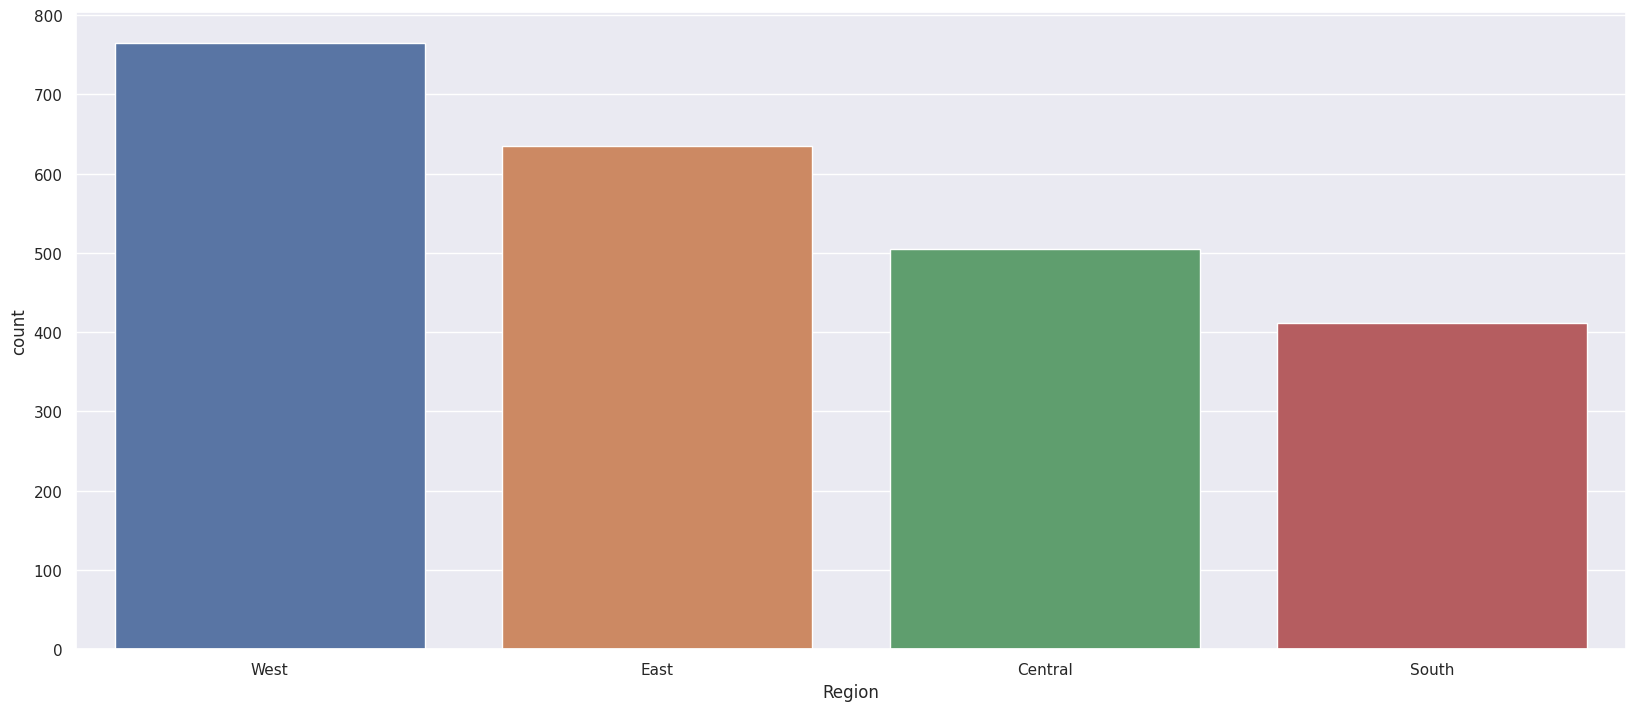

In [ ]:
#Gráfico de conteo de la variable
sns.countplot(data=df_graf_outliers, x="Region")

##### Análisis Numérico

In [ ]:
#Resumen Numérico
muestra_region.describe()

Profit
count      4.000000
mean   38320.290900
std    13895.961783
min    22198.614200
25%    30258.297275
50%    38281.354900
75%    46343.348525
max    54519.839600

##### Insights

* La región que más ganancias genera es la "East" a pesar de no ser la que más ventas genera.
* La región "South" es la que menos ganancias y cantidad de ventas genera.


### Modelo de Regresión

#### Preparación

In [ ]:
#Copia del dataframe de la sección de "Agrupamiento de Datos"
agrup_outliers_fs = df_agrup_outliers

Una vez realizado un análisis visual de los datos agrupados previamente, se procede a crear modelos con este conjunto de datos y comparar los rendimientos de los mismos. Cabe recordar que todos son modelos de regresión para predecir el valor de la variable "Profit".

Se debe aclarar también, que la métrica que se utilizará para comprar el rendimiento de los modelos es la de R-Cuadrado o R2.  

R2 indica la bondad o la aptitud del modelo, a menudo se utiliza con fines descriptivos y muestra que tan bién las variables independientes seleccionadas explican la variabilidad en sus variables dependientes. 
R-cuadrado tiene la propiedad útil de que su escala es intuitiva, va de 0 a 1, con 0 indicando que el modelo propuesto no mejora la predicción sobre el modelo medido y 1 indica una predicción perfecta. 

Para poder utlizar los datos en los modelos, el conjunto de datos solo debe contener valores numéricos, es decir, que las variables categóricas deben llevarse a valores numéricos.  
Para llevar a cabo ese proceso se utilizará el método de Pandas llamado "get_dummies", que se encarga de tomar cada posible valor de cada variable categórica y convertirlo en una propia variable booleana que toma valor de 1 si el registro contiene ese valor o 0 si no lo contiene.

In [ ]:
#Conversión de variables categóricas a numéricas con "get_dummies"
agrup_outliers_fs = pd.get_dummies(data=agrup_outliers_fs)
agrup_outliers_fs

Anio  Mes    Sales  Product Quantity  Sales Quantity  Discount   Profit  \
0     2014    1  333.999                 3               1      0.15   3.9294   
1     2014    1  127.104                 6               1      0.20  28.5984   
2     2014    1  272.940                 3               1      0.00  30.0234   
3     2014    1   19.536                 3               1      0.20   4.8840   
4     2014    1   56.340                 9               2      0.00  18.5922   
...    ...  ...      ...               ...             ...       ...      ...   
2311  2017   12  129.450                 5               2      0.00  24.3042   
2312  2017   12  219.800                 5               1      0.20  24.7275   
2313  2017   12  302.376                 3               1      0.20  22.6782   
2314  2017   12   49.616                 2               1      0.20   4.9616   
2315  2017   12   52.680                 3               1      0.20  19.7550   

      Category_Furniture  Category_Office Supplies  Category_Technology  ...  \
0                      1                         0                    0  ...   
1                      1                         0                    0  ...   
2                      1                         0                    0  ...   
3                      0                         1                    0  ...   
4                      0                         1                    0  ...   
...                  ...                       ...                  ...  ...   
2311                   0                         0                    1  ...   
2312                   0                         0                    1  ...   
2313                   0                         0                    1  ...   
2314                   0                         0                    1  ...   
2315                   0                         0                    1  ...   

      Ship Mode_Same Day  Ship Mode_Second Class  Ship Mode_Standard Class  \
0                      0                       0                         1   
1                      0                       1                         0   
2                      0                       0                         1   
3                      0                       0                         1   
4                      0                       0                         1   
...                  ...                     ...                       ...   
2311                   0                       1                         0   
2312                   0                       0                         1   
2313                   0                       0                         1   
2314                   0                       0                         1   
2315                   0                       0                         1   

      Segment_Consumer  Segment_Corporate  Segment_Home Office  \
0                    1                  0                    0   
1                    1                  0                    0   
2                    1                  0                    0   
3                    1                  0                    0   
4                    1                  0                    0   
...                ...                ...                  ...   
2311                 0                  0                    1   
2312                 1                  0                    0   
2313                 1                  0                    0   
2314                 0                  1                    0   
2315                 0                  0                    1   

      Region_Central  Region_East  Region_South  Region_West  
0                  0            0             0            1  
1                  0            1             0            0  
2                  1            0             0            0  
3                  0            1             0            0  
4                  0       

Antes que nada, se debe convertir el tipo de dato de la variable de años para poder ser tratados por los algoritmos siguientes.

In [ ]:
# Conversión de la variable "Anio" a integer
agrup_outliers_fs["Anio"] = agrup_outliers_fs["Anio"].astype(int)

A continuación, se procede a Normalizar los valores a utilizar en el modelo para que se encuentren en la misma escala (entre 0 y 1).

In [ ]:
#Función para normalizar valores
def min_max_scaling(series):
    return (series - series.min()) / (series.max() - series.min())

In [ ]:
#Ejecución de la función de Normalización en las variables no objetivo
for col in agrup_outliers_fs.columns:
 agrup_outliers_fs[col] = min_max_scaling(agrup_outliers_fs[col])

Una vez preparados los datos, se procederá a crear los modelos con los siguientes algoritmos:

#### Regresión Linear

A continuación se llevará a cabo una "Feature Selection", que consiste en obtener las variables de los datos que maximicen el valor de "r2" a la hora de predecir el valor de "Profit", es decir utilizar las columnas que permiten tener un mejor rendimiento con el algoritmo elegido.

In [ ]:
#Ejecución de la "Feature Selection"
lr = LinearRegression()
sfs_outliers_lr = SFS(lr, scoring= 'r2')
sfs_outliers_lr = sfs_outliers_lr.fit(agrup_outliers_fs.drop(["Profit"], axis=1), agrup_outliers_fs["Profit"])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_sequential.py:211: FutureWarning: Leaving `n_features_to_select` to None is deprecated in 1.0 and will become 'auto' in 1.3. To keep the same behaviour as with None (i.e. select half of the features) and avoid this warning, you should manually set `n_features_to_select='auto'` and set tol=None when creating an instance.
  warnings.warn(


Una vez ejecutada la "Feature Selection", se procede a obtener los nombres de las features que maximizan el rendimiento del modelo.

In [ ]:
#Obtención de los features seleccionados por el algoritmo
lr_outliers_features = sfs_outliers_lr.get_feature_names_out()
lr_outliers_features

array(['Mes', 'Sales', 'Sales Quantity', 'Discount',
       'Category_Office Supplies', 'Sub-Category_Appliances',
       'Sub-Category_Binders', 'Sub-Category_Bookcases',
       'Sub-Category_Chairs', 'Sub-Category_Copiers',
       'Sub-Category_Paper', 'Sub-Category_Phones',
       'Sub-Category_Storage', 'Sub-Category_Supplies',
       'Sub-Category_Tables', 'Ship Mode_Second Class', 'Region_Central',
       'Region_West'], dtype=object)

Una vez determinadas las variables a utilizar en el modelo, se separa por un lado la variable objetivo u target que se busca predecir, en este caso "Profit" que representa el beneficio o ganacia en cada pedido. Y, por otro lado todas las variables/columnas seleccionadas por el algoritmo de "Feature Selection".

In [ ]:
#Variables No Objetivo 
x_outliers_lr = agrup_outliers_fs.filter(lr_outliers_features, axis=1)
#Varible objetivo/target
y_outliers_lr = agrup_outliers_fs["Profit"]

Los valores se deben dividir por un lado en datos de entrenamiento y por otro lado en datos de prueba.

In [ ]:
#División de los datos entre prueba (30%) y entrenamiento (70%)
x_outliers_train, x_outliers_test, y_outliers_train, y_outliers_test = train_test_split(x_outliers_lr, y_outliers_lr, test_size=0.30, random_state=101)

Una vez divididos los datos, se procede a crear el modelo propiamente dicho.

In [ ]:
#Creación de Modelo
model_outliers_rl = LinearRegression()
model_outliers_rl.fit(x_outliers_train,y_outliers_train)

LinearRegression()

In [ ]:
#Obtención de Predicciones del modelo
predictions_outliers_rl = model_outliers_rl.predict(x_outliers_test)
predictions_outliers_rl

array([ 3.69308429e-02,  2.26587366e-03,  1.99339301e-02,  1.87610800e-02,
        4.88592430e-03, -8.20829330e-04,  1.24538269e-02,  2.01247552e-03,
        1.11740070e-02, -3.05334944e-04,  5.54432680e-03,  1.39285578e-02,
       -9.35824845e-03,  2.41489721e-03, -1.74218305e-03, -4.67518077e-03,
        1.14618542e-02,  1.17414048e-03,  3.68640033e-03, -4.03898712e-03,
        9.59256911e-02,  9.14173875e-03, -5.80368461e-03, -3.19152843e-04,
        5.66768946e-04, -7.17922077e-03, -4.79221723e-03,  1.04645342e-02,
        2.39152384e-03,  1.49741655e-02,  6.45949074e-04, -8.62786210e-03,
        1.72361747e-02,  5.27032844e-02,  7.61106109e-03, -2.52671796e-03,
        1.80854985e-03, -9.95357982e-04, -3.92671051e-04,  1.43546699e-02,
        1.77637006e-04, -8.35571854e-03, -1.57346447e-04,  1.40946363e-03,
        1.07278163e-03,  4.04270323e-03,  2.96527472e-01, -2.52661749e-03,
        2.62753668e-03,  1.00269081e-02,  2.15023513e-01,  2.59646705e-02,
        6.32762394e-03,  

Una vez entrenado el modelo, se procede a evaluar el mismo. En este caso se utilizó como métrica de evaluación a "R Cuadrado (R2)".

In [ ]:
#Obtención de Métricas de Evaluación
x_outliers_train2 = sm.add_constant(x_outliers_train)
model_outliers_rl = sm.OLS(y_outliers_train, x_outliers_train2).fit()


print_model_outliers_rl = model_outliers_rl.summary()
print(print_model_outliers_rl)

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     516.8
Date:                Tue, 06 Jun 2023   Prob (F-statistic):               0.00
Time:                        03:16:45   Log-Likelihood:                 4206.5
No. Observations:                1621   AIC:                            -8375.
Df Residuals:                    1602   BIC:                            -8273.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

<Axes: xlabel='Profit'>

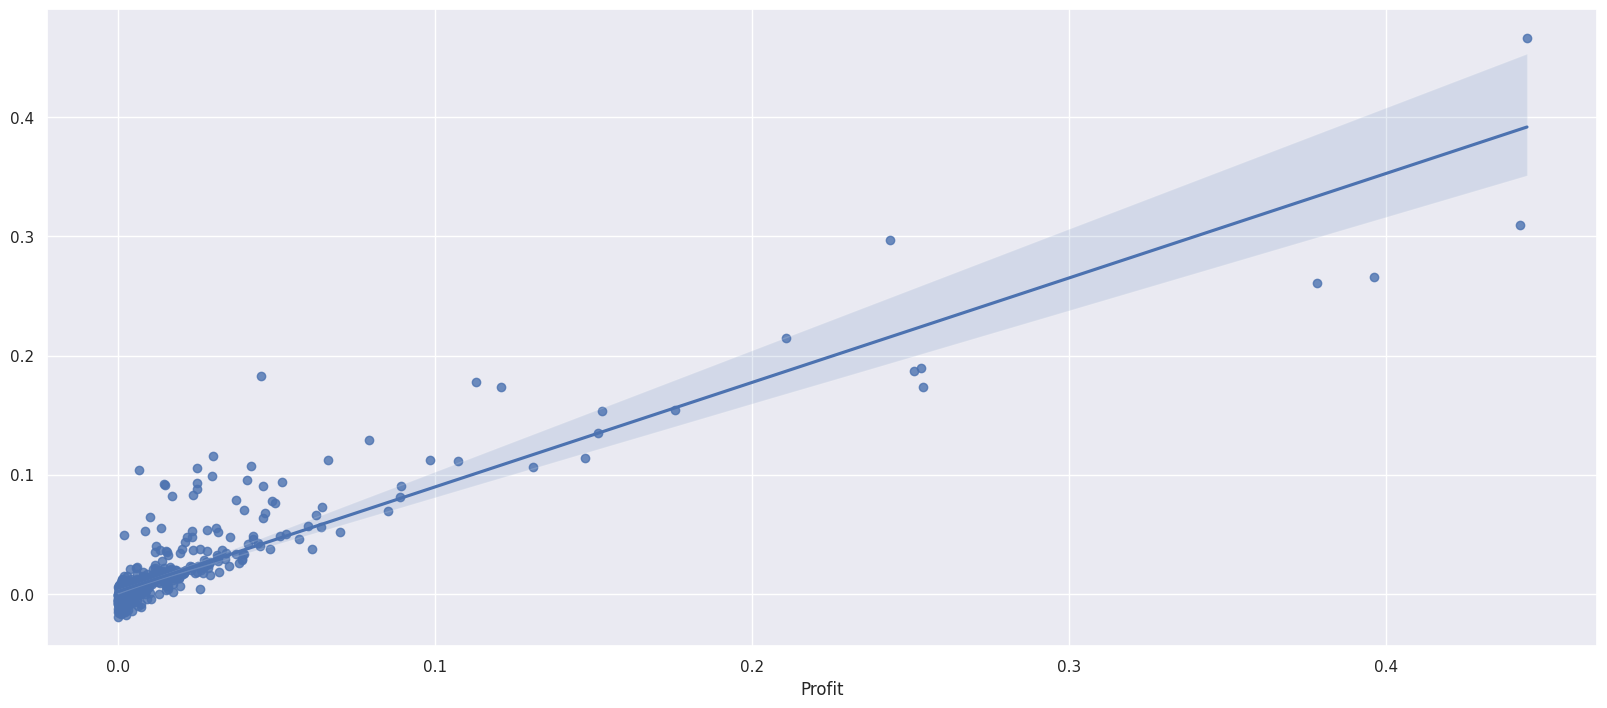

In [ ]:
#Gráfico de las predicciones realizadas
sns.regplot(x = y_outliers_test, y = predictions_outliers_rl)

#### Decision Trees

A continuación se llevará a cabo una "Feature Selection", que consiste en obtener las variables de los datos que maximicen el valor de "r2" a la hora de predecir el valor de "Profit", es decir utilizar las columnas que permiten tener un mejor rendimiento con el algoritmo elegido.

In [ ]:
#Ejecución de la "Feature Selection"
dt = DecisionTreeRegressor()
sfs_outliers_dt = SFS(dt, scoring= 'r2')
sfs_outliers_dt = sfs_outliers_dt.fit(agrup_outliers_fs.drop(["Profit"], axis=1), agrup_outliers_fs["Profit"])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_sequential.py:211: FutureWarning: Leaving `n_features_to_select` to None is deprecated in 1.0 and will become 'auto' in 1.3. To keep the same behaviour as with None (i.e. select half of the features) and avoid this warning, you should manually set `n_features_to_select='auto'` and set tol=None when creating an instance.
  warnings.warn(


Una vez ejecutada la "Feature Selection", se procede a obtener los nombres de las features que maximizan el rendimiento del modelo.

In [ ]:
#Obtención de los features seleccionados por el algoritmo
dt_outliers_features = sfs_outliers_dt.get_feature_names_out()
dt_outliers_features

array(['Sales', 'Discount', 'Category_Furniture',
       'Category_Office Supplies', 'Sub-Category_Accessories',
       'Sub-Category_Appliances', 'Sub-Category_Art',
       'Sub-Category_Binders', 'Sub-Category_Bookcases',
       'Sub-Category_Copiers', 'Sub-Category_Envelopes',
       'Sub-Category_Furnishings', 'Sub-Category_Machines',
       'Sub-Category_Paper', 'Sub-Category_Storage', 'Ship Mode_Same Day',
       'Ship Mode_Second Class', 'Ship Mode_Standard Class'], dtype=object)

Una vez determinadas las variables a utilizar en el modelo, se separa por un lado la variable objetivo u target que se busca predecir, en este caso "Profit" que representa el beneficio o ganacia en cada pedido. Y, por otro lado todas las variables/columnas seleccionadas por el algoritmo de "Feature Selection".

In [ ]:
#Variables No Objetivo 
x_outliers_dt = agrup_outliers_fs.filter(dt_outliers_features, axis=1)
#Varible objetivo/target
y_outliers_dt = agrup_outliers_fs["Profit"]

Los valores se deben dividir por un lado en datos de entrenamiento y por otro lado en datos de prueba.

In [ ]:
#División de los datos entre prueba (30%) y entrenamiento (70%)
x_outliers_train, x_outliers_test, y_outliers_train, y_outliers_test = train_test_split(x_outliers_dt, y_outliers_dt, test_size=0.30, random_state=101)

Una vez divididos los datos, se procede a crear el modelo propiamente dicho.

In [ ]:
#Entrenamiento del Modelo
model_outliers_dt =  DecisionTreeRegressor(max_depth=9, random_state=20)
model_outliers_dt.fit(x_outliers_train, y_outliers_train)

DecisionTreeRegressor(max_depth=9, random_state=20)

In [ ]:
#Obtención de Predicciones del modelo
predictions_outliers_dt = model_outliers_dt.predict(x_outliers_test)
predictions_outliers_dt

array([5.33266783e-02, 2.32176606e-03, 2.74448258e-02, 1.18295564e-02,
       7.00415692e-03, 5.15046793e-03, 2.00288350e-02, 3.60725898e-04,
       1.08645621e-02, 7.90009065e-04, 3.60725898e-04, 1.18295564e-02,
       5.25372533e-04, 3.22277085e-03, 3.60725898e-04, 1.18295564e-02,
       1.01886912e-02, 7.90009065e-04, 5.94155137e-03, 7.90009065e-04,
       5.68223052e-02, 3.24259407e-03, 4.50819363e-03, 5.02670407e-04,
       1.76272329e-03, 4.50819363e-03, 7.25220326e-04, 1.36353548e-02,
       1.53195184e-03, 7.00415692e-03, 3.60725898e-04, 8.63008672e-04,
       1.18295564e-02, 3.95361546e-02, 1.53195184e-03, 3.24259407e-03,
       2.32176606e-03, 8.63008672e-04, 3.60725898e-04, 7.00415692e-03,
       2.64779857e-03, 2.32176606e-03, 3.60725898e-04, 8.63008672e-04,
       1.24082861e-03, 1.76272329e-03, 2.88319038e-01, 2.06993930e-04,
       4.50819363e-03, 1.18295564e-02, 2.88319038e-01, 2.74448258e-02,
       1.24082861e-03, 1.18295564e-02, 1.53195184e-03, 1.89128346e-02,
      

Una vez entrenado el modelo, se procede a evaluar el mismo. En este caso se utilizó como métrica de evaluación a "R Cuadrado (R2)".

In [ ]:
# Métrica R2
r2 = r2_score(y_outliers_test, predictions_outliers_dt)
print('R-squared scores:', round(r2, 2))

R-squared scores: 0.61


<Axes: xlabel='Profit'>

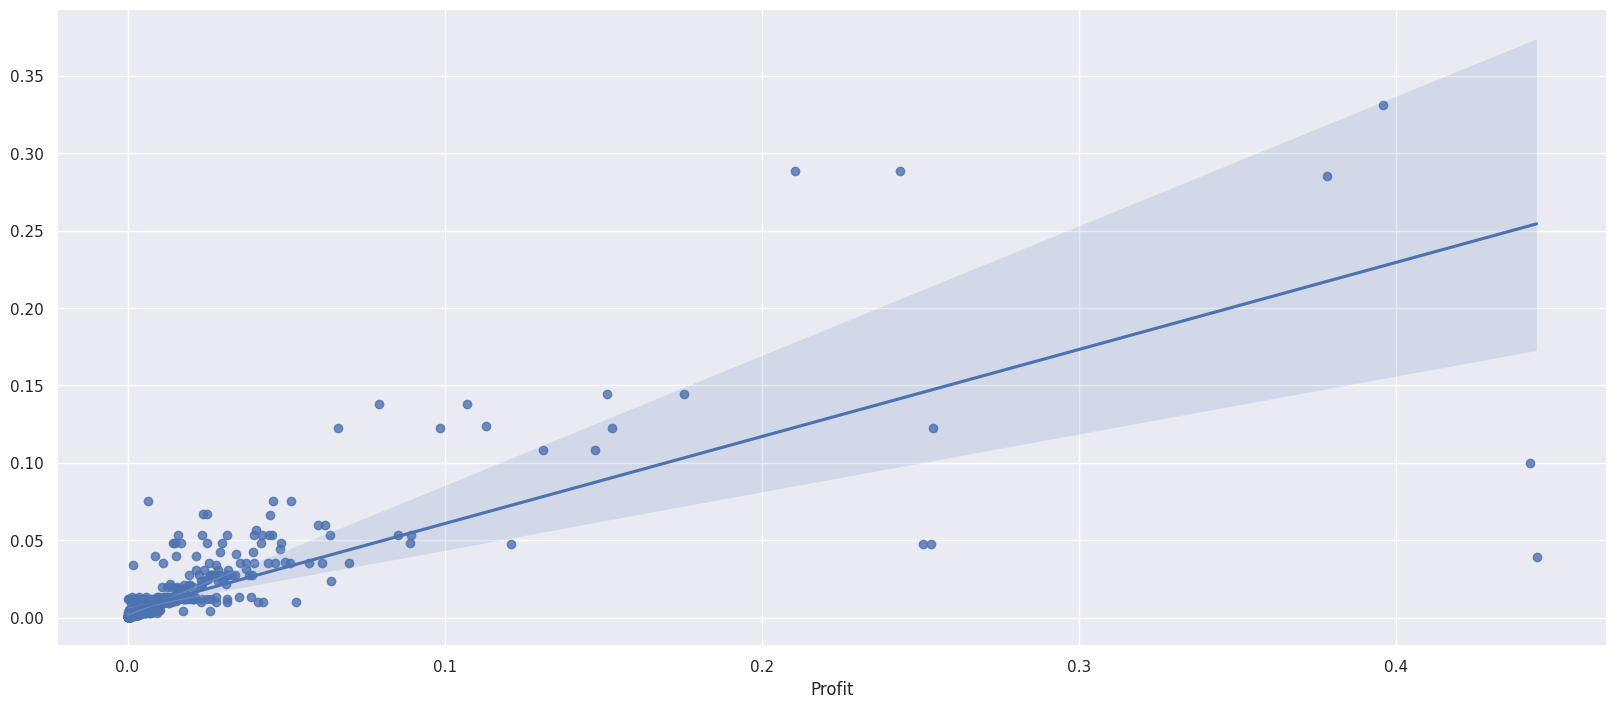

In [ ]:
#Gráfico de las predicciones realizadas
sns.regplot(x = y_outliers_test, y = predictions_outliers_dt)

In [ ]:
# Obtener los nombres de las características
features_outliers_dt = list(x_outliers_test.columns)

# Obtener la importancia de las características
importance_outliers_dt = model_outliers_dt.feature_importances_

# Crear un DataFrame con los nombres de las características y su importancia
df_importance_outliers_dt = pd.DataFrame({'Feature': features_outliers_dt, 'Importance': importance_outliers_dt})

# Ordenar el DataFrame por importancia en orden descendente
df_importance_outliers_dt = df_importance_outliers_dt.sort_values('Importance', ascending=False)

# Imprimir los resultados
print(round(df_importance_outliers_dt,2))

                     Feature  Importance
0                      Sales        0.94
1                   Discount        0.01
12     Sub-Category_Machines        0.01
9       Sub-Category_Copiers        0.01
17  Ship Mode_Standard Class        0.01
2         Category_Furniture        0.01
7       Sub-Category_Binders        0.00
4   Sub-Category_Accessories        0.00
14      Sub-Category_Storage        0.00
13        Sub-Category_Paper        0.00
16    Ship Mode_Second Class        0.00
3   Category_Office Supplies        0.00
10    Sub-Category_Envelopes        0.00
5    Sub-Category_Appliances        0.00
8     Sub-Category_Bookcases        0.00
6           Sub-Category_Art        0.00
11  Sub-Category_Furnishings        0.00
15        Ship Mode_Same Day        0.00


#### Random Forest

En el caso de "Random Forest" no es necesario llevar a cabo un proceso de "Feature Selction" propio por dos razones:  
* La primera es porque al tratarse de un algoritmo que trabaja con varios "Decision Trees" simplemente se pueden reutilizar los valores obtenidos del "Feature Selection" realizado en el algoritmo "Decision Trees". 
* La segunda razón es porque el tiempo de procesamiento necesario para realizar este proceso es demasiado alto.

In [ ]:
#Ejecución de la "Feature Selection"
dt = DecisionTreeRegressor()
sfs_outliers_dt = SFS(dt, scoring= 'r2')
sfs_outliers_dt = sfs_outliers_dt.fit(agrup_outliers_fs.drop(["Profit"], axis=1), agrup_outliers_fs["Profit"])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_sequential.py:211: FutureWarning: Leaving `n_features_to_select` to None is deprecated in 1.0 and will become 'auto' in 1.3. To keep the same behaviour as with None (i.e. select half of the features) and avoid this warning, you should manually set `n_features_to_select='auto'` and set tol=None when creating an instance.
  warnings.warn(


Una vez ejecutada la "Feature Selection", se procede a obtener los nombres de las features que maximizan el rendimiento del modelo.

In [ ]:
#Obtención de los features seleccionados por el algoritmo
rf_outliers_features = sfs_outliers_dt.get_feature_names_out()
rf_outliers_features

array(['Sales', 'Discount', 'Category_Furniture',
       'Category_Office Supplies', 'Sub-Category_Accessories',
       'Sub-Category_Appliances', 'Sub-Category_Binders',
       'Sub-Category_Bookcases', 'Sub-Category_Chairs',
       'Sub-Category_Copiers', 'Sub-Category_Fasteners',
       'Sub-Category_Machines', 'Sub-Category_Paper',
       'Sub-Category_Phones', 'Sub-Category_Storage',
       'Ship Mode_Same Day', 'Ship Mode_Second Class', 'Region_South'],
      dtype=object)

Una vez determinadas las variables a utilizar en el modelo, se separa por un lado la variable objetivo u target que se busca predecir, en este caso "Profit" que representa el beneficio o ganacia en cada pedido. Y, por otro lado todas las variables/columnas seleccionadas por el algoritmo de "Feature Selection".

In [ ]:
#Variables No Objetivo 
x_outliers_rf = agrup_outliers_fs.filter(rf_outliers_features, axis=1)
#Varible objetivo/target
y_outliers_rf = agrup_outliers_fs["Profit"]

Los valores se deben dividir por un lado en datos de entrenamiento y por otro lado en datos de prueba.

In [ ]:
#División de los datos entre prueba (30%) y entrenamiento (70%)
x_outliers_train, x_outliers_test, y_outliers_train, y_outliers_test = train_test_split(x_outliers_rf, y_outliers_rf, test_size=0.30, random_state=101)

Una vez divididos los datos, se procede a crear el modelo propiamente dicho.

In [ ]:
#Entrenamiento del Modelo
model_outliers_rf = RandomForestRegressor(n_estimators = 50, random_state = 101)
model_outliers_rf.fit(x_outliers_train, y_outliers_train) 

RandomForestRegressor(n_estimators=50, random_state=101)

In [ ]:
#Obtención de Predicciones del modelo
predictions_outliers_rf = model_outliers_rf.predict(x_outliers_test)
predictions_outliers_rf

array([4.89423767e-02, 2.80618976e-03, 2.90404873e-02, 1.58648731e-02,
       5.79751180e-03, 6.16068070e-03, 1.34319574e-02, 3.32702538e-04,
       1.01493988e-02, 7.20345709e-04, 3.27461650e-04, 1.44715973e-02,
       5.16934413e-04, 5.20855814e-03, 3.43945824e-04, 1.27871318e-02,
       9.41602809e-03, 7.95587987e-04, 6.42745448e-03, 4.98791901e-04,
       7.08664247e-02, 3.38804063e-03, 1.11738716e-02, 1.04787109e-03,
       3.11335413e-03, 7.44522326e-03, 1.02657555e-03, 1.43296183e-02,
       5.44074967e-04, 7.73408956e-03, 2.81632551e-04, 5.84648099e-04,
       1.46375644e-02, 3.12580500e-02, 1.77306221e-03, 1.51879601e-03,
       2.29090178e-03, 1.21661141e-03, 3.26414425e-04, 8.02179157e-03,
       3.66927437e-03, 1.67025358e-03, 5.74520689e-04, 1.02875770e-03,
       1.30040848e-03, 3.16147967e-03, 2.10672758e-01, 2.84392876e-04,
       7.22067817e-03, 1.01653727e-02, 2.30649513e-01, 3.35680237e-02,
       1.65506941e-03, 1.26187440e-02, 1.84826719e-03, 1.83949184e-02,
      

Una vez entrenado el modelo, se procede a evaluar el mismo. En este caso se utilizó como métrica de evaluación a "R Cuadrado (R2)".

In [ ]:
# Métrica R2
r2 = r2_score(y_outliers_test, predictions_outliers_rf)
print('R-squared scores:', round(r2, 2))

R-squared scores: 0.87


<Axes: xlabel='Profit'>

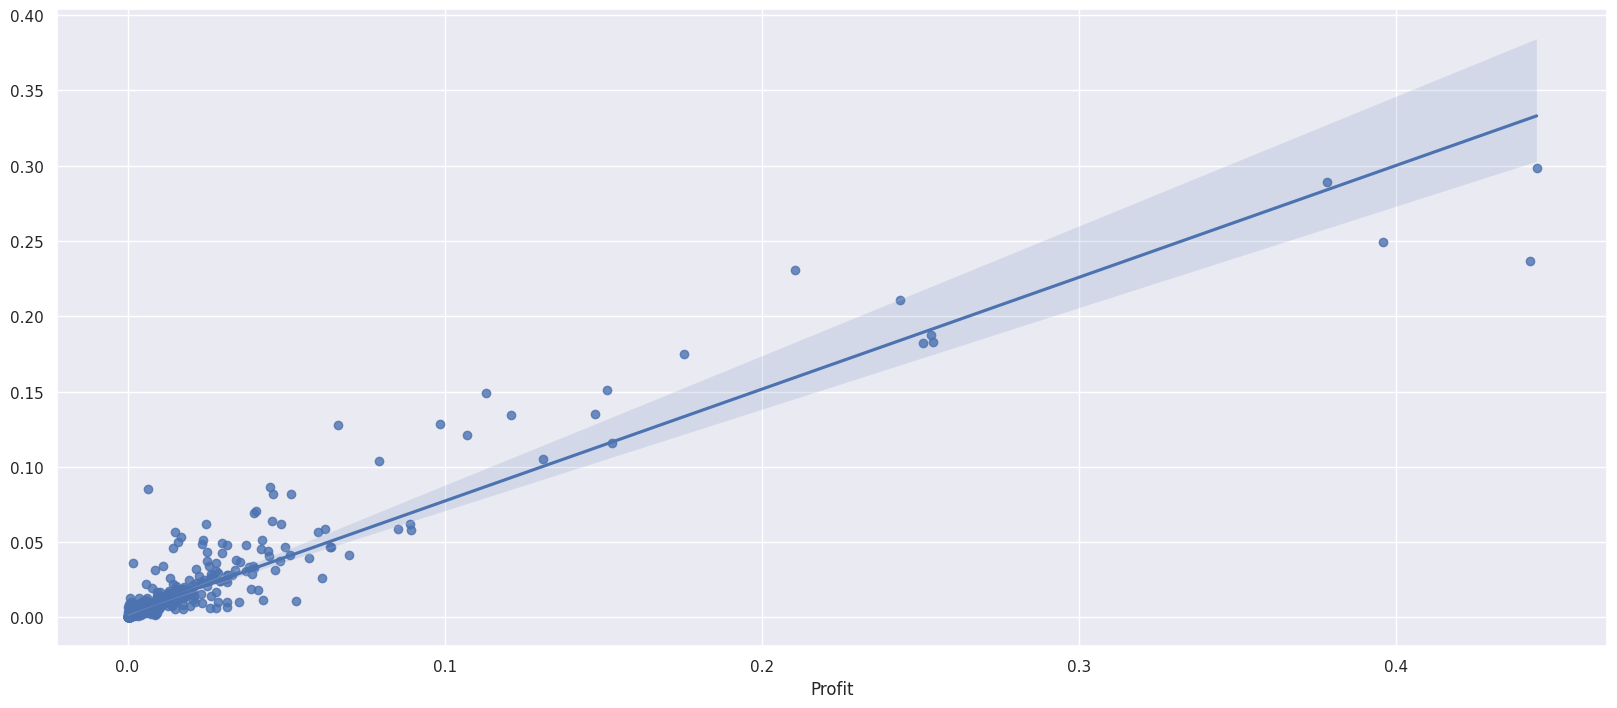

In [ ]:
#Gráfico de las predicciones realizadas
sns.regplot(x = y_outliers_test, y = predictions_outliers_rf)

In [ ]:
# Obtener los nombres de las características
features_outliers_rf = list(x_outliers_test.columns)

# Obtener la importancia de las características
importance_perdidas_rf = model_outliers_rf.feature_importances_

# Crear un DataFrame con los nombres de las características y su importancia
df_importance_perdidas_rf = pd.DataFrame({'Feature': features_outliers_rf, 'Importance': importance_perdidas_rf})

# Ordenar el DataFrame por importancia en orden descendente
df_importance_perdidas_rf = df_importance_perdidas_rf.sort_values('Importance', ascending=False)

# Imprimir los resultados
print(round(df_importance_perdidas_rf,2))

                     Feature  Importance
0                      Sales        0.93
1                   Discount        0.02
6       Sub-Category_Binders        0.02
9       Sub-Category_Copiers        0.01
16    Ship Mode_Second Class        0.01
11     Sub-Category_Machines        0.00
2         Category_Furniture        0.00
4   Sub-Category_Accessories        0.00
17              Region_South        0.00
8        Sub-Category_Chairs        0.00
3   Category_Office Supplies        0.00
14      Sub-Category_Storage        0.00
13       Sub-Category_Phones        0.00
12        Sub-Category_Paper        0.00
15        Ship Mode_Same Day        0.00
5    Sub-Category_Appliances        0.00
7     Sub-Category_Bookcases        0.00
10    Sub-Category_Fasteners        0.00


#### Conclusiones

De acuerdo a la métrica de evaluación utilizada en el proyecto (R Cuadrado), el mejor modelo fue el que se entrenó con el algoritmo Regesión Lineal, obteniendo un valor de 0,87.

Según el mejor modelo entrenado, las siguientes son las variables que más importancia tienen a la hora de predecir las ganancias de ventas mensuales:  


In [ ]:
print(round(df_importance_perdidas_rf,2))

                     Feature  Importance
0                      Sales        0.93
1                   Discount        0.02
6       Sub-Category_Binders        0.02
9       Sub-Category_Copiers        0.01
16    Ship Mode_Second Class        0.01
11     Sub-Category_Machines        0.00
2         Category_Furniture        0.00
4   Sub-Category_Accessories        0.00
17              Region_South        0.00
8        Sub-Category_Chairs        0.00
3   Category_Office Supplies        0.00
14      Sub-Category_Storage        0.00
13       Sub-Category_Phones        0.00
12        Sub-Category_Paper        0.00
15        Ship Mode_Same Day        0.00
5    Sub-Category_Appliances        0.00
7     Sub-Category_Bookcases        0.00
10    Sub-Category_Fasteners        0.00
